<a href="https://colab.research.google.com/github/Ayona123/Drug_repurposing/blob/main/8702_TEST_2401-2450.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3903]:
# Install RDKit.
%%capture
!pip install rdkit-pypi

In [3904]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs
import numpy as np

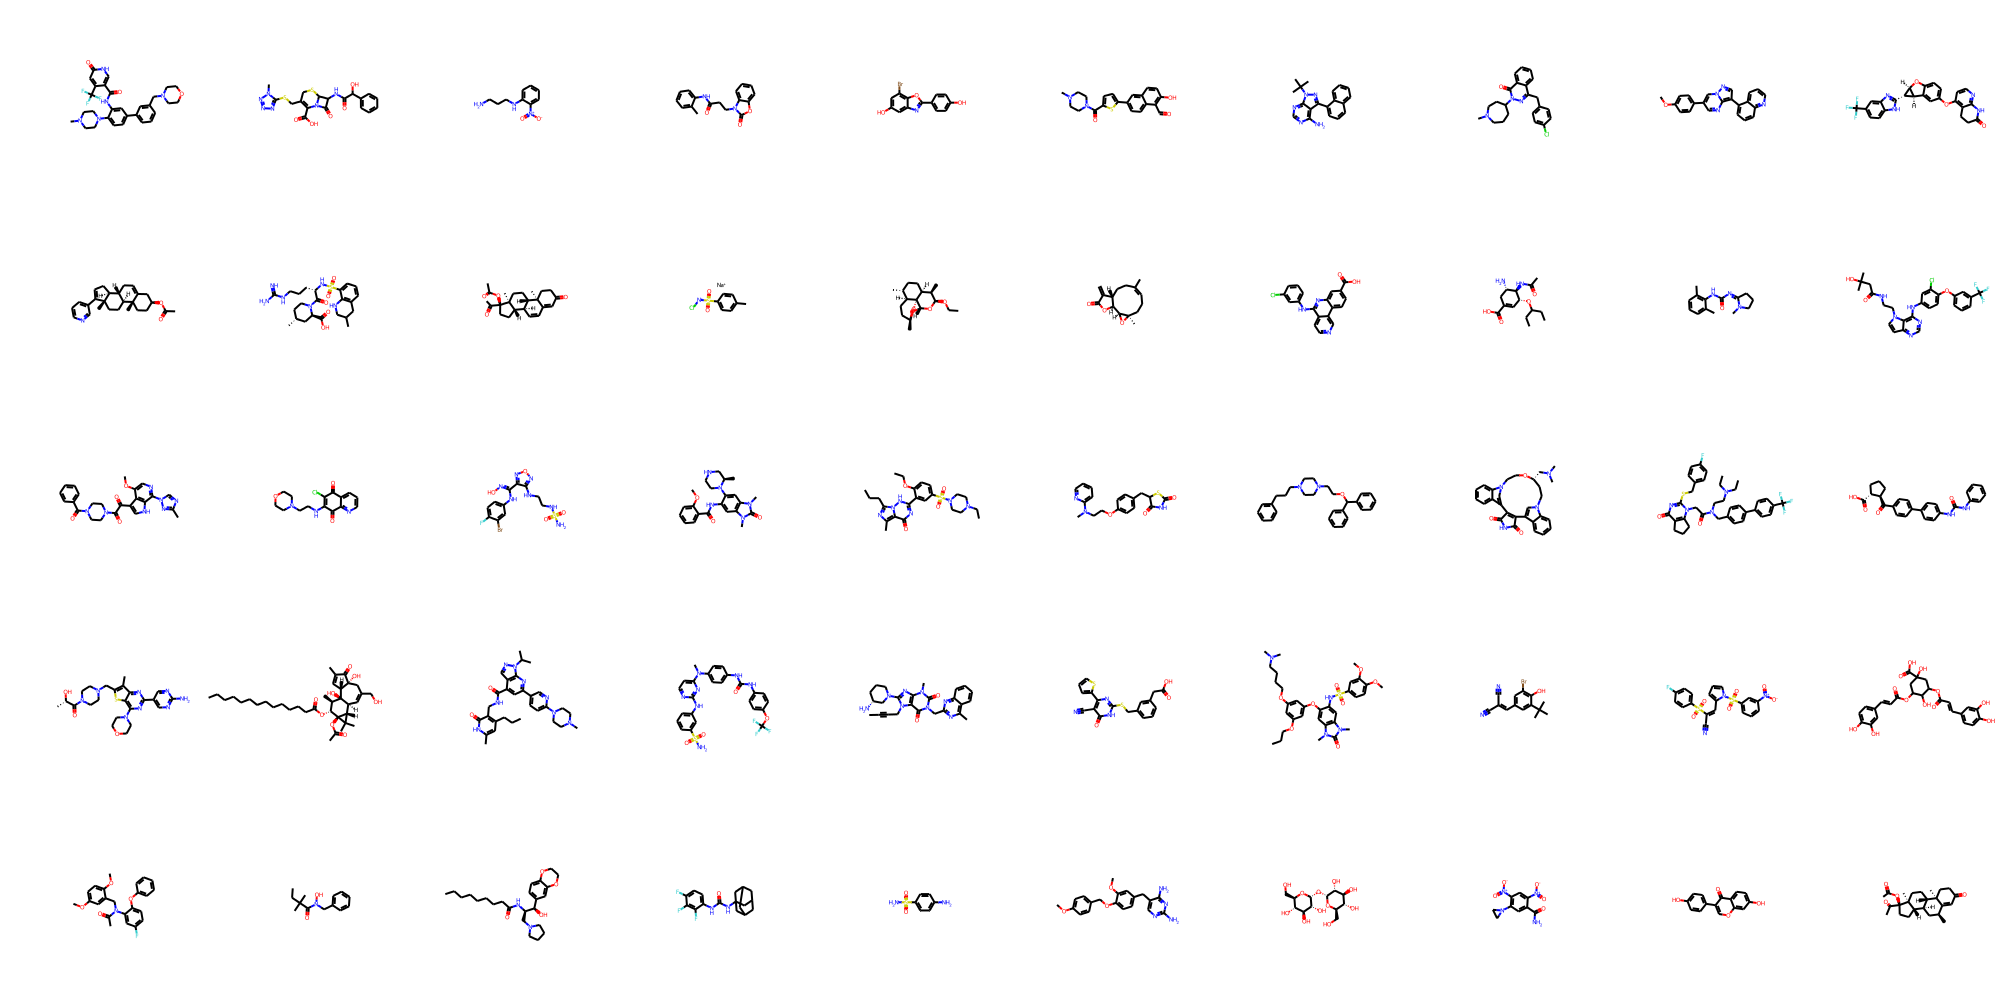

In [3905]:
smiles_list = [

'CN1CCN(c2ccc(-c3cccc(CN4CCOCC4)c3)cc2NC(=O)c2c[nH]c(=O)cc2C(F)(F)F)CC1',
'Cn1nnnc1SCC1=C(C(=O)O)N2C(=O)C(NC(=O)C(O)c3ccccc3)C2SC1',
'NCCCNc1ccccc1[N+](=O)[O-]',
'Cc1ccccc1NC(=O)CCn1c(=O)oc2ccccc21',
'Oc1ccc(-c2nc3cc(O)cc(Br)c3o2)cc1',
'CN1CCN(C(=O)c2ccc(-c3ccc4c(C=O)c(O)ccc4c3)s2)CC1',
'CC(C)(C)n1nc(-c2cccc3ccccc23)c2c(N)ncnc21',
'CN1CCCC(n2nc(Cc3ccc(Cl)cc3)c3ccccc3c2=O)CC1',
'COc1ccc(-c2cnc3c(-c4cccc5ncccc45)cnn3c2)cc1',
'O=C1CCc2c(Oc3ccc4c(c3)[C@@H]3[C@H](O4)[C@H]3c3nc4cc(C(F)(F)F)ccc4[nH]3)ccnc2N1',
'CC(=O)O[C@H]1CC[C@@]2(C)C(=CC[C@H]3[C@@H]4CC=C(c5cccnc5)[C@@]4(C)CC[C@@H]32)C1',
'CC1CNc2c(cccc2S(=O)(=O)N[C@@H](CCCNC(=N)N)C(=O)N2CC[C@@H](C)C[C@@H]2C(=O)O)C1',
'CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3C=CC4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C',
'Cc1ccc(S(=O)(=O)[N-]Cl)cc1.[Na+]',
'CCO[C@H]1O[C@@H]2O[C@@]3(C)CC[C@H]4[C@H](C)CC[C@@H]([C@H]1C)[C@]42OO3',
'C=C1C(=O)O[C@H]2[C@H]1CC/C(C)=C/CC[C@@]1(C)O[C@@H]21',
'O=C(O)c1ccc2c(c1)nc(Nc1cccc(Cl)c1)c1ccncc12',
'CCC(CC)O[C@@H]1C=C(C(=O)O)C[C@H](N)[C@H]1NC(C)=O',
'Cc1cccc(C)c1NC(=O)N=C1CCCN1C',
'CC(C)(O)CC(=O)NCCn1ccc2ncnc(Nc3ccc(Oc4cccc(C(F)(F)F)c4)c(Cl)c3)c21',
'COc1cnc(-n2cnc(C)n2)c2[nH]cc(C(=O)C(=O)N3CCN(C(=O)c4ccccc4)CC3)c12',
'O=C1C(Cl)=C(NCCN2CCOCC2)C(=O)c2ncccc21',
'NS(=O)(=O)NCCNc1nonc1/C(=N/O)Nc1ccc(F)c(Br)c1',
'COc1ccccc1C(=O)Nc1cc2c(cc1N1CCNC[C@H]1C)n(C)c(=O)n2C',
'CCCc1nc(C)c2c(=O)nc(-c3cc(S(=O)(=O)N4CCN(CC)CC4)ccc3OCC)[nH]n12',
'CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1',
'c1ccc(CCCN2CCN(CCOC(c3ccccc3)c3ccccc3)CC2)cc1',
'CN(C)C[C@@H]1CCn2cc(c3ccccc32)C2=C(C(=O)NC2=O)c2cn(c3ccccc23)CCO1',
'CCN(CC)CCN(Cc1ccc(-c2ccc(C(F)(F)F)cc2)cc1)C(=O)Cn1c(SCc2ccc(F)cc2)nc(=O)c2c1CCC2',
'O=C(Nc1ccccc1)Nc1ccc(-c2ccc(C(=O)[C@@H]3CCC[C@H]3C(=O)O)cc2)cc1',
'Cc1c(CN2CCN(C(=O)[C@H](C)O)CC2)sc2c(N3CCOCC3)nc(-c3cnc(N)nc3)nc12',
'CCCCCCCCCCCCCC(=O)O[C@@H]1[C@@H](C)[C@@]2(O)[C@@H](C=C(CO)C[C@]3(O)C(=O)C(C)=C[C@@H]23)[C@@H]2C(C)(C)[C@]12OC(C)=O',
'CCCc1cc(C)[nH]c(=O)c1CNC(=O)c1cc(-c2ccc(N3CCN(C)CC3)nc2)nc2c1cnn2C(C)C',
'CN(c1ccc(NC(=O)Nc2ccc(OC(F)(F)F)cc2)cc1)c1ccnc(Nc2cccc(S(N)(=O)=O)c2)n1',
'CC#CCn1c(N2CCC[C@@H](N)C2)nc2c1c(=O)n(Cc1nc(C)c3ccccc3n1)c(=O)n2C',
'N#Cc1c(-c2cccs2)nc(SCc2cccc(CC(=O)O)c2)[nH]c1=O',
'CCCOc1cc(OCCCCN(C)C)cc(Oc2cc3c(cc2NS(=O)(=O)c2ccc(OC)c(OC)c2)n(C)c(=O)n3C)c1',
'CC(C)(C)c1cc(C=C(C#N)C#N)cc(Br)c1O',
'N#CC(=Cc1cccn1S(=O)(=O)c1cccc([N+](=O)[O-])c1)S(=O)(=O)c1ccc(F)cc1',
'O=C(/C=C/c1ccc(O)c(O)c1)OC1CC(O)(C(=O)O)CC(OC(=O)/C=C/c2ccc(O)c(O)c2)C1O',
'COc1ccc(OC)c(CN(C(C)=O)c2cc(F)ccc2Oc2ccccc2)c1',
'CCC(C)(C)C(=O)N(O)Cc1ccccc1',
'CCCCCCCCC(=O)N[C@H](CN1CCCC1)[C@H](O)c1ccc2c(c1)OCCO2',
'O=C(Nc1ccc(F)c(F)c1F)NC12CC3CC(CC(C3)C1)C2',
'Nc1ccc(S(N)(=O)=O)cc1',
'COc1ccc(COc2ccc(Cc3cnc(N)nc3N)cc2OC)cc1',
'OC[C@H]1O[C@H](O[C@H]2O[C@H](CO)[C@@H](O)[C@H](O)[C@H]2O)[C@H](O)[C@@H](O)[C@@H]1O',
'NC(=O)c1cc(N2CC2)c([N+](=O)[O-])cc1[N+](=O)[O-]',
'O=c1c(-c2ccc(O)cc2)coc2cc(O)ccc12',
'CC(=O)O[C@]1(C(C)=O)CC[C@H]2[C@@H]3C[C@H](C)C4=CC(=O)CC[C@]4(C)[C@H]3CC[C@@]21C',

               
]
mol_list = []
for smiles in smiles_list:
   mol= Chem.MolFromSmiles (smiles)
   mol_list.append (mol)

img = Draw.MolsToGridImage(mol_list, molsPerRow=10)
img



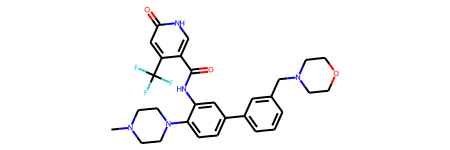

In [3906]:
M1 = mol_list [0]
M1

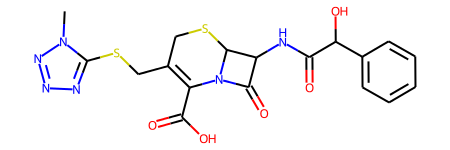

In [3907]:
M2 = mol_list [1]
M2

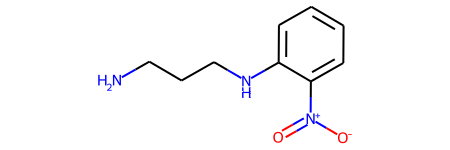

In [3908]:
M3 = mol_list [2]
M3

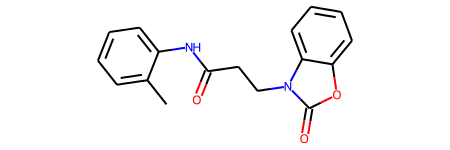

In [3909]:
M4 = mol_list [3]
M4

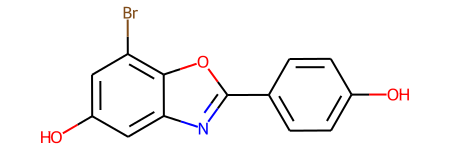

In [3910]:
M5 = mol_list [4]
M5

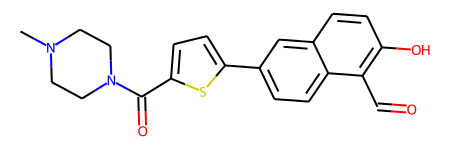

In [3911]:
M6 = mol_list [5]
M6

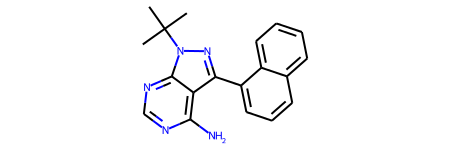

In [3912]:
M7 = mol_list [6]
M7

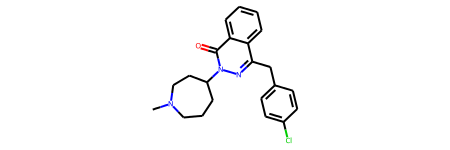

In [3913]:
M8 = mol_list [7]
M8

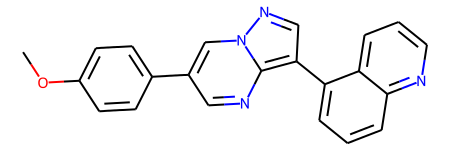

In [3914]:
M9 = mol_list [8]
M9

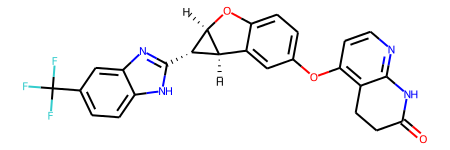

In [3915]:
M10 = mol_list [9]
M10

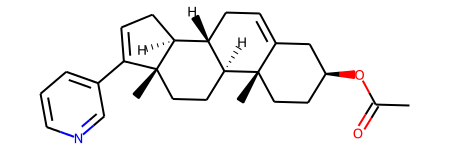

In [3916]:
M11 = mol_list [10]
M11

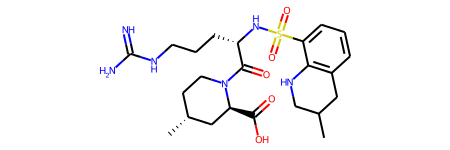

In [3917]:
M12 = mol_list [11]
M12

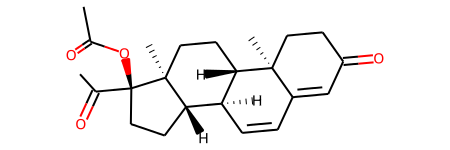

In [3918]:
M13 = mol_list [12]
M13

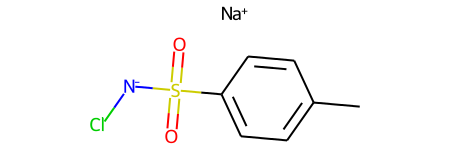

In [3919]:
M14 = mol_list [13]
M14

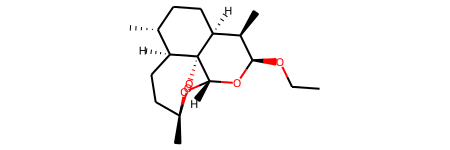

In [3920]:
M15 = mol_list [14]
M15

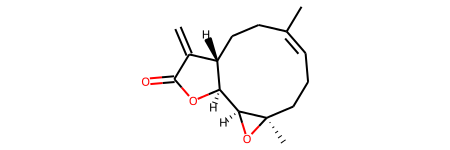

In [3921]:
M16 = mol_list [15]
M16

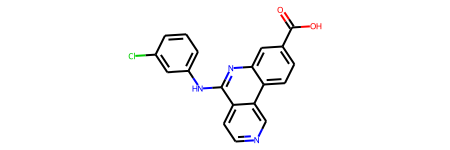

In [3922]:
M17 = mol_list [16]
M17

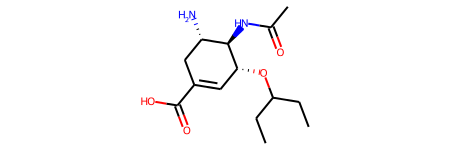

In [3923]:
M18 = mol_list [17]
M18

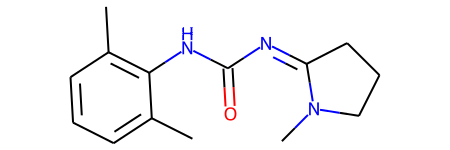

In [3924]:
M19 = mol_list [18]
M19

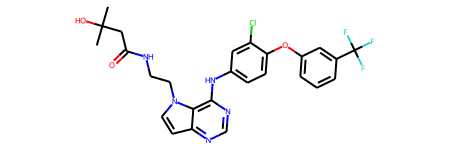

In [3925]:
M20 = mol_list [19]
M20

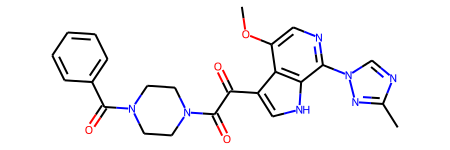

In [3926]:
M21 = mol_list [20]
M21

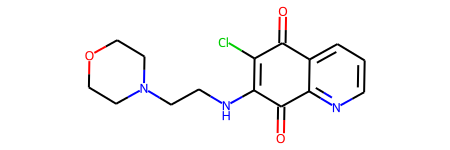

In [3927]:
M22 = mol_list [21]
M22

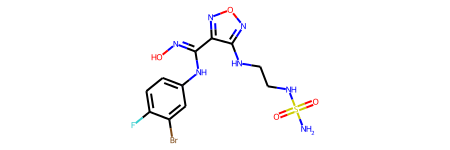

In [3928]:
M23 = mol_list [22]
M23

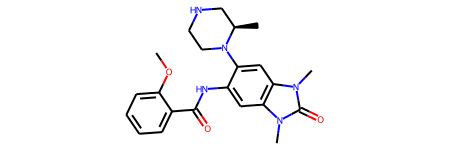

In [3929]:
M24 = mol_list [23]
M24

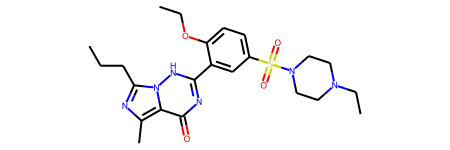

In [3930]:
M25 = mol_list [24]
M25

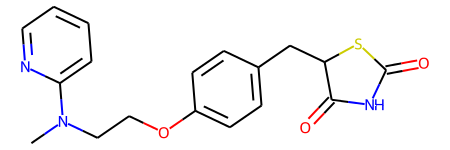

In [3931]:
M26 = mol_list [25]
M26

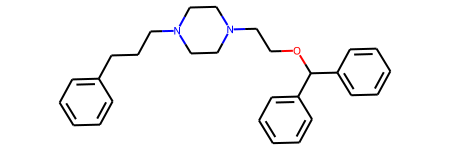

In [3932]:
M27 = mol_list [26]
M27

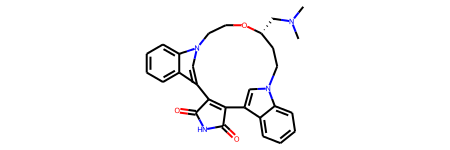

In [3933]:
M28 = mol_list [27]
M28

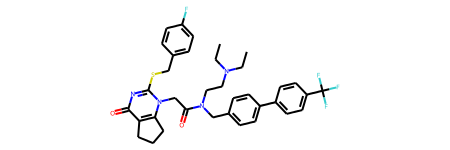

In [3934]:
M29 = mol_list [28]
M29

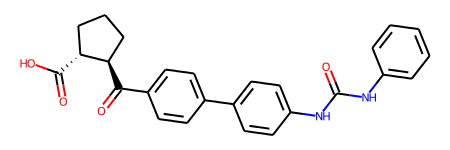

In [3935]:
M30 = mol_list [29]
M30

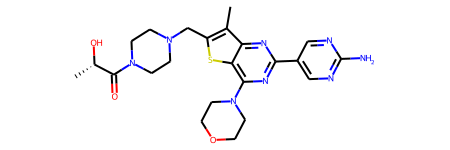

In [3936]:
M31 = mol_list [30]
M31

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


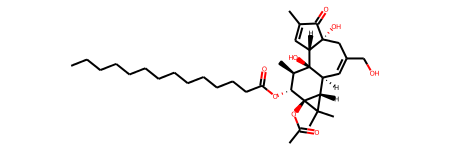

In [3937]:
M32 = mol_list [31]
M32

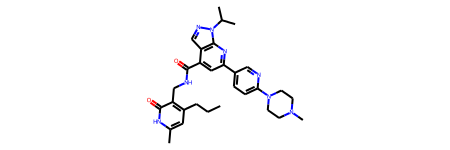

In [3938]:
M33 = mol_list [32]
M33

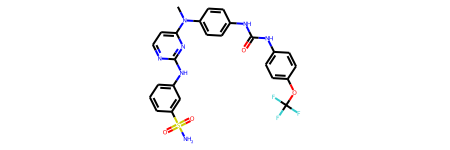

In [3939]:
M34 = mol_list [33]
M34

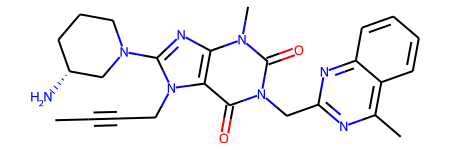

In [3940]:
M35 = mol_list [34]
M35

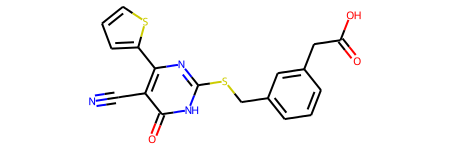

In [3941]:
M36 = mol_list [35]
M36

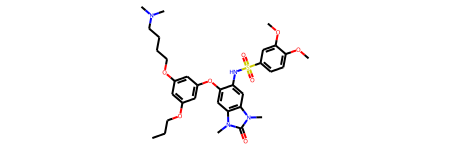

In [3942]:
M37= mol_list [36]
M37

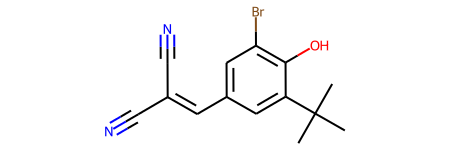

In [3943]:
M38= mol_list [37]
M38

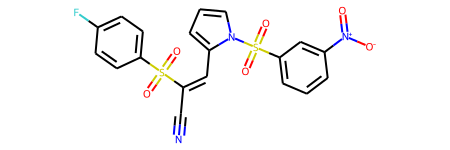

In [3944]:
M39= mol_list [38]
M39

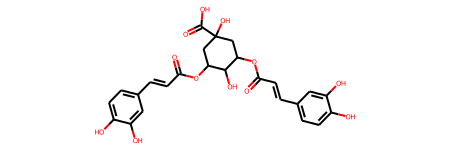

In [3945]:
M40= mol_list [39]
M40

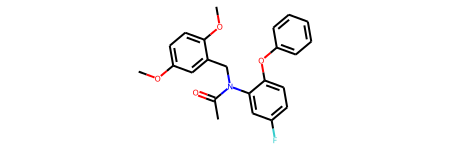

In [3946]:
M41= mol_list [40]
M41

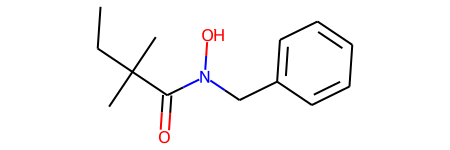

In [3947]:
M42= mol_list [41]
M42

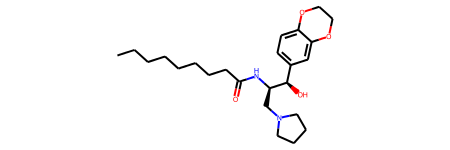

In [3948]:
M43= mol_list [42]
M43

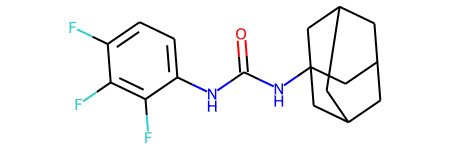

In [3949]:
M44= mol_list [43]
M44

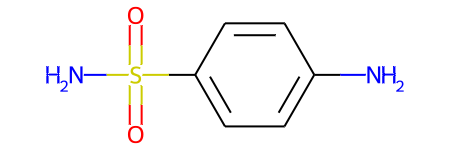

In [3950]:
M45= mol_list [44]
M45

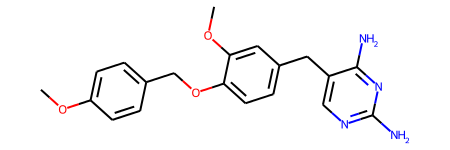

In [3951]:
M46= mol_list [45]
M46

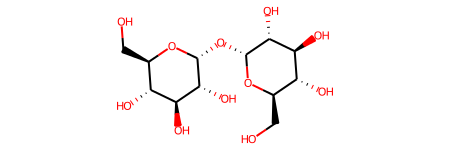

In [3952]:
M47= mol_list [46]
M47

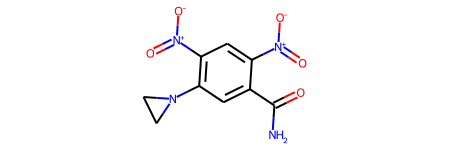

In [3953]:
M48= mol_list [47]
M48

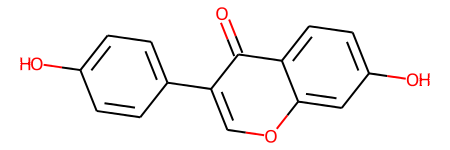

In [3954]:
M49= mol_list [48]
M49

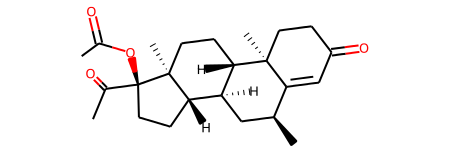

In [3955]:
M50= mol_list [49]
M50

In [3956]:
bi = {}

fp= AllChem.GetMorganFingerprintAsBitVect(M1, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp, fp_arr)
np.nonzero(fp_arr)
list(fp.GetOnBits())

[14,
 15,
 27,
 33,
 42,
 64,
 80,
 81,
 90,
 114,
 121,
 128,
 136,
 200,
 207,
 212,
 217,
 226,
 231,
 234,
 262,
 271,
 314,
 356,
 381,
 407,
 417,
 419,
 429,
 456,
 478,
 484,
 486,
 523,
 583,
 597,
 650,
 656,
 726,
 730,
 736,
 741,
 744,
 747,
 754,
 767,
 769,
 784,
 785,
 792,
 806,
 807,
 809,
 825,
 847,
 849,
 855,
 875,
 891,
 893,
 896,
 904,
 926,
 935,
 947,
 950,
 967,
 986]

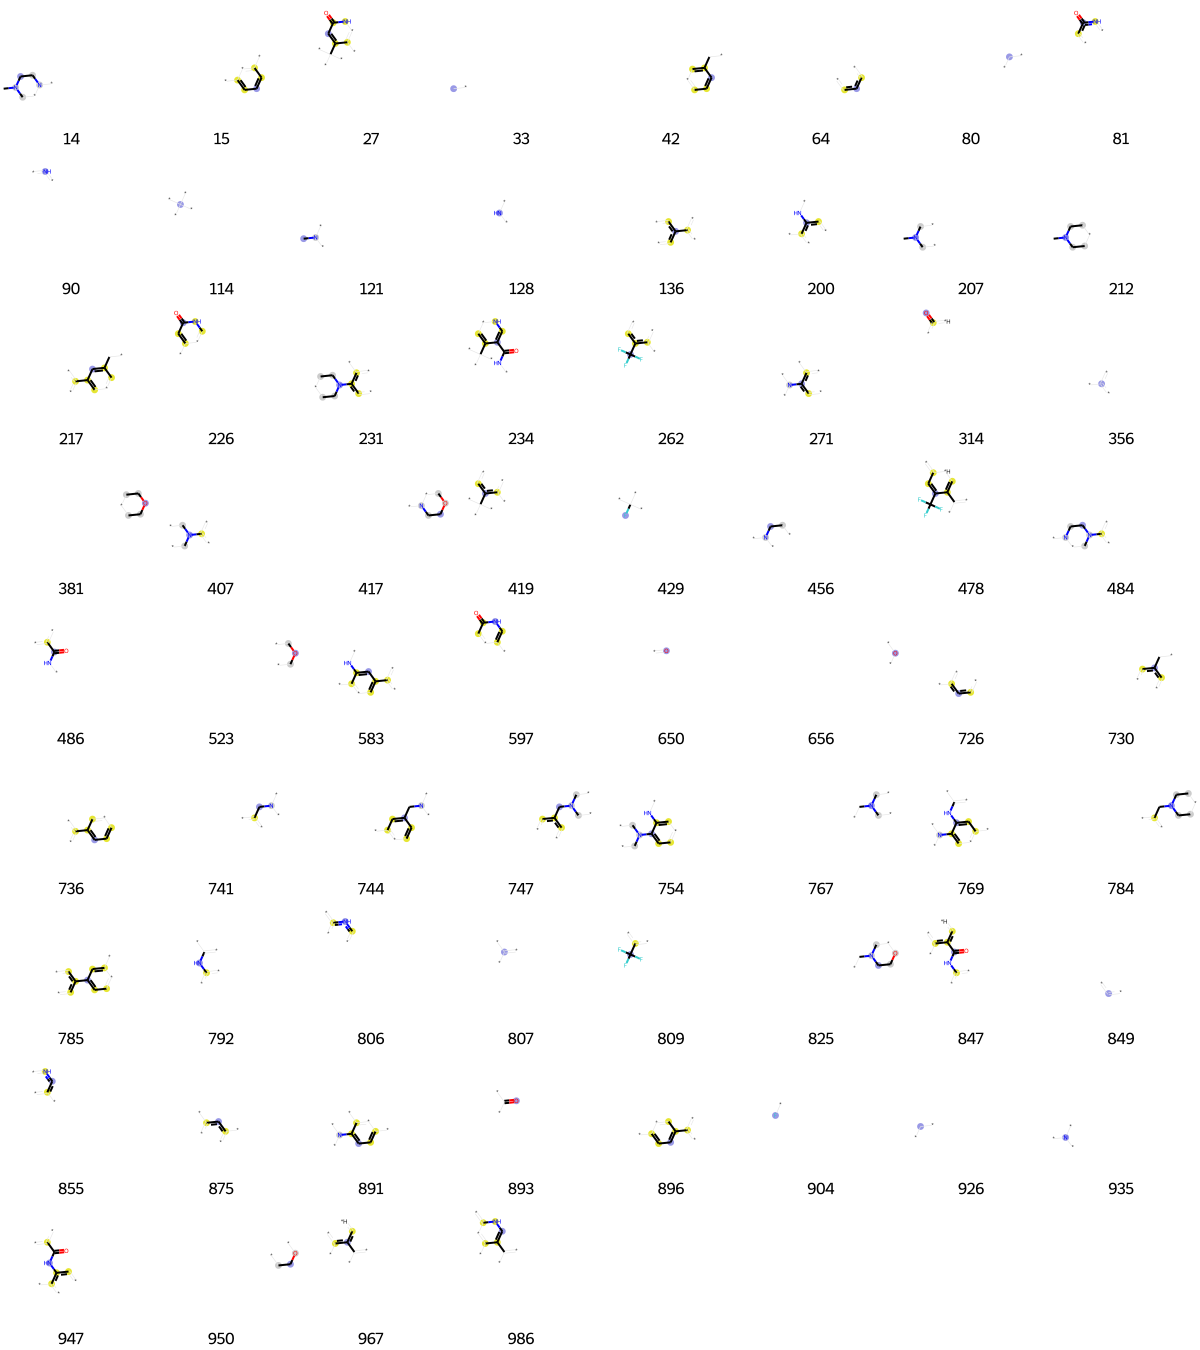

In [3957]:
prints = [(M1, x, bi) for x in fp.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp.GetOnBits ()])

In [3958]:
bi = {}

fp2= AllChem.GetMorganFingerprintAsBitVect(M2, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp2, fp_arr)
np.nonzero(fp_arr)
list(fp2.GetOnBits())

[1,
 5,
 33,
 39,
 64,
 68,
 80,
 81,
 89,
 95,
 116,
 121,
 128,
 140,
 175,
 186,
 227,
 232,
 233,
 255,
 257,
 259,
 314,
 329,
 341,
 356,
 367,
 378,
 387,
 389,
 399,
 417,
 456,
 464,
 470,
 484,
 557,
 573,
 585,
 647,
 650,
 675,
 698,
 726,
 747,
 753,
 759,
 762,
 807,
 849,
 859,
 872,
 882,
 893,
 898,
 926,
 935,
 936,
 963,
 983,
 998,
 1019]

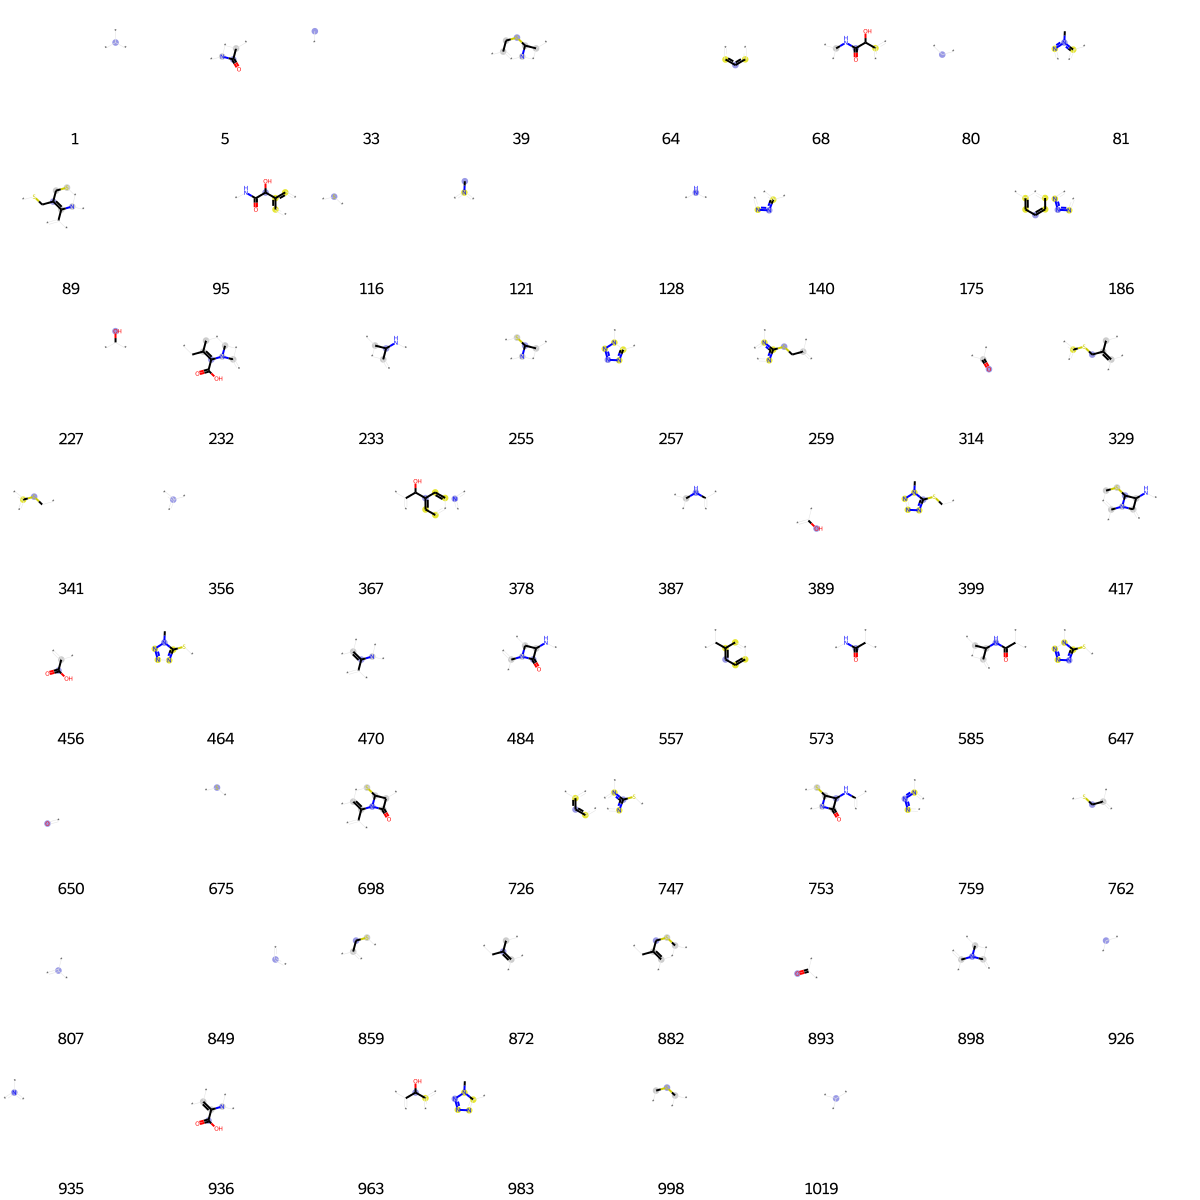

In [3959]:
prints = [(M2, x, bi) for x in fp2.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp2.GetOnBits ()])

In [3960]:
bi = {}

fp3= AllChem.GetMorganFingerprintAsBitVect(M3, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp3, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[64,
 80,
 91,
 112,
 128,
 147,
 164,
 171,
 175,
 200,
 354,
 356,
 392,
 493,
 650,
 667,
 672,
 715,
 716,
 726,
 753,
 777,
 816,
 838,
 849,
 887,
 899,
 939,
 948,
 981]

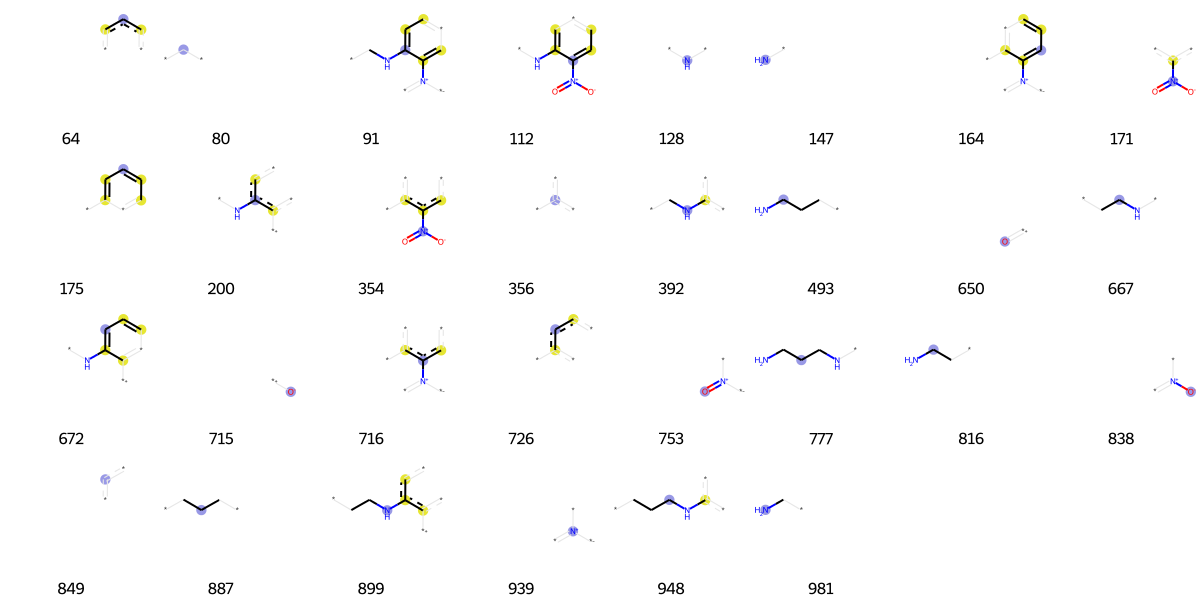

In [3961]:
prints = [(M3, x, bi) for x in fp3.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp3.GetOnBits ()])

In [3962]:
bi = {}

fp4= AllChem.GetMorganFingerprintAsBitVect(M4, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp4, fp_arr)
np.nonzero(fp_arr)
list(fp4.GetOnBits())

[33,
 41,
 45,
 64,
 80,
 104,
 121,
 128,
 129,
 175,
 180,
 200,
 231,
 261,
 273,
 314,
 356,
 358,
 367,
 540,
 569,
 580,
 650,
 656,
 658,
 672,
 698,
 726,
 784,
 790,
 792,
 802,
 807,
 840,
 849,
 893,
 903,
 924,
 935,
 954,
 975]

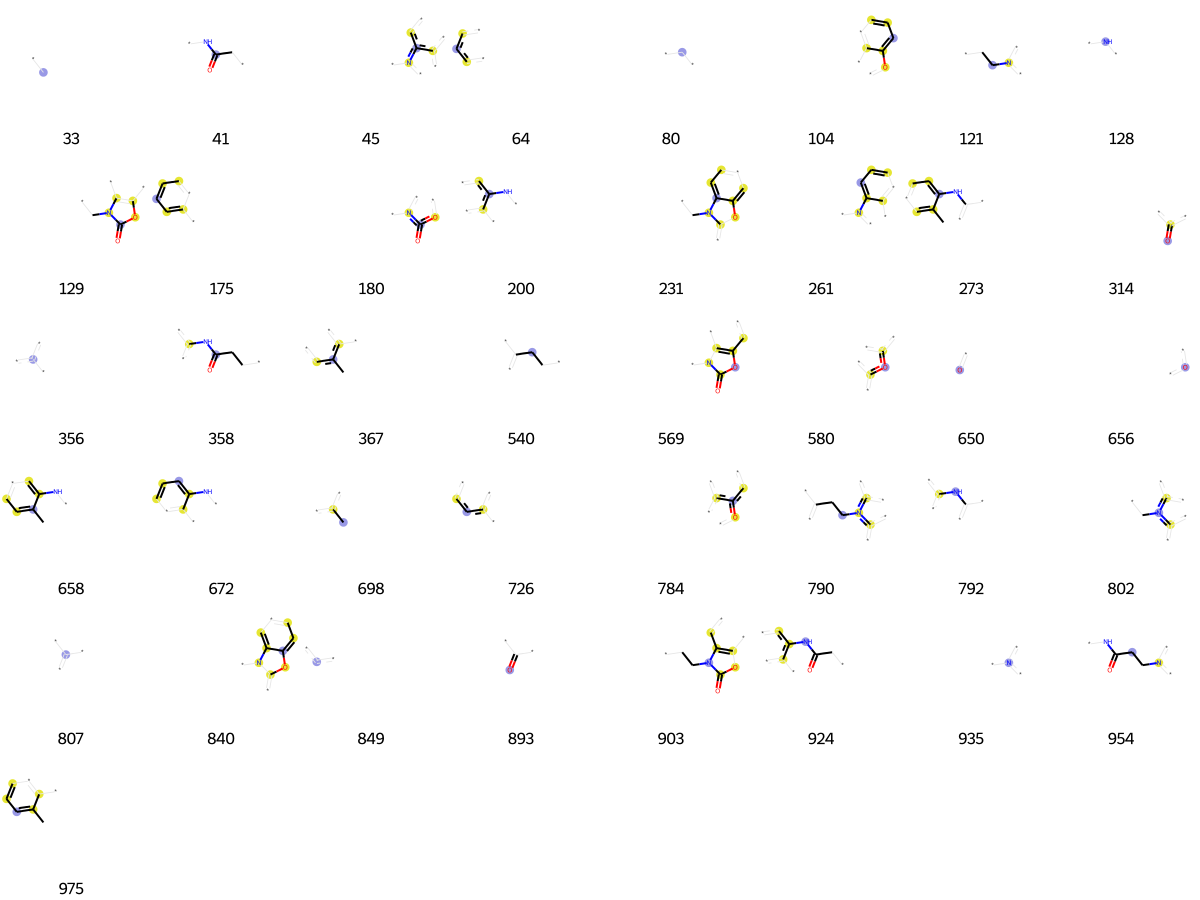

In [3963]:
prints = [(M4, x, bi) for x in fp4.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp4.GetOnBits ()])

In [3964]:
bi = {}

fp5= AllChem.GetMorganFingerprintAsBitVect(M5, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp5, fp_arr)
np.nonzero(fp_arr)
list(fp5.GetOnBits())

[23,
 42,
 73,
 74,
 133,
 136,
 155,
 167,
 289,
 356,
 378,
 575,
 578,
 580,
 607,
 656,
 671,
 720,
 726,
 728,
 745,
 754,
 807,
 831,
 833,
 849,
 875,
 896,
 903,
 927,
 937]

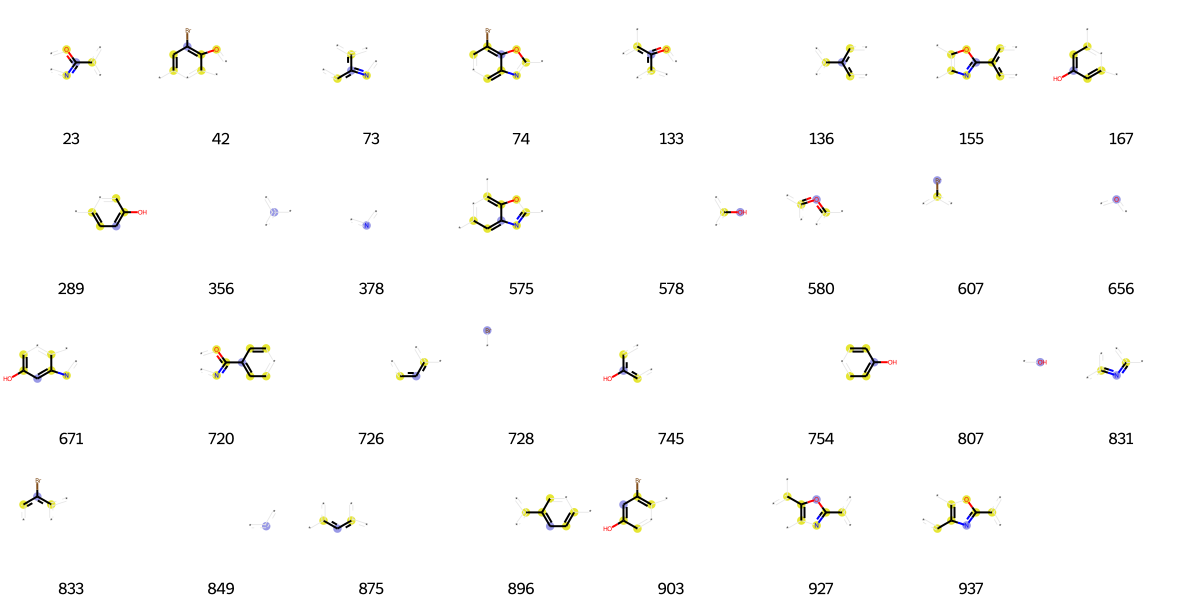

In [3965]:
prints = [(M5, x, bi) for x in fp5.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp5.GetOnBits ()])

In [3966]:
bi = {}

fp6= AllChem.GetMorganFingerprintAsBitVect(M6, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp6, fp_arr)
np.nonzero(fp_arr)
list(fp6.GetOnBits())

[14,
 33,
 39,
 62,
 114,
 121,
 136,
 160,
 162,
 203,
 204,
 207,
 212,
 235,
 294,
 333,
 350,
 356,
 419,
 430,
 451,
 456,
 472,
 480,
 519,
 565,
 578,
 583,
 623,
 650,
 675,
 676,
 694,
 701,
 709,
 726,
 807,
 831,
 836,
 849,
 875,
 893,
 896,
 926,
 935,
 942,
 970,
 985,
 1004]

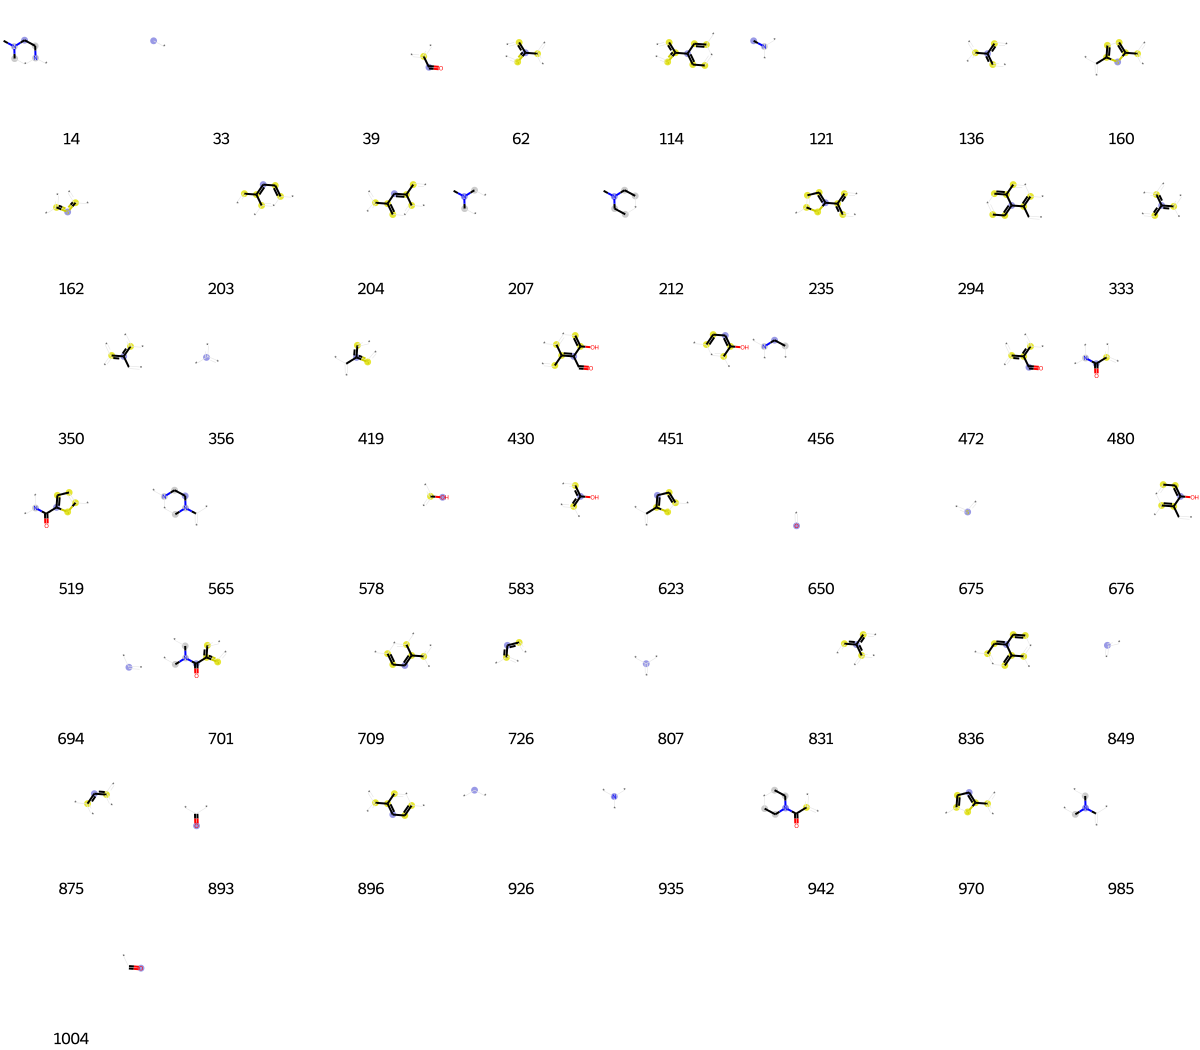

In [3967]:
prints = [(M6, x, bi) for x in fp6.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp6.GetOnBits ()])

In [3968]:
bi = {}

fp7= AllChem.GetMorganFingerprintAsBitVect(M7, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp7, fp_arr)
np.nonzero(fp_arr)
list(fp7.GetOnBits())

[15,
 24,
 33,
 63,
 64,
 80,
 114,
 147,
 175,
 209,
 267,
 292,
 313,
 323,
 333,
 352,
 353,
 356,
 377,
 378,
 392,
 408,
 428,
 433,
 435,
 489,
 544,
 548,
 549,
 672,
 726,
 786,
 831,
 849,
 932,
 935,
 960,
 984,
 989]

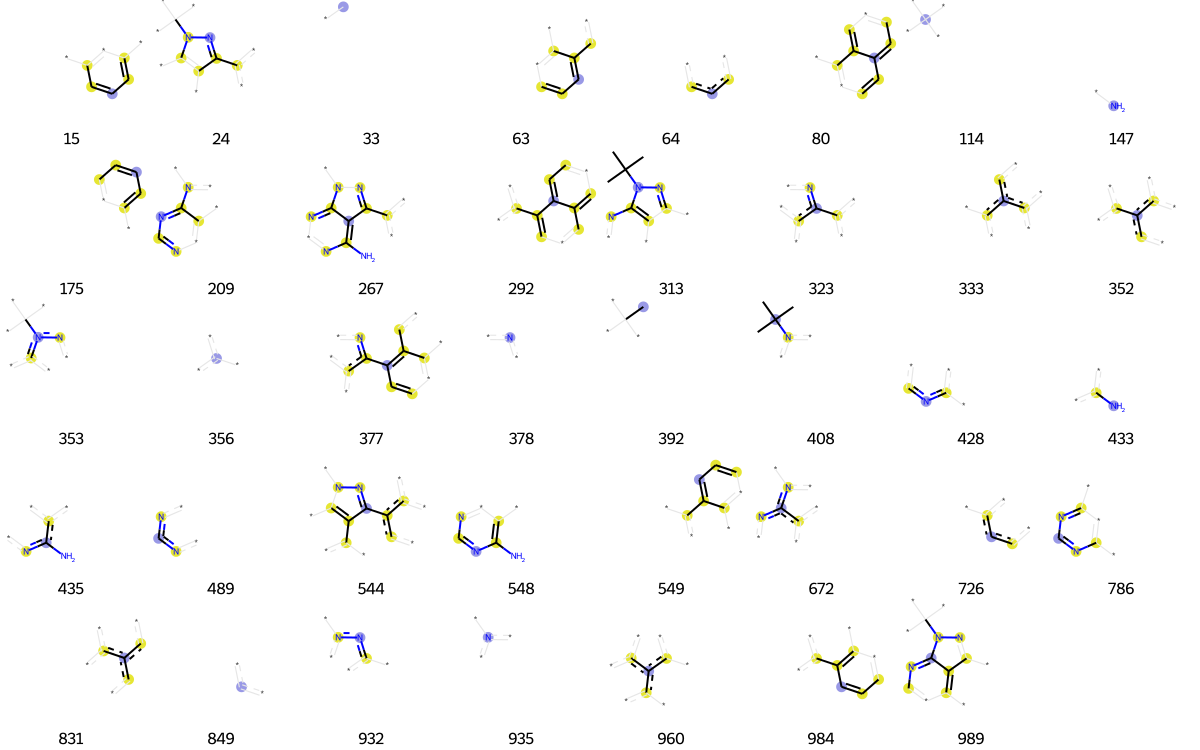

In [3969]:
prints = [(M7, x, bi) for x in fp7.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp7.GetOnBits ()])

In [3970]:
bi = {}

fp8= AllChem.GetMorganFingerprintAsBitVect(M8, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp8, fp_arr)
np.nonzero(fp_arr)
list(fp8.GetOnBits())

[4,
 33,
 39,
 46,
 64,
 80,
 92,
 121,
 175,
 207,
 212,
 216,
 282,
 301,
 310,
 314,
 333,
 343,
 356,
 378,
 384,
 406,
 446,
 456,
 503,
 504,
 549,
 561,
 584,
 611,
 650,
 659,
 726,
 730,
 757,
 816,
 834,
 847,
 849,
 873,
 886,
 910,
 926,
 932,
 935,
 969,
 993,
 1019]

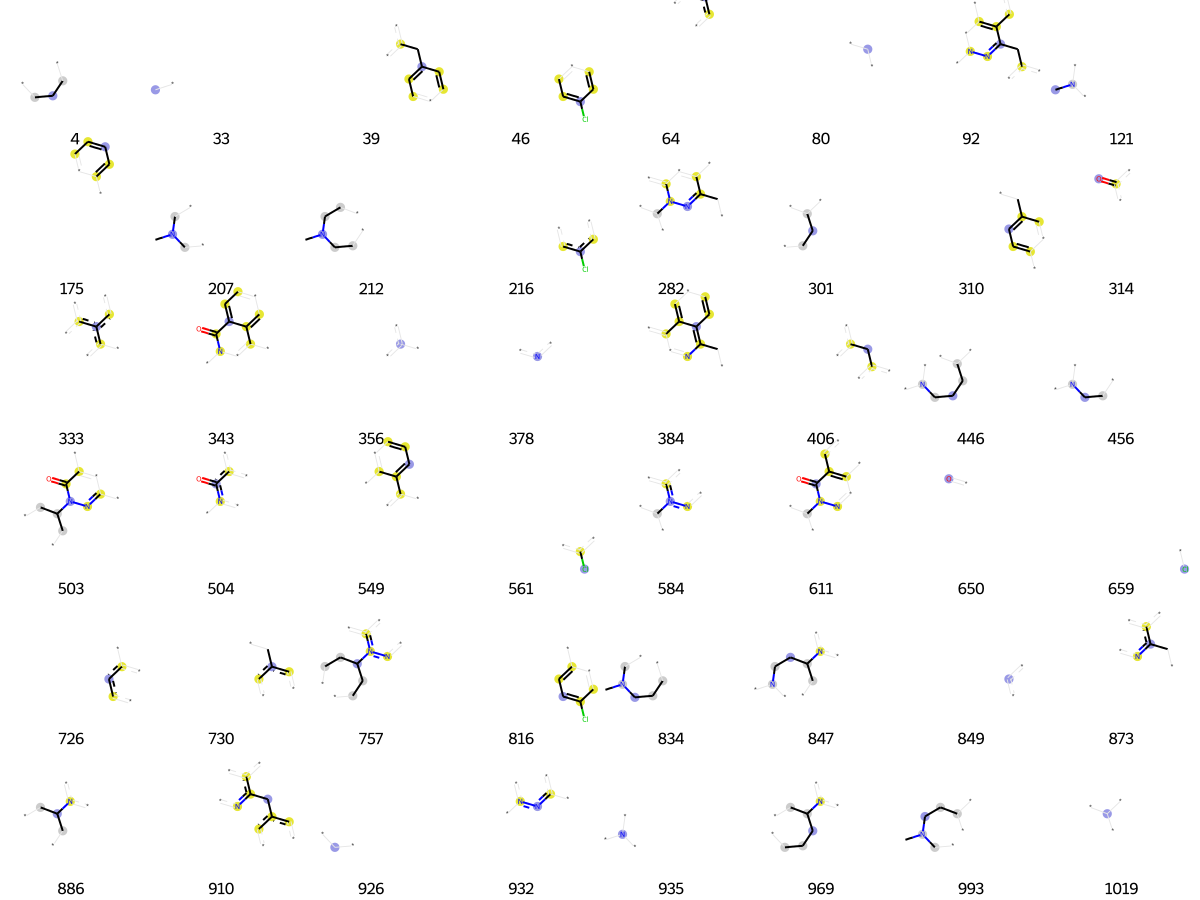

In [3971]:
prints = [(M8, x, bi) for x in fp8.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp8.GetOnBits ()])


In [3972]:
bi = {}

fp9= AllChem.GetMorganFingerprintAsBitVect(M9, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp9, fp_arr)
np.nonzero(fp_arr)
list(fp9.GetOnBits())

[3,
 15,
 19,
 33,
 40,
 43,
 64,
 73,
 136,
 194,
 207,
 247,
 257,
 289,
 322,
 333,
 352,
 356,
 378,
 409,
 428,
 448,
 463,
 464,
 487,
 511,
 512,
 549,
 613,
 629,
 672,
 695,
 711,
 716,
 718,
 726,
 781,
 831,
 841,
 842,
 849,
 896,
 905,
 935,
 940,
 984]

In [3973]:
bi = {}

fp10= AllChem.GetMorganFingerprintAsBitVect(M10, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp10, fp_arr)
np.nonzero(fp_arr)
list(fp10.GetOnBits())

[3,
 11,
 36,
 73,
 90,
 114,
 119,
 156,
 183,
 193,
 214,
 221,
 236,
 240,
 260,
 312,
 314,
 322,
 332,
 339,
 346,
 356,
 361,
 378,
 393,
 428,
 429,
 433,
 438,
 465,
 498,
 535,
 551,
 593,
 629,
 641,
 647,
 650,
 656,
 668,
 687,
 695,
 710,
 714,
 718,
 721,
 726,
 750,
 787,
 795,
 809,
 831,
 842,
 849,
 872,
 875,
 876,
 881,
 904,
 915,
 918,
 924,
 926,
 946,
 973,
 988,
 1019]

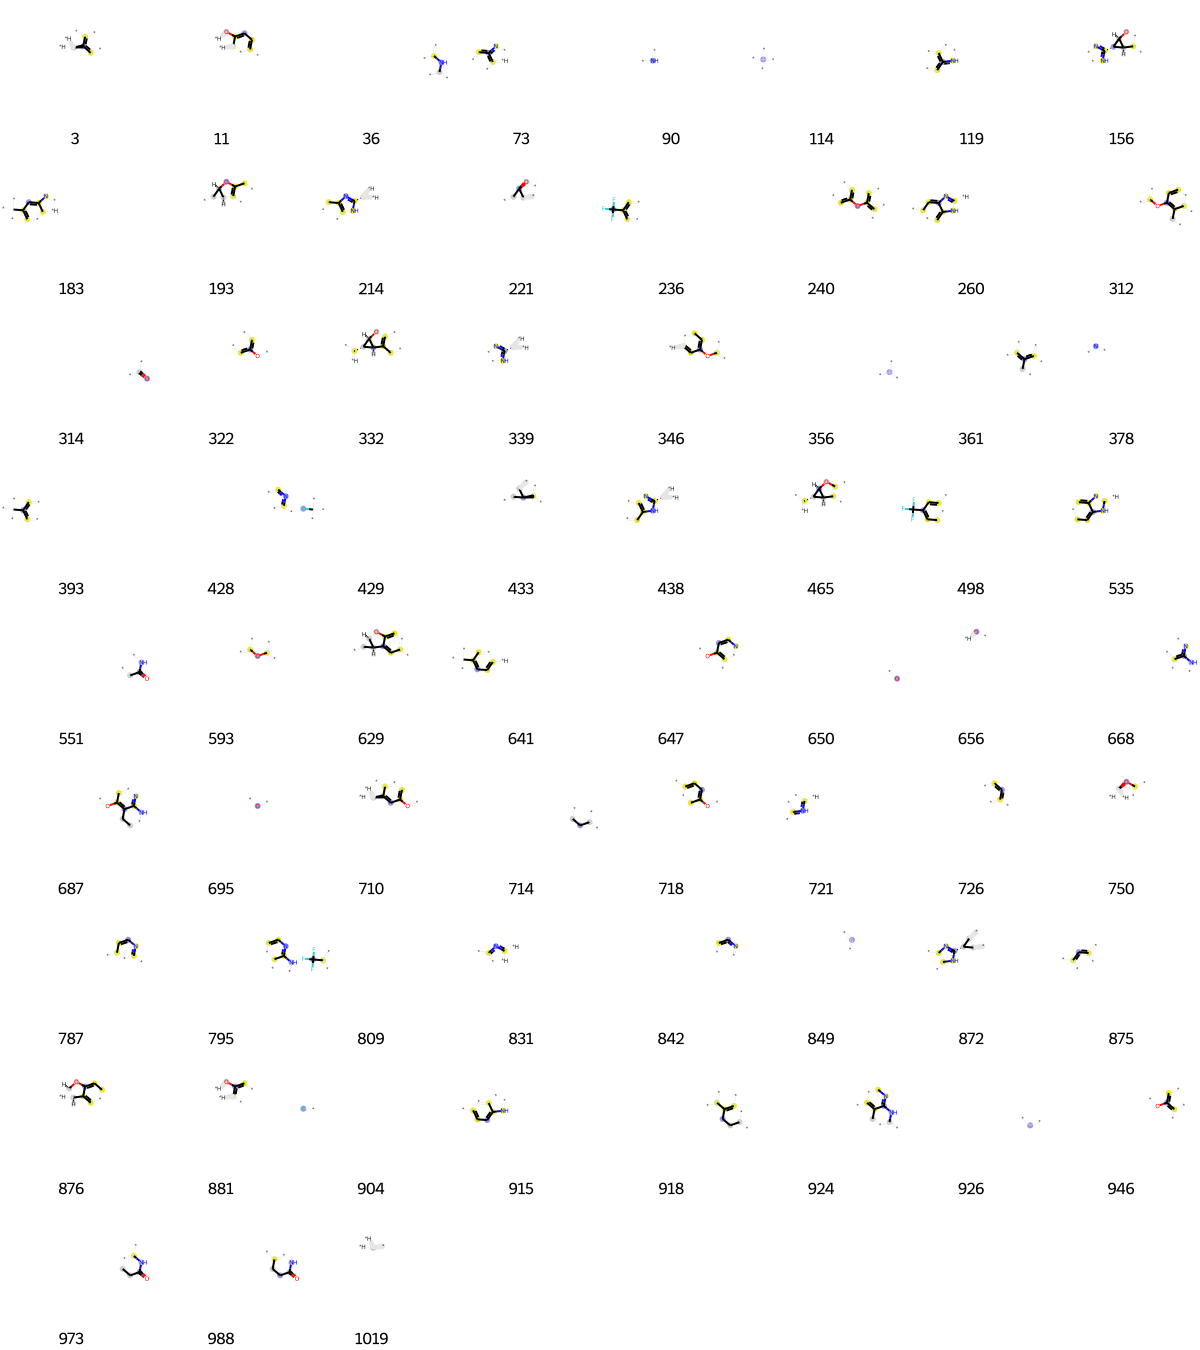

In [3974]:
prints = [(M10, x, bi) for x in fp10.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp10.GetOnBits ()])

In [3975]:
bi = {}

fp11= AllChem.GetMorganFingerprintAsBitVect(M11, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp11, fp_arr)
np.nonzero(fp_arr)
list(fp11.GetOnBits())

[7,
 11,
 16,
 19,
 33,
 36,
 64,
 102,
 119,
 136,
 138,
 161,
 163,
 182,
 186,
 231,
 245,
 250,
 257,
 260,
 301,
 302,
 350,
 356,
 377,
 378,
 437,
 504,
 511,
 519,
 521,
 529,
 562,
 579,
 598,
 622,
 650,
 694,
 695,
 696,
 726,
 736,
 757,
 767,
 807,
 842,
 849,
 854,
 860,
 893,
 926,
 987,
 1017,
 1019]

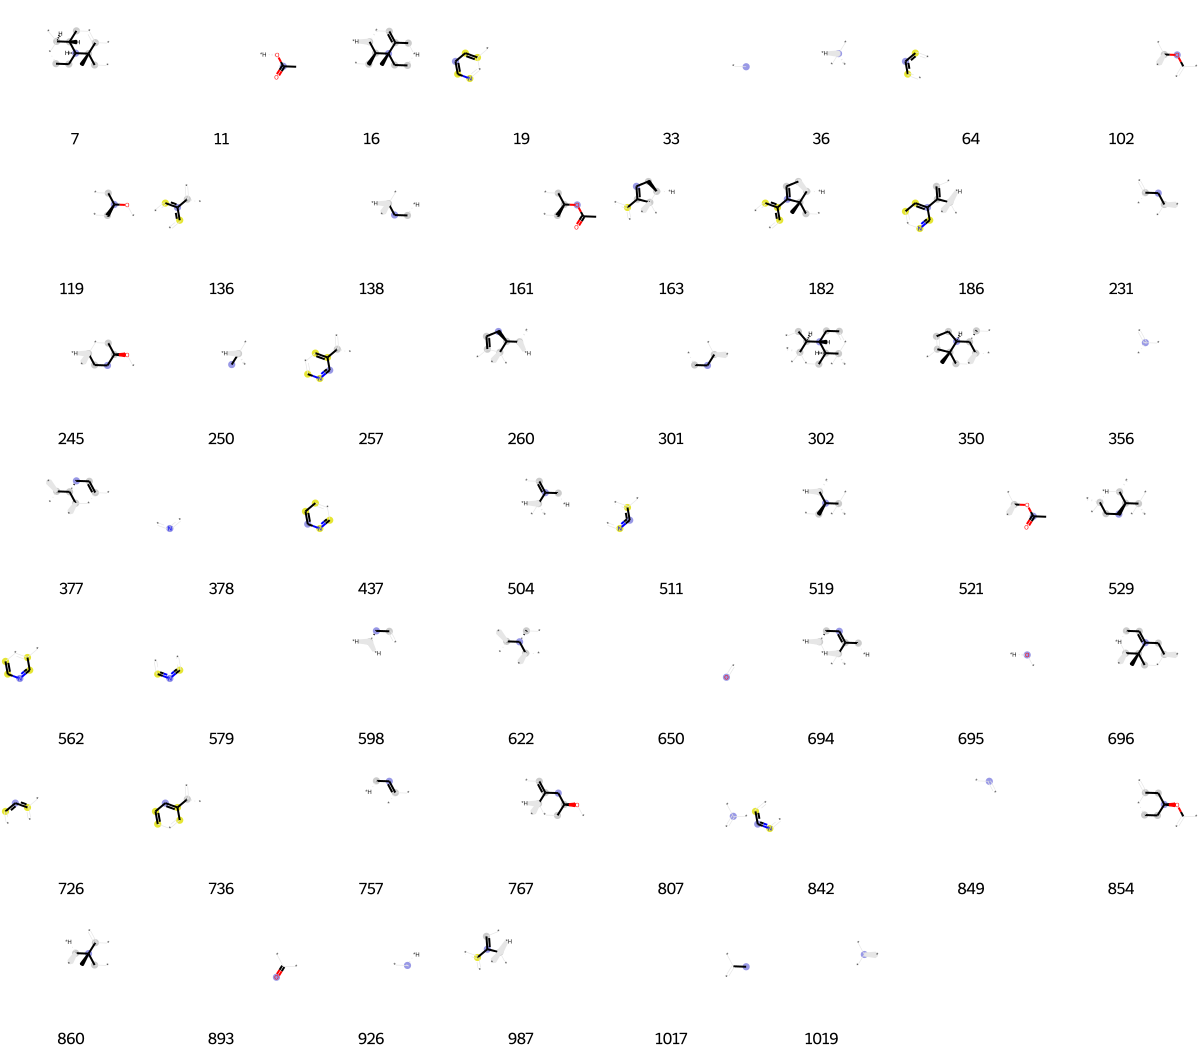

In [3976]:
prints = [(M11, x, bi) for x in fp11.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp11.GetOnBits ()])

In [3977]:
bi = {}

fp12= AllChem.GetMorganFingerprintAsBitVect(M12, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp12, fp_arr)
np.nonzero(fp_arr)
list(fp12.GetOnBits())

[1,
 15,
 33,
 38,
 64,
 80,
 90,
 108,
 124,
 128,
 140,
 147,
 197,
 212,
 231,
 232,
 233,
 242,
 268,
 277,
 284,
 285,
 297,
 301,
 350,
 356,
 369,
 389,
 392,
 407,
 408,
 409,
 427,
 452,
 456,
 470,
 488,
 492,
 502,
 531,
 559,
 582,
 623,
 629,
 650,
 667,
 684,
 697,
 708,
 726,
 736,
 739,
 807,
 842,
 849,
 852,
 859,
 887,
 893,
 894,
 917,
 926,
 935,
 937,
 945,
 983,
 992,
 1019]

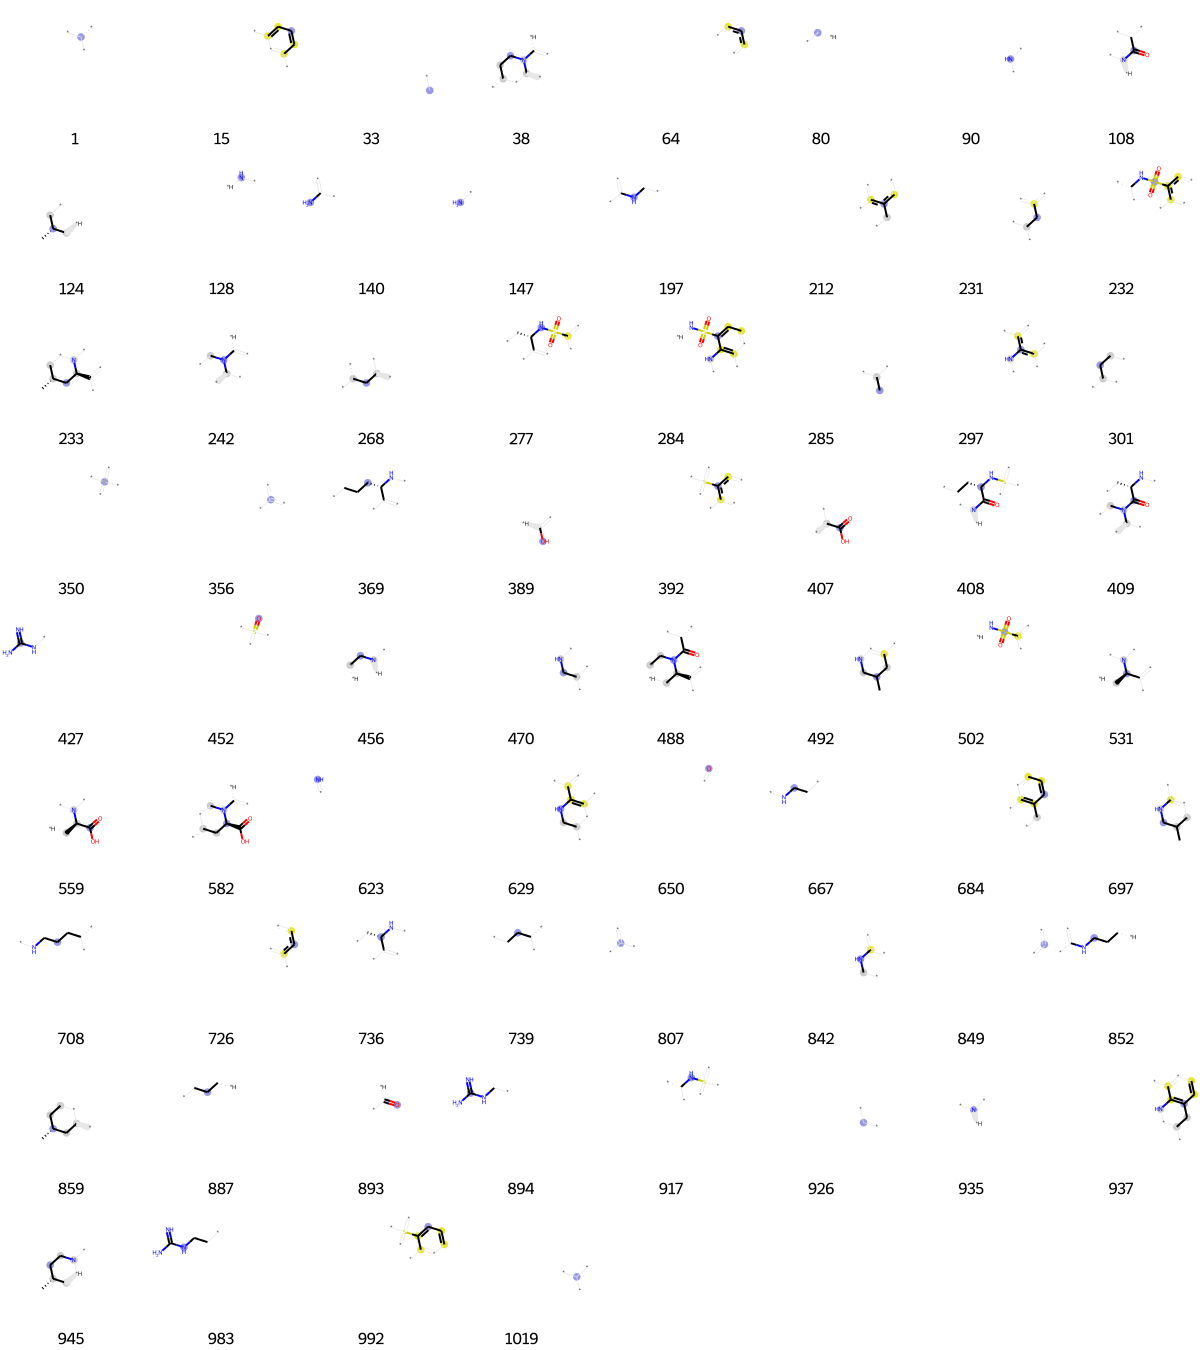

In [3978]:
prints = [(M12, x, bi) for x in fp12.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp12.GetOnBits ()])

In [3979]:
bi = {}

fp13= AllChem.GetMorganFingerprintAsBitVect(M13, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp13, fp_arr)
np.nonzero(fp_arr)
list(fp13.GetOnBits())

[11,
 32,
 33,
 36,
 59,
 65,
 84,
 88,
 129,
 132,
 138,
 155,
 242,
 250,
 255,
 274,
 301,
 314,
 356,
 412,
 420,
 424,
 460,
 479,
 519,
 529,
 547,
 555,
 565,
 574,
 604,
 650,
 666,
 695,
 697,
 714,
 718,
 735,
 807,
 841,
 849,
 860,
 893,
 926,
 947,
 1017,
 1019]

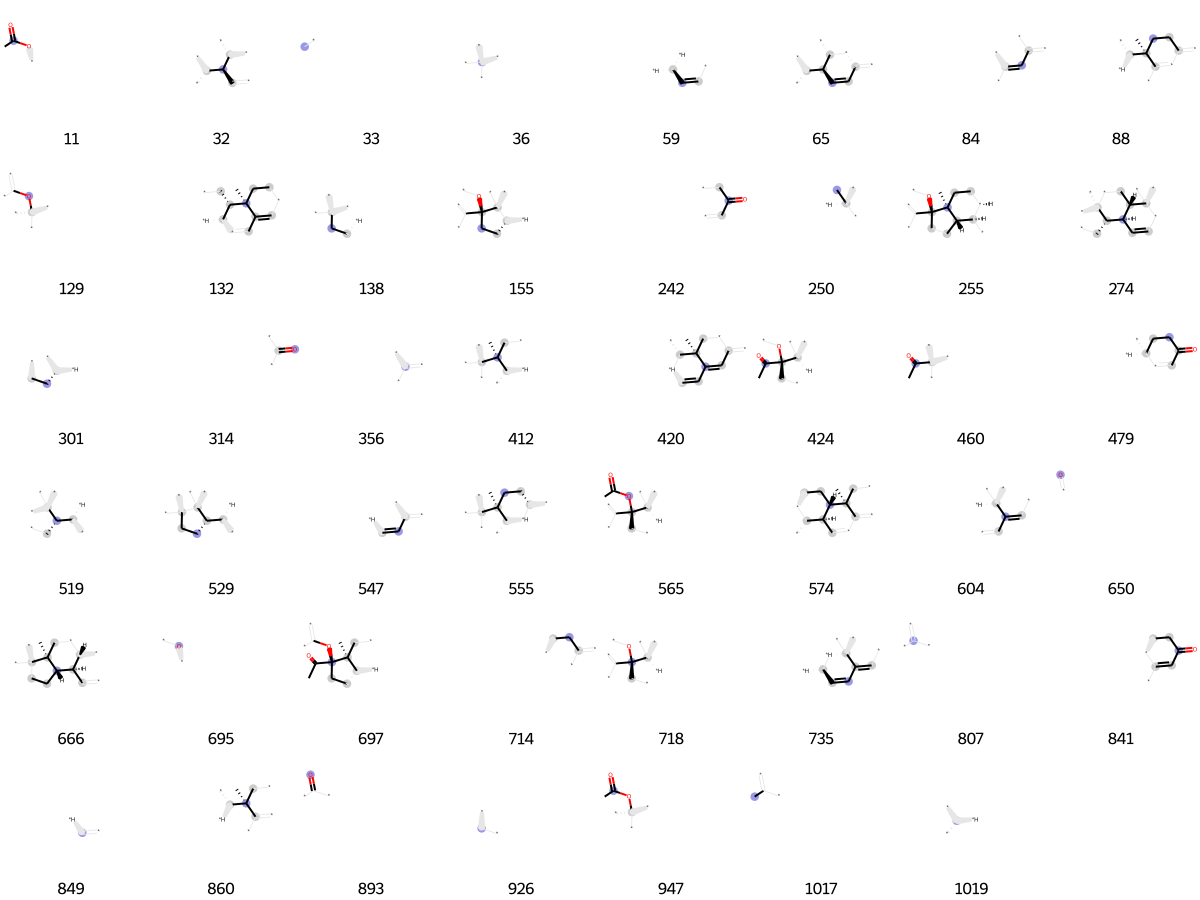

In [3980]:
prints = [(M13, x, bi) for x in fp13.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp13.GetOnBits ()])

In [3981]:
bi = {}

fp14= AllChem.GetMorganFingerprintAsBitVect(M14, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp14, fp_arr)
np.nonzero(fp_arr)
list(fp14.GetOnBits())

[33,
 189,
 235,
 239,
 276,
 319,
 350,
 356,
 452,
 615,
 641,
 650,
 659,
 698,
 715,
 726,
 799,
 846,
 849,
 896,
 961]

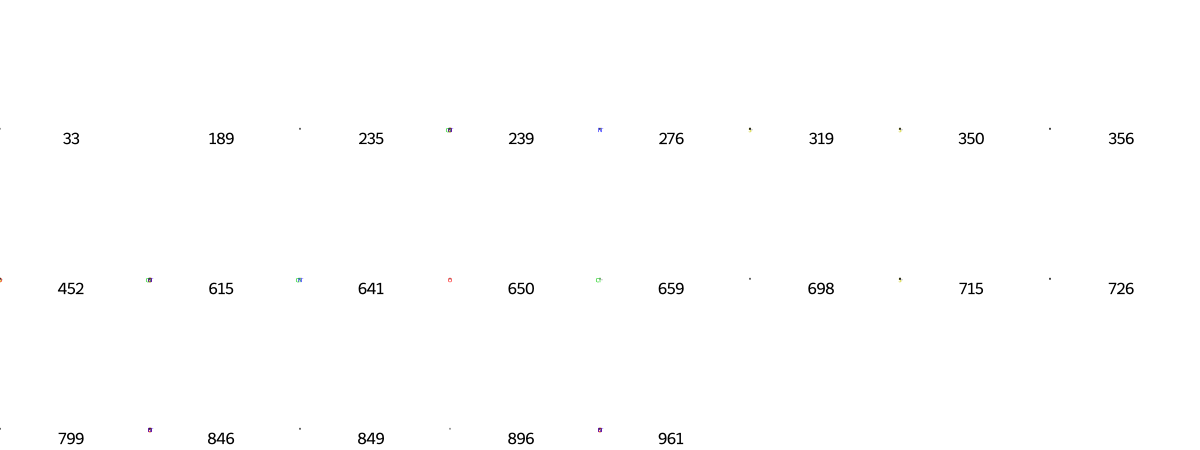

In [3982]:
prints = [(M14, x, bi) for x in fp14.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp14.GetOnBits ()])

In [3983]:
bi = {}

fp15= AllChem.GetMorganFingerprintAsBitVect(M15, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp15, fp_arr)
np.nonzero(fp_arr)
list(fp15.GetOnBits())

[25,
 33,
 36,
 38,
 46,
 80,
 124,
 138,
 147,
 214,
 250,
 265,
 284,
 285,
 294,
 299,
 301,
 391,
 501,
 519,
 521,
 529,
 562,
 611,
 656,
 661,
 695,
 709,
 785,
 801,
 823,
 835,
 861,
 864,
 892,
 897,
 926,
 955,
 1003,
 1019]

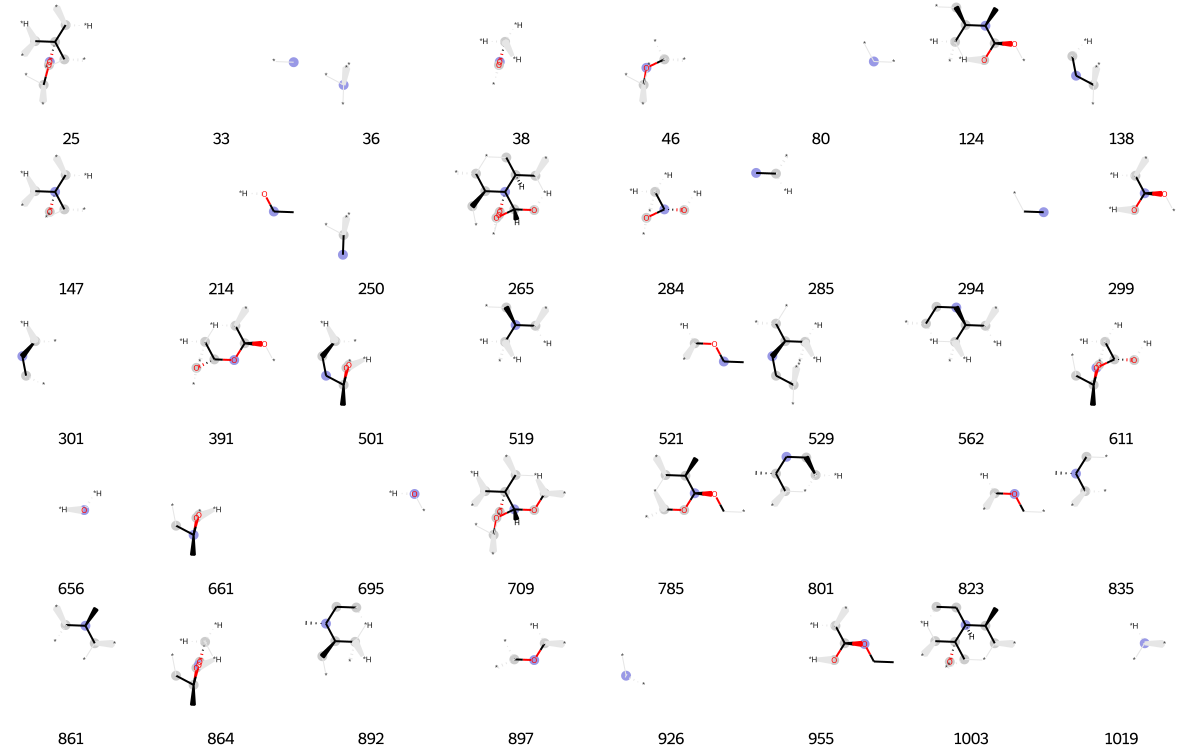

In [3984]:
prints = [(M15, x, bi) for x in fp15.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp15.GetOnBits ()])

In [3985]:
bi = {}

fp16= AllChem.GetMorganFingerprintAsBitVect(M16, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp16, fp_arr)
np.nonzero(fp_arr)
list(fp16.GetOnBits())

[25,
 33,
 35,
 36,
 44,
 46,
 64,
 116,
 123,
 138,
 176,
 221,
 250,
 253,
 301,
 314,
 342,
 356,
 455,
 472,
 497,
 509,
 562,
 639,
 650,
 656,
 698,
 714,
 750,
 757,
 783,
 798,
 811,
 835,
 849,
 872,
 899,
 926,
 934,
 955,
 1019]

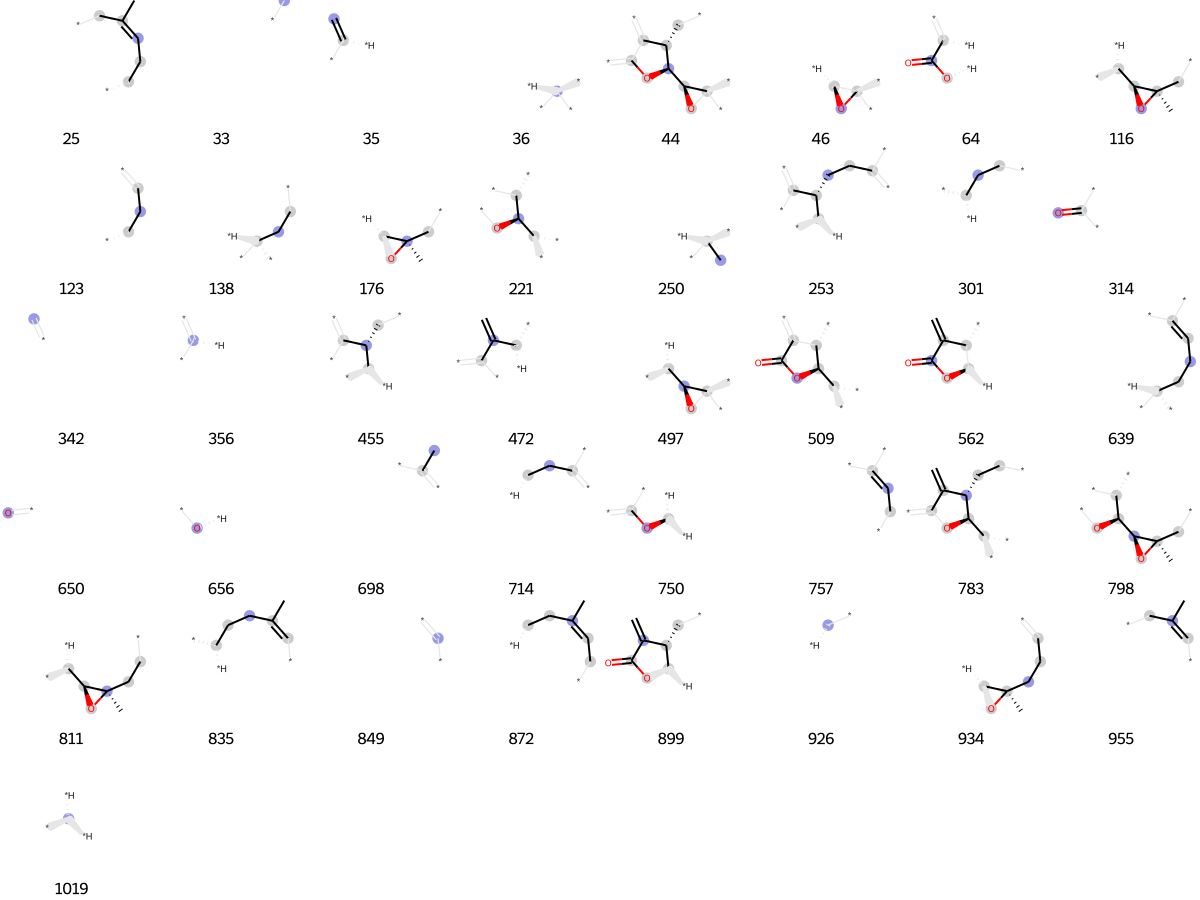

In [3986]:
prints = [(M16, x, bi) for x in fp16.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp16.GetOnBits ()])

In [3987]:
bi = {}

fp17= AllChem.GetMorganFingerprintAsBitVect(M17, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp17, fp_arr)
np.nonzero(fp_arr)
list(fp17.GetOnBits())

[15,
 64,
 72,
 73,
 82,
 104,
 114,
 128,
 160,
 165,
 178,
 184,
 191,
 216,
 225,
 329,
 333,
 356,
 361,
 378,
 389,
 456,
 491,
 511,
 561,
 562,
 579,
 592,
 639,
 646,
 650,
 659,
 673,
 703,
 708,
 709,
 726,
 807,
 831,
 842,
 849,
 875,
 882,
 888,
 893,
 897,
 1020]

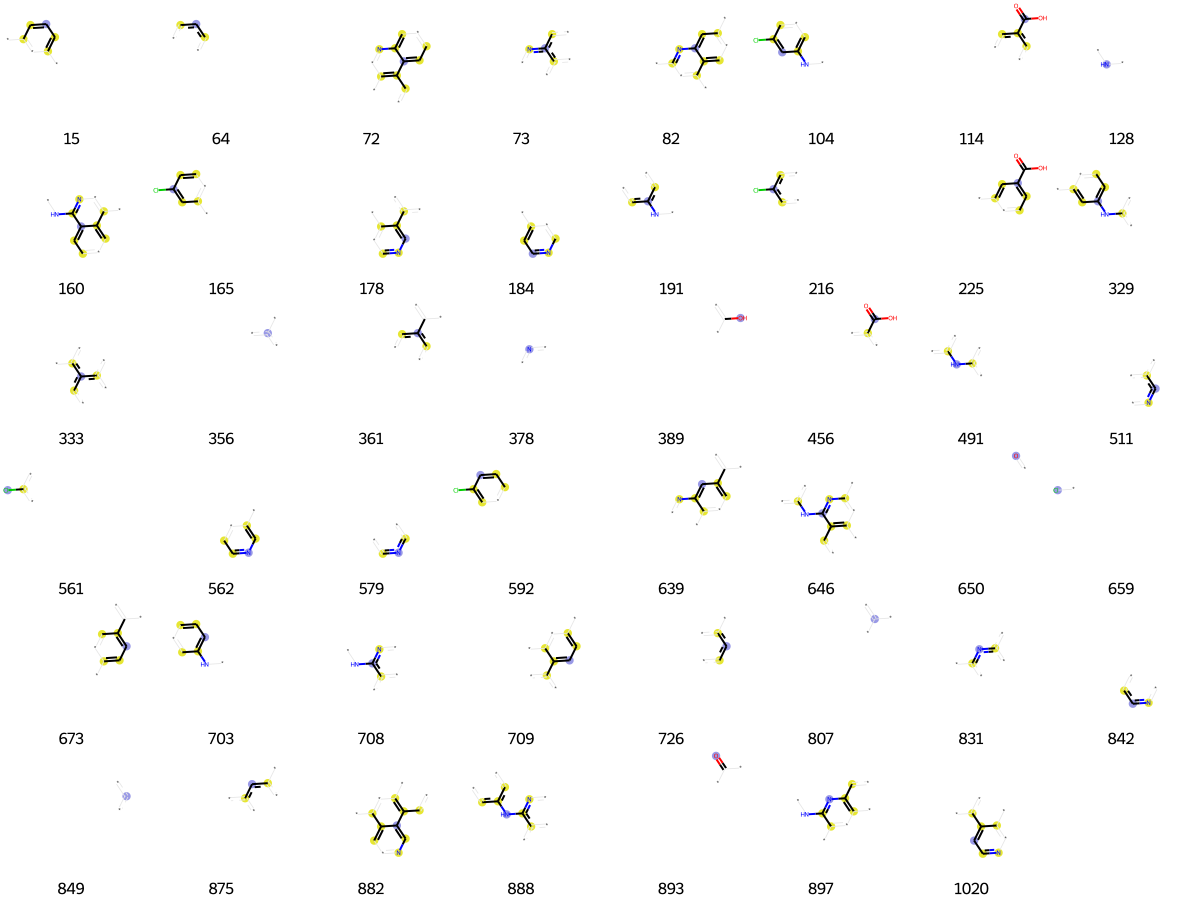

In [3988]:
prints = [(M17, x, bi) for x in fp17.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp17.GetOnBits ()])

In [3989]:
bi = {}

fp18= AllChem.GetMorganFingerprintAsBitVect(M18, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp18, fp_arr)
np.nonzero(fp_arr)
list(fp18.GetOnBits())

[1,
 14,
 33,
 80,
 125,
 128,
 147,
 226,
 231,
 235,
 239,
 245,
 269,
 290,
 294,
 339,
 356,
 387,
 389,
 456,
 481,
 520,
 590,
 644,
 650,
 654,
 695,
 707,
 756,
 786,
 807,
 808,
 849,
 893,
 918,
 926,
 935,
 1006,
 1017,
 1019]

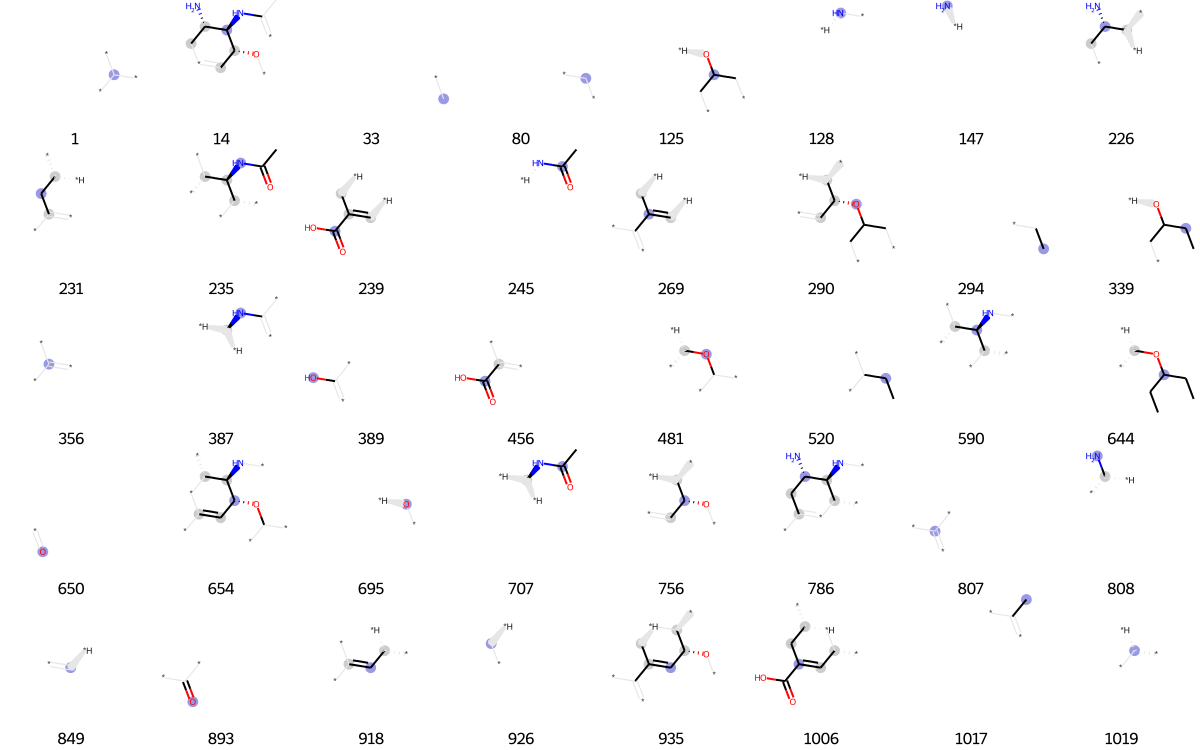

In [3990]:
prints = [(M18, x, bi) for x in fp18.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp18.GetOnBits ()])

In [3991]:
bi = {}

fp19= AllChem.GetMorganFingerprintAsBitVect(M19, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp19, fp_arr)
np.nonzero(fp_arr)
list(fp19.GetOnBits())

[4,
 15,
 30,
 33,
 52,
 64,
 114,
 121,
 128,
 132,
 142,
 345,
 356,
 367,
 381,
 456,
 461,
 576,
 648,
 650,
 669,
 698,
 714,
 725,
 726,
 729,
 787,
 792,
 807,
 849,
 893,
 926,
 930,
 935,
 975]

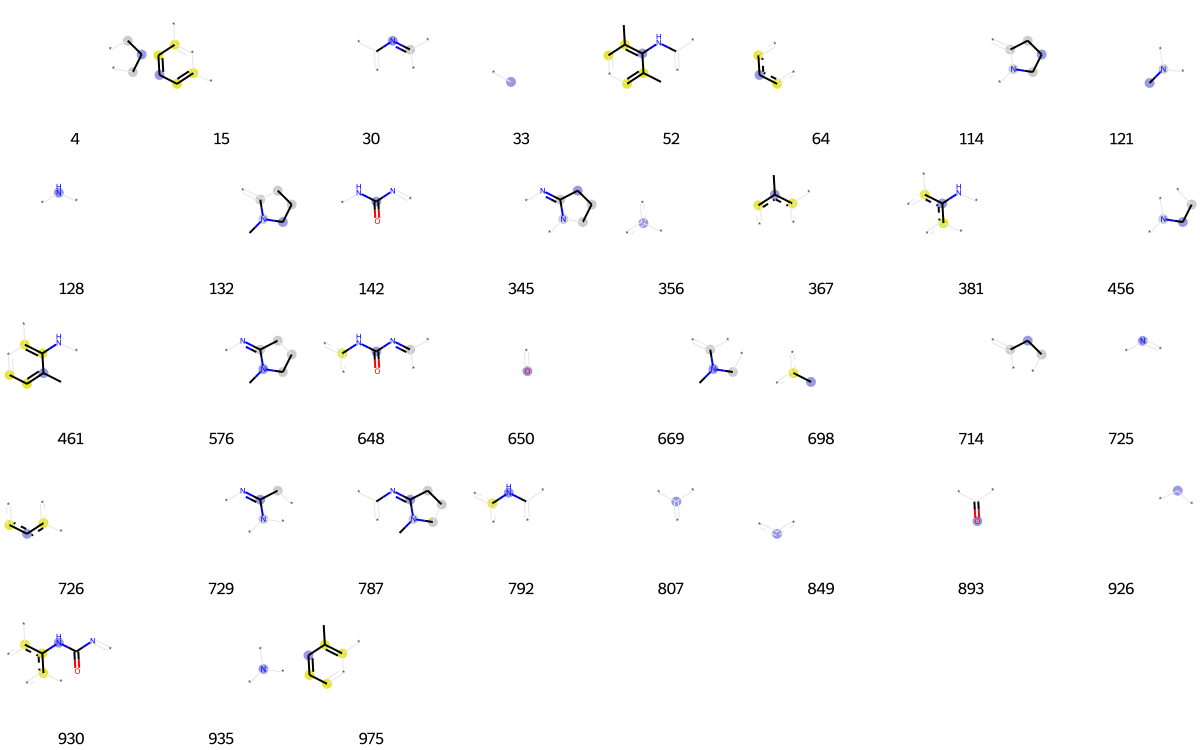

In [3992]:
prints = [(M19, x, bi) for x in fp19.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp19.GetOnBits ()])

In [3993]:
bi = {}

fp20= AllChem.GetMorganFingerprintAsBitVect(M20, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp20, fp_arr)
np.nonzero(fp_arr)
list(fp20.GetOnBits())

[15,
 33,
 37,
 41,
 64,
 73,
 77,
 80,
 86,
 94,
 114,
 120,
 121,
 128,
 191,
 197,
 202,
 236,
 238,
 240,
 250,
 307,
 322,
 329,
 343,
 346,
 356,
 366,
 374,
 378,
 392,
 393,
 401,
 416,
 428,
 429,
 431,
 489,
 491,
 498,
 557,
 559,
 561,
 562,
 586,
 593,
 597,
 650,
 655,
 659,
 667,
 695,
 708,
 726,
 740,
 786,
 790,
 807,
 809,
 843,
 849,
 855,
 875,
 884,
 888,
 893,
 904,
 935,
 946,
 993,
 995]

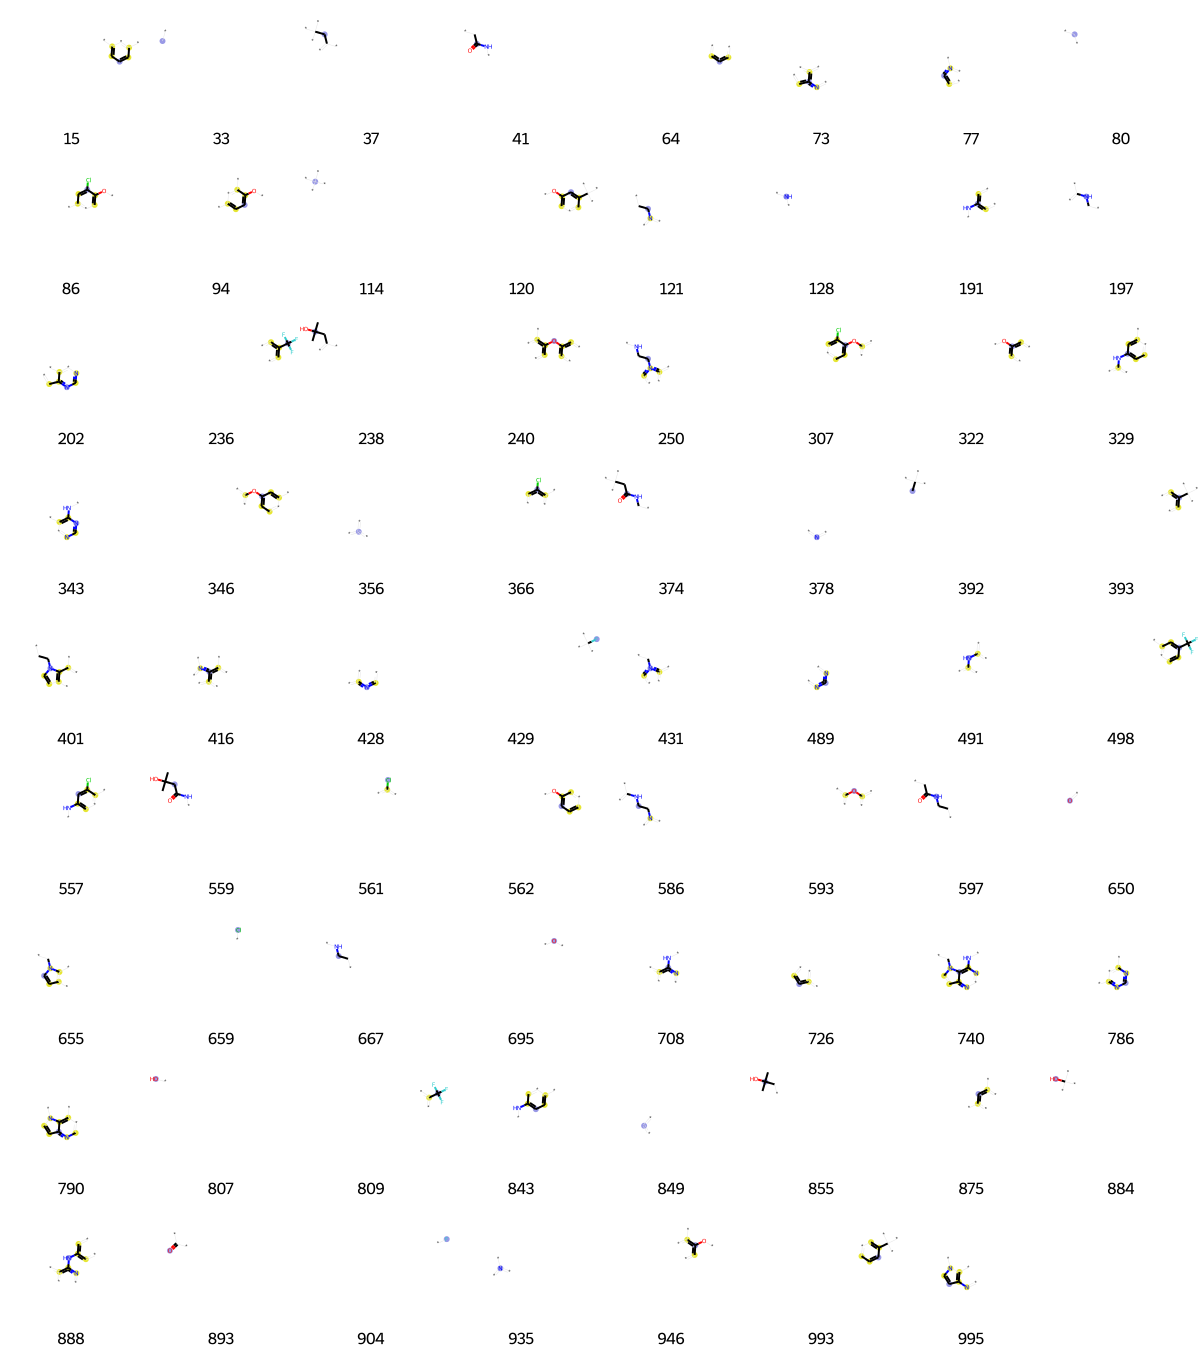

In [3994]:
prints = [(M20, x, bi) for x in fp20.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp20.GetOnBits ()])

In [3995]:
bi = {}

fp21= AllChem.GetMorganFingerprintAsBitVect(M21, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp21, fp_arr)
np.nonzero(fp_arr)
list(fp21.GetOnBits())

[33,
 64,
 86,
 90,
 102,
 130,
 147,
 148,
 173,
 175,
 179,
 233,
 239,
 249,
 250,
 328,
 351,
 356,
 361,
 378,
 389,
 428,
 431,
 456,
 472,
 480,
 487,
 497,
 506,
 511,
 512,
 521,
 547,
 565,
 616,
 650,
 695,
 698,
 726,
 806,
 807,
 817,
 825,
 841,
 849,
 854,
 855,
 879,
 893,
 926,
 932,
 935,
 942,
 946,
 960,
 961,
 967,
 985,
 986]

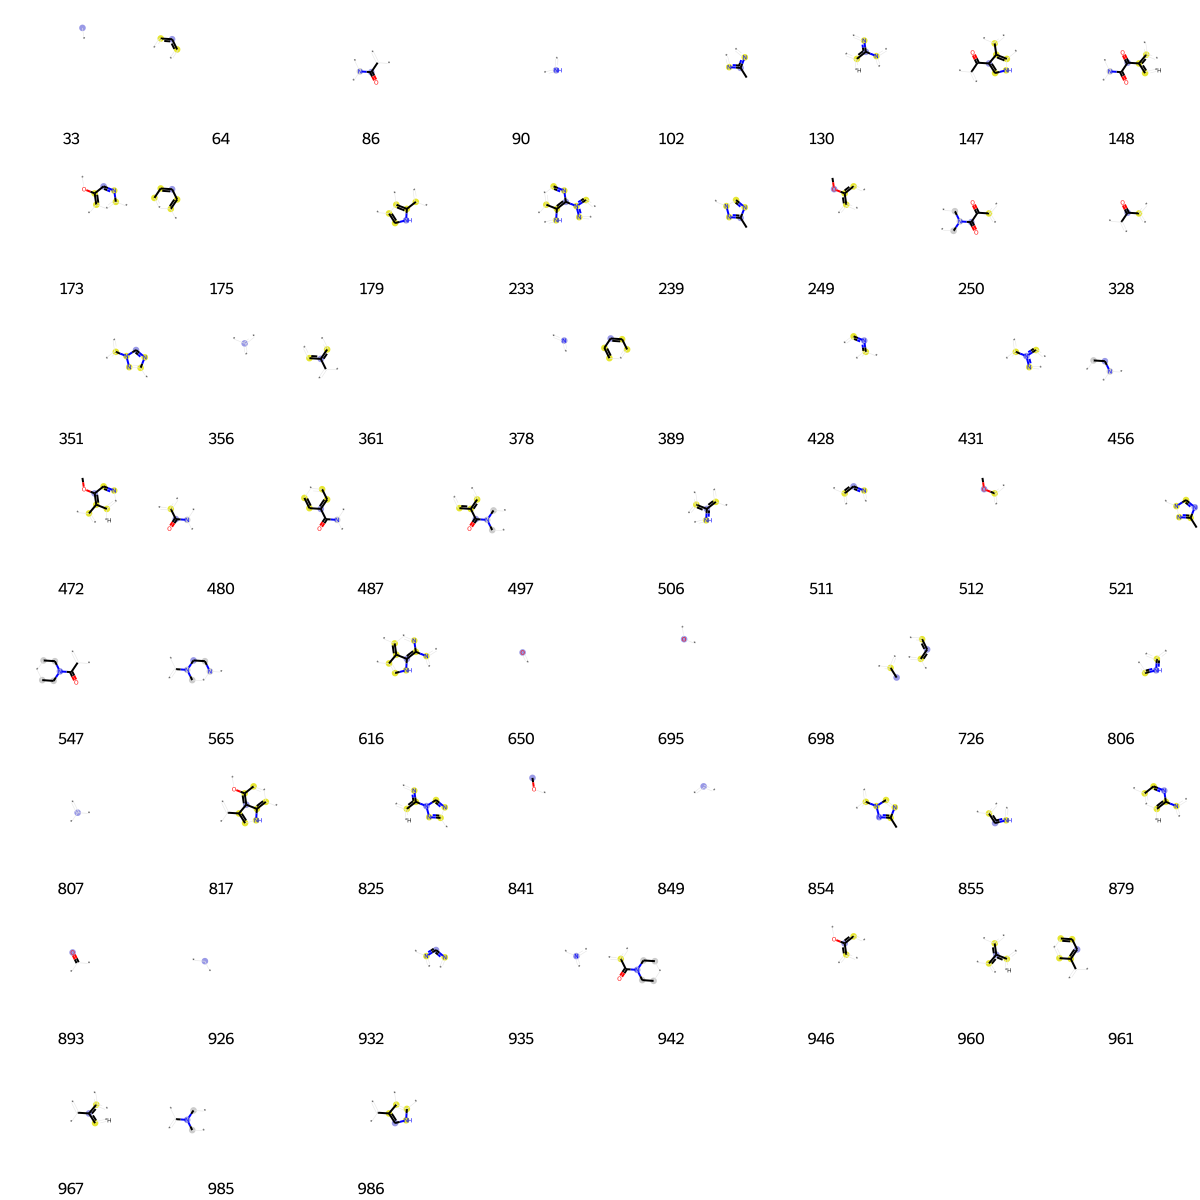

In [3996]:
prints = [(M21, x, bi) for x in fp21.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp21.GetOnBits ()])

In [3997]:
bi = {}

fp22= AllChem.GetMorganFingerprintAsBitVect(M22, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp22, fp_arr)
np.nonzero(fp_arr)
list(fp22.GetOnBits())

[19,
 58,
 64,
 80,
 121,
 128,
 198,
 296,
 314,
 323,
 352,
 356,
 378,
 381,
 392,
 410,
 413,
 417,
 428,
 448,
 452,
 456,
 458,
 512,
 516,
 523,
 556,
 561,
 571,
 650,
 656,
 659,
 667,
 714,
 717,
 726,
 767,
 825,
 842,
 849,
 926,
 935,
 950,
 984]

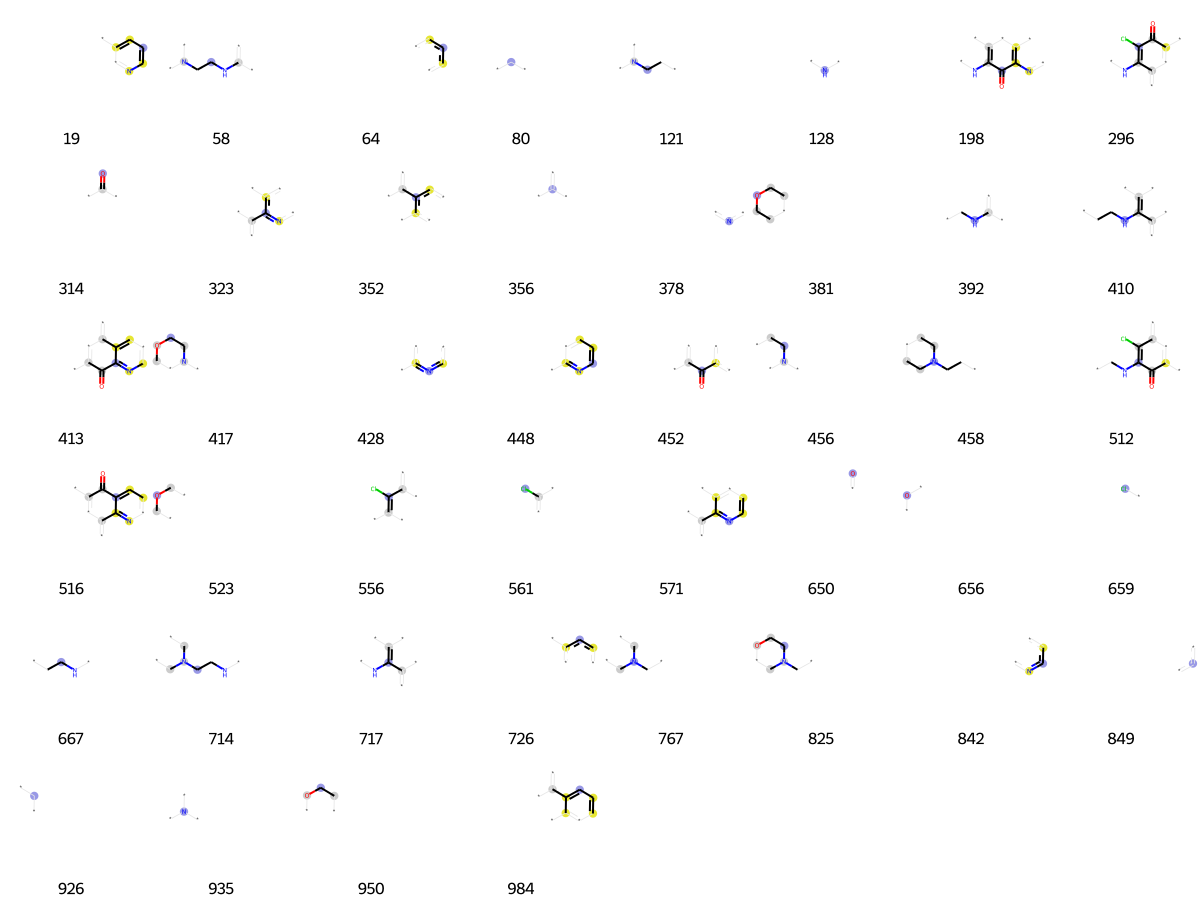

In [3998]:
prints = [(M22, x, bi) for x in fp22.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp22.GetOnBits ()])

In [3999]:
bi = {}

fp23= AllChem.GetMorganFingerprintAsBitVect(M23, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp23, fp_arr)
np.nonzero(fp_arr)
list(fp23.GetOnBits())

[79,
 80,
 91,
 128,
 147,
 184,
 191,
 214,
 216,
 283,
 289,
 343,
 350,
 356,
 378,
 392,
 415,
 436,
 452,
 486,
 490,
 493,
 518,
 535,
 537,
 544,
 568,
 583,
 602,
 607,
 636,
 650,
 656,
 667,
 699,
 708,
 725,
 726,
 728,
 792,
 798,
 807,
 816,
 833,
 843,
 849,
 870,
 875,
 904,
 906,
 948,
 1015]

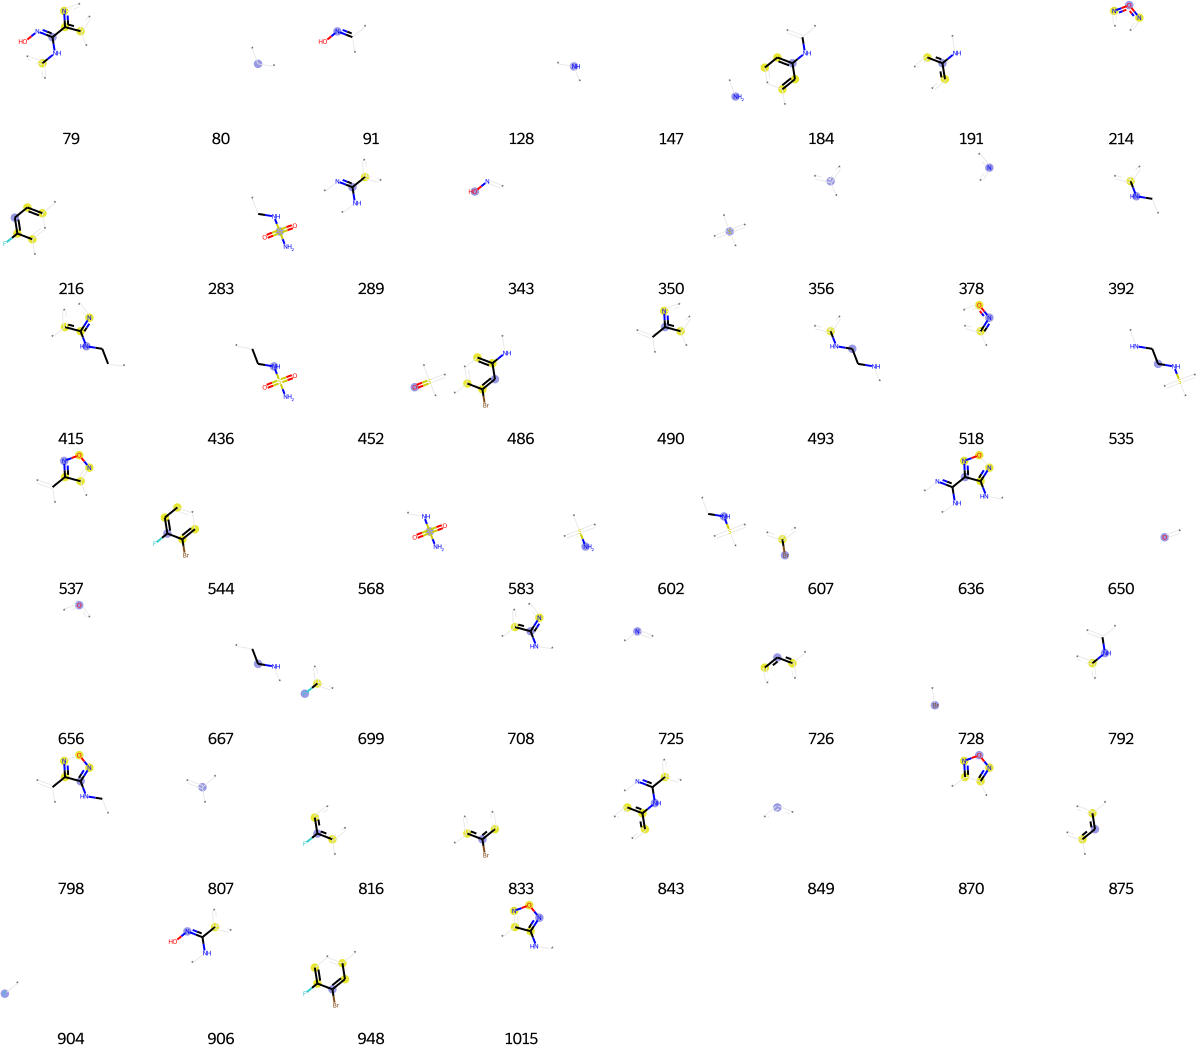

In [4000]:
prints = [(M23, x, bi) for x in fp23.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp23.GetOnBits ()])

In [4001]:
bi = {}

fp24= AllChem.GetMorganFingerprintAsBitVect(M24, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp24, fp_arr)
np.nonzero(fp_arr)
list(fp24.GetOnBits())

[33,
 45,
 64,
 89,
 90,
 121,
 128,
 175,
 200,
 235,
 249,
 271,
 284,
 285,
 305,
 314,
 356,
 376,
 386,
 400,
 423,
 437,
 456,
 470,
 479,
 486,
 512,
 564,
 641,
 649,
 650,
 684,
 695,
 726,
 734,
 769,
 771,
 792,
 804,
 807,
 841,
 847,
 849,
 875,
 893,
 926,
 927,
 935,
 946,
 947,
 967,
 974,
 996,
 1019]

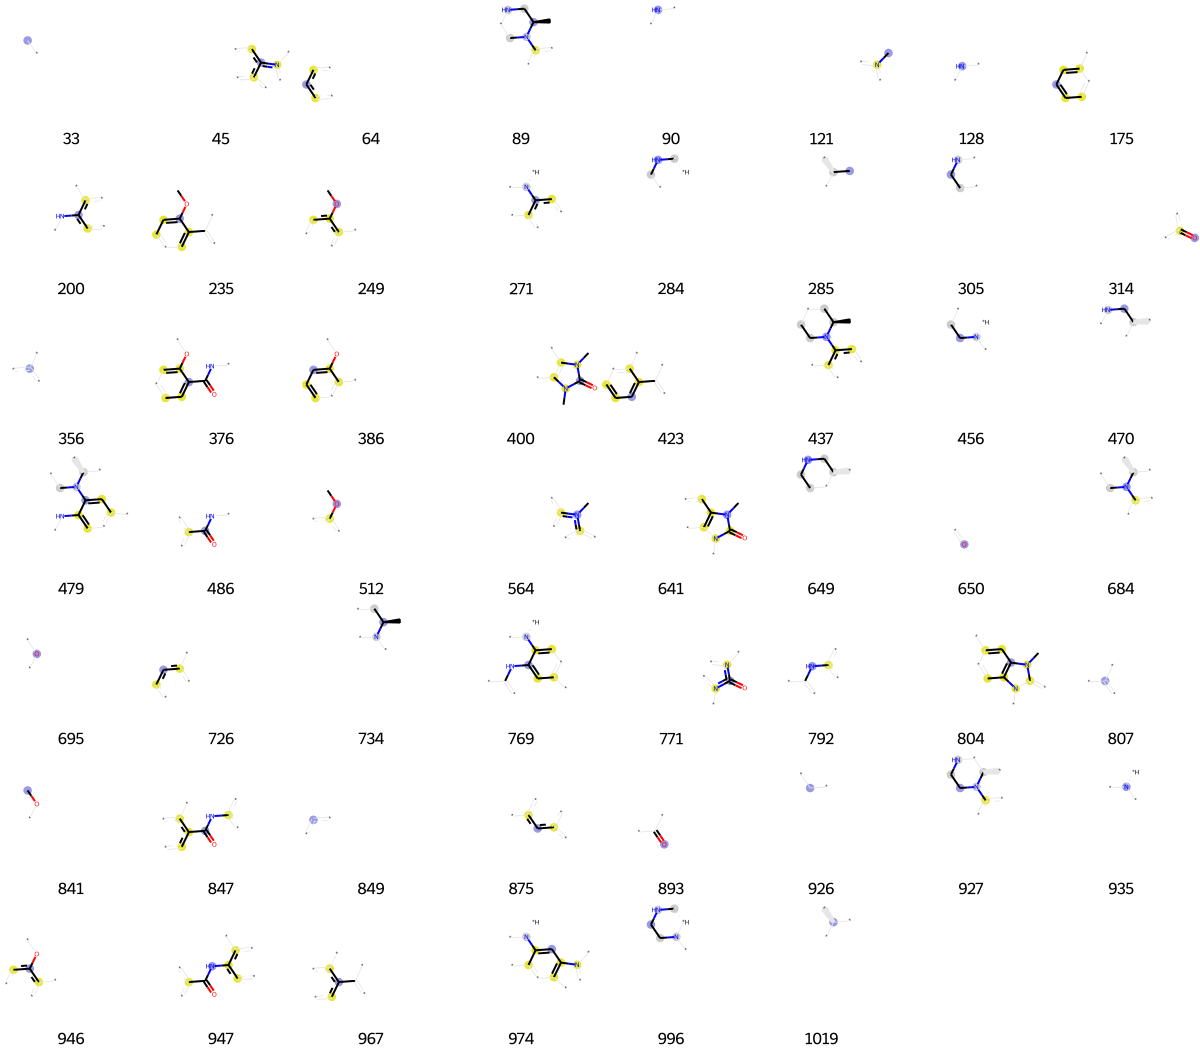

In [4002]:
prints = [(M24, x, bi) for x in fp24.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp24.GetOnBits ()])

In [4003]:
bi = {}

fp25= AllChem.GetMorganFingerprintAsBitVect(M25, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp25, fp_arr)
np.nonzero(fp_arr)
list(fp25.GetOnBits())

[33,
 34,
 74,
 80,
 90,
 92,
 94,
 133,
 134,
 214,
 219,
 235,
 237,
 268,
 294,
 310,
 314,
 318,
 319,
 350,
 352,
 356,
 357,
 366,
 378,
 389,
 410,
 416,
 425,
 428,
 437,
 452,
 456,
 507,
 517,
 564,
 585,
 639,
 650,
 695,
 698,
 702,
 705,
 715,
 726,
 730,
 757,
 767,
 786,
 794,
 800,
 831,
 849,
 865,
 875,
 926,
 935,
 946,
 977,
 1018]

In [4004]:
bi = {}

fp26= AllChem.GetMorganFingerprintAsBitVect(M26, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp26, fp_arr)
np.nonzero(fp_arr)
list(fp26.GetOnBits())

[10,
 13,
 33,
 36,
 48,
 64,
 77,
 80,
 90,
 102,
 131,
 139,
 175,
 252,
 310,
 314,
 322,
 356,
 360,
 378,
 384,
 419,
 424,
 428,
 432,
 448,
 458,
 495,
 510,
 520,
 620,
 650,
 674,
 675,
 695,
 718,
 726,
 730,
 807,
 815,
 816,
 842,
 849,
 881,
 894,
 927,
 987,
 1019]

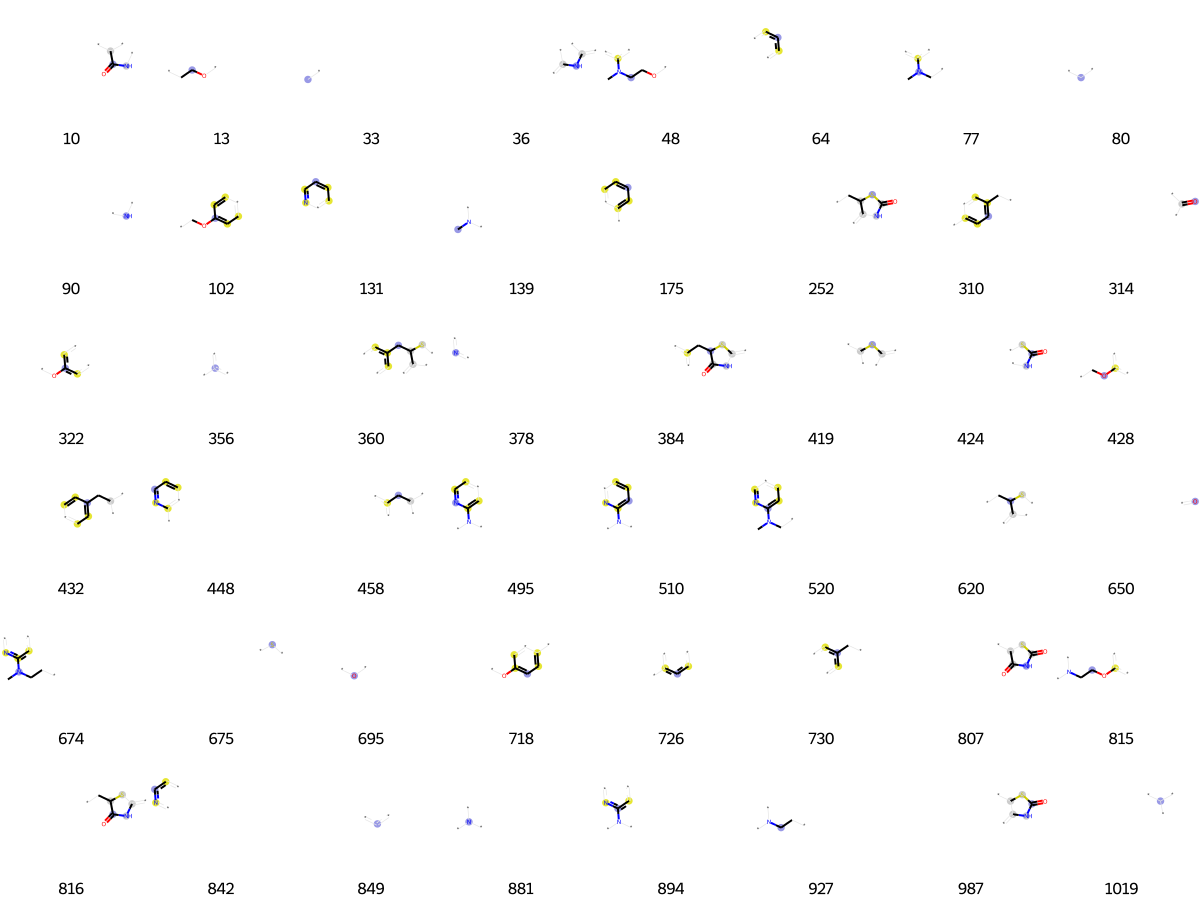

In [4005]:
prints = [(M26, x, bi) for x in fp26.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp26.GetOnBits ()])

In [4006]:
bi = {}

fp27= AllChem.GetMorganFingerprintAsBitVect(M27, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp27, fp_arr)
np.nonzero(fp_arr)
list(fp27.GetOnBits())

[1,
 13,
 21,
 42,
 64,
 74,
 80,
 121,
 175,
 219,
 302,
 316,
 341,
 356,
 389,
 430,
 456,
 458,
 533,
 557,
 653,
 695,
 726,
 730,
 741,
 767,
 819,
 849,
 887,
 908,
 926,
 935,
 978]

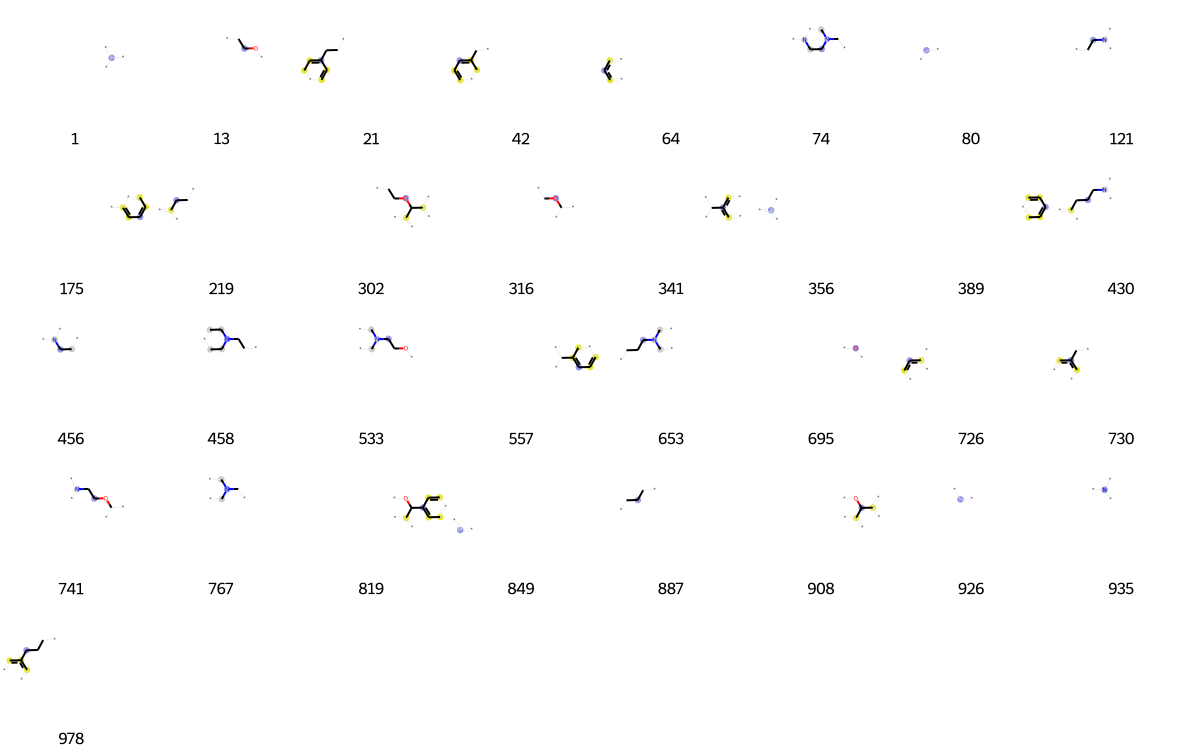

In [4007]:
prints = [(M27, x, bi) for x in fp27.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp27.GetOnBits ()])

In [4008]:
bi = {}

fp28= AllChem.GetMorganFingerprintAsBitVect(M28, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp28, fp_arr)
np.nonzero(fp_arr)
list(fp28.GetOnBits())

[9,
 33,
 36,
 43,
 45,
 64,
 72,
 80,
 90,
 139,
 175,
 231,
 248,
 261,
 301,
 303,
 314,
 333,
 352,
 356,
 367,
 413,
 452,
 456,
 458,
 464,
 514,
 549,
 566,
 570,
 581,
 633,
 650,
 652,
 656,
 662,
 726,
 802,
 834,
 838,
 849,
 881,
 909,
 926,
 935,
 950,
 1019]

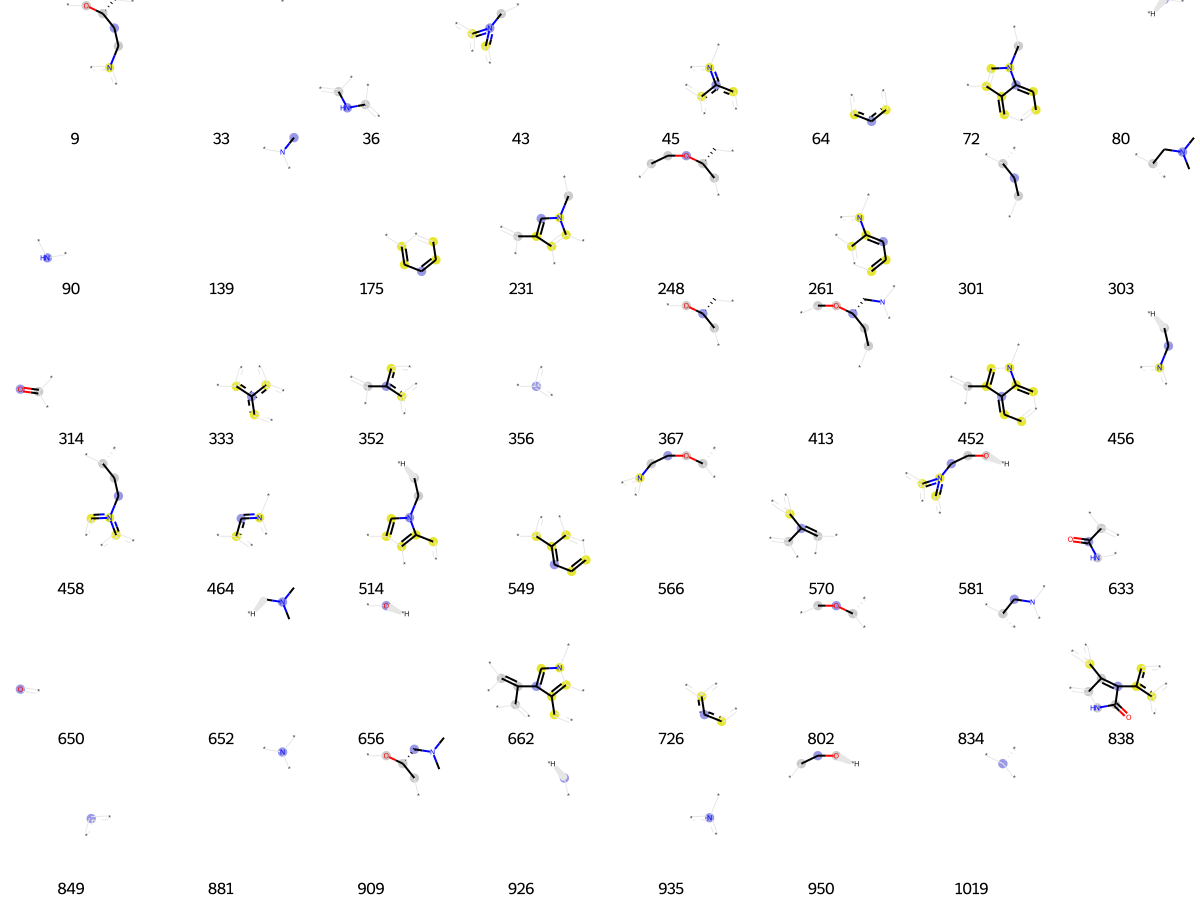

In [4009]:
prints = [(M28, x, bi) for x in fp28.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp28.GetOnBits ()])

In [4010]:
bi = {}

fp29= AllChem.GetMorganFingerprintAsBitVect(M29, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp29, fp_arr)
np.nonzero(fp_arr)
list(fp29.GetOnBits())

[4,
 18,
 33,
 72,
 76,
 80,
 90,
 114,
 116,
 123,
 134,
 136,
 174,
 214,
 236,
 251,
 259,
 288,
 294,
 310,
 314,
 341,
 356,
 361,
 367,
 378,
 383,
 386,
 393,
 398,
 407,
 415,
 418,
 429,
 463,
 507,
 515,
 587,
 605,
 620,
 623,
 631,
 641,
 646,
 650,
 699,
 714,
 726,
 730,
 738,
 747,
 762,
 802,
 807,
 809,
 831,
 849,
 881,
 890,
 892,
 893,
 896,
 904,
 926,
 927,
 932,
 935,
 940,
 957,
 978]

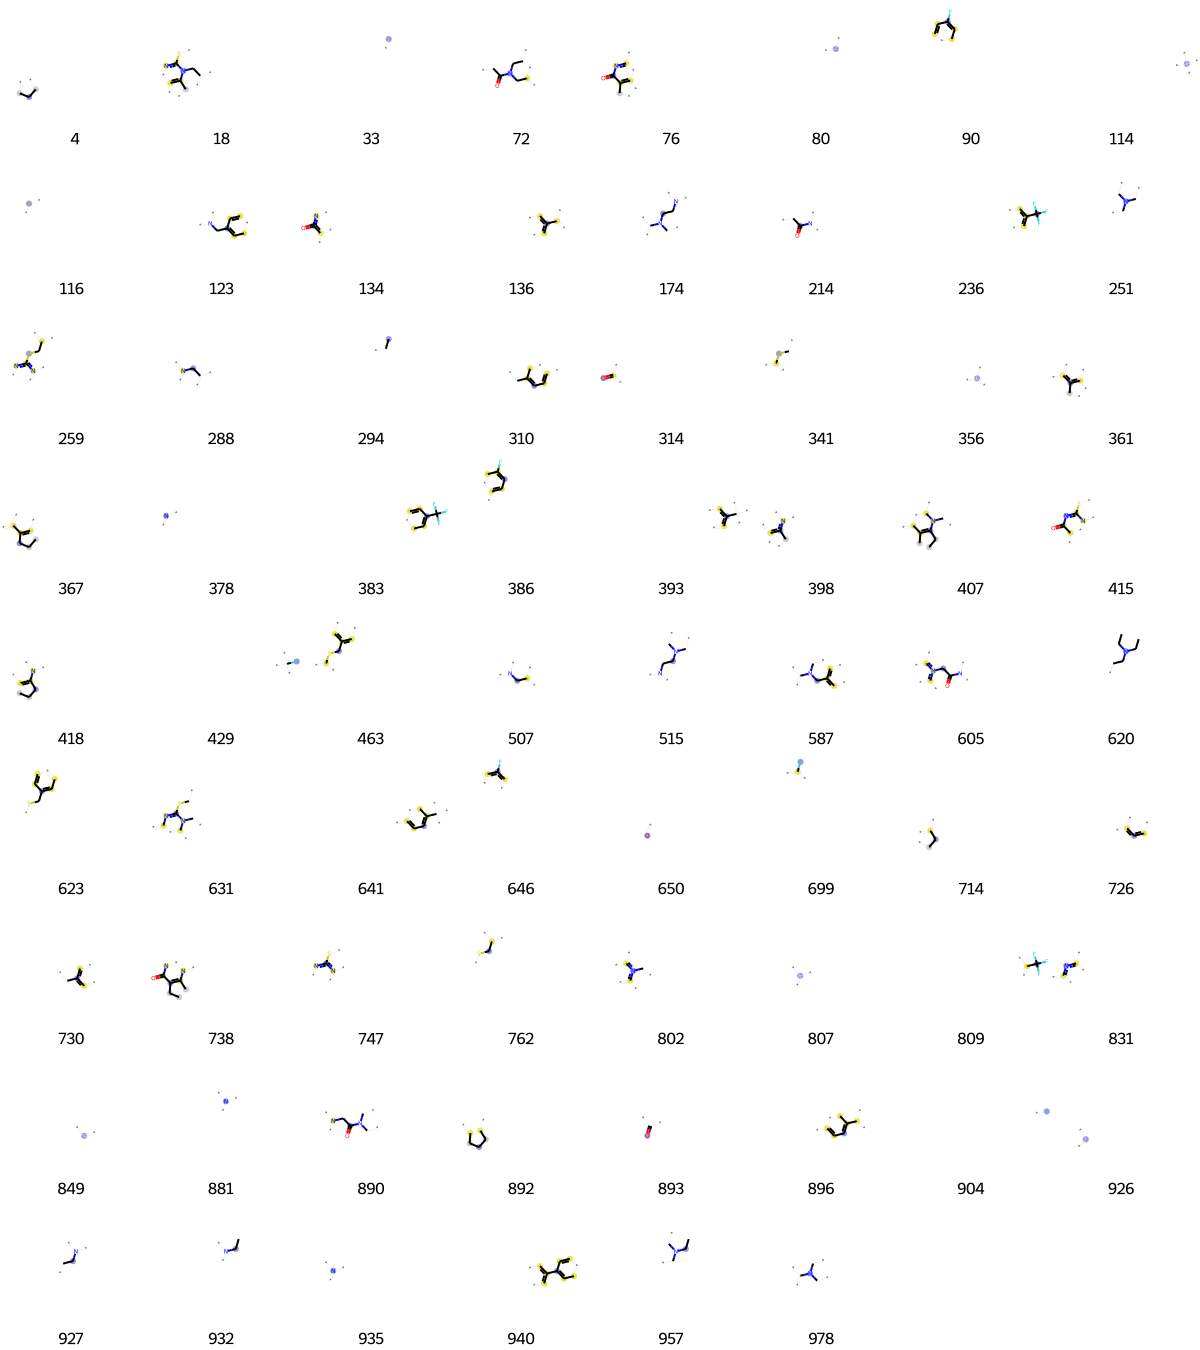

In [4011]:
prints = [(M29, x, bi) for x in fp29.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp29.GetOnBits ()])

In [4012]:
bi = {}

fp30= AllChem.GetMorganFingerprintAsBitVect(M30, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp30, fp_arr)
np.nonzero(fp_arr)
list(fp30.GetOnBits())

[4,
 39,
 53,
 56,
 64,
 128,
 136,
 175,
 191,
 209,
 211,
 285,
 301,
 356,
 361,
 389,
 407,
 497,
 612,
 619,
 650,
 673,
 703,
 726,
 755,
 792,
 807,
 843,
 849,
 893,
 896,
 905,
 926,
 940,
 965,
 966,
 1019]

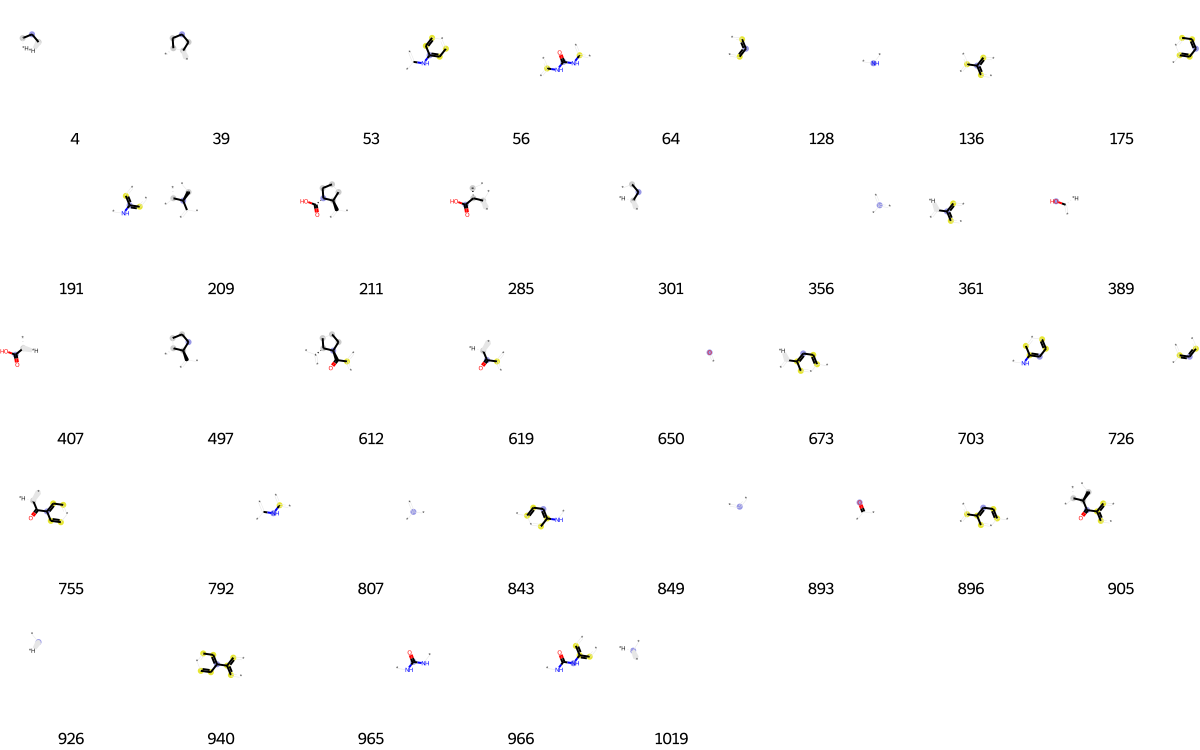

In [4013]:
prints = [(M30, x, bi) for x in fp30.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp30.GetOnBits ()])

In [4014]:
bi = {}

fp31= AllChem.GetMorganFingerprintAsBitVect(M31, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp31, fp_arr)
np.nonzero(fp_arr)
list(fp31.GetOnBits())

[1,
 33,
 74,
 80,
 84,
 108,
 130,
 131,
 136,
 147,
 162,
 174,
 184,
 201,
 227,
 252,
 278,
 283,
 320,
 329,
 333,
 352,
 356,
 361,
 378,
 381,
 394,
 396,
 407,
 409,
 417,
 428,
 430,
 433,
 448,
 456,
 463,
 511,
 523,
 552,
 565,
 604,
 641,
 650,
 656,
 675,
 698,
 700,
 703,
 740,
 741,
 767,
 784,
 807,
 831,
 849,
 893,
 926,
 935,
 950,
 985,
 1004,
 1014]

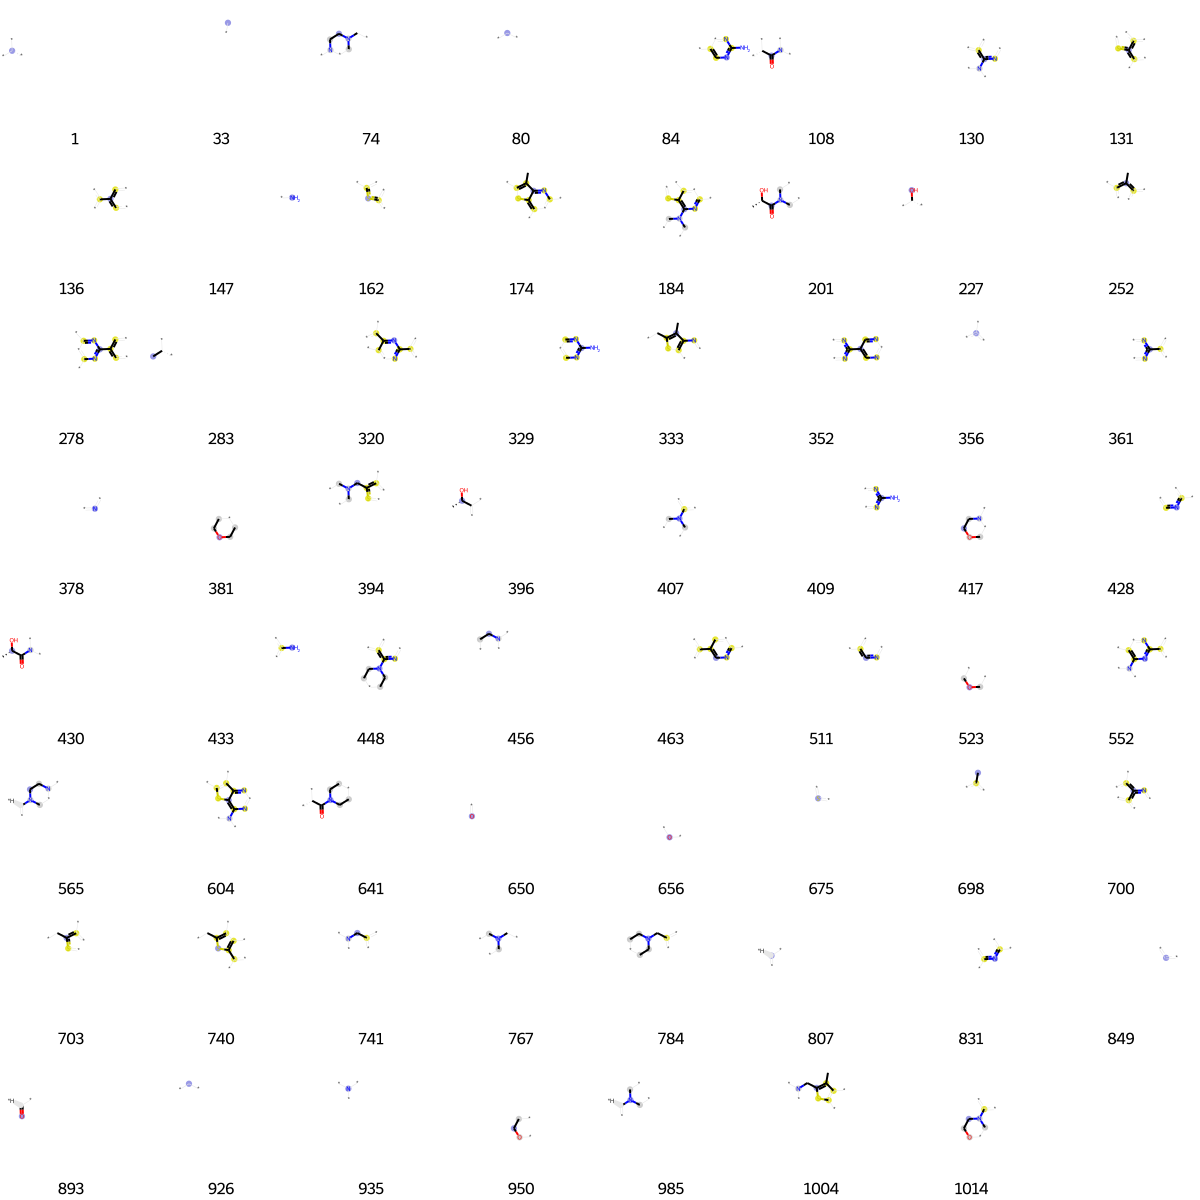

In [4015]:
prints = [(M31, x, bi) for x in fp31.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp31.GetOnBits ()])

In [4016]:
bi = {}

fp32= AllChem.GetMorganFingerprintAsBitVect(M32, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp32, fp_arr)
np.nonzero(fp_arr)
list(fp32.GetOnBits())

[11,
 33,
 36,
 61,
 80,
 102,
 119,
 129,
 130,
 183,
 222,
 243,
 250,
 272,
 285,
 294,
 314,
 324,
 356,
 362,
 375,
 384,
 412,
 420,
 540,
 541,
 554,
 591,
 597,
 642,
 646,
 650,
 682,
 695,
 696,
 698,
 706,
 733,
 737,
 744,
 763,
 764,
 794,
 807,
 822,
 837,
 849,
 856,
 862,
 863,
 874,
 885,
 887,
 893,
 918,
 926,
 932,
 940,
 947,
 951,
 967,
 987,
 999,
 1014,
 1017,
 1019]

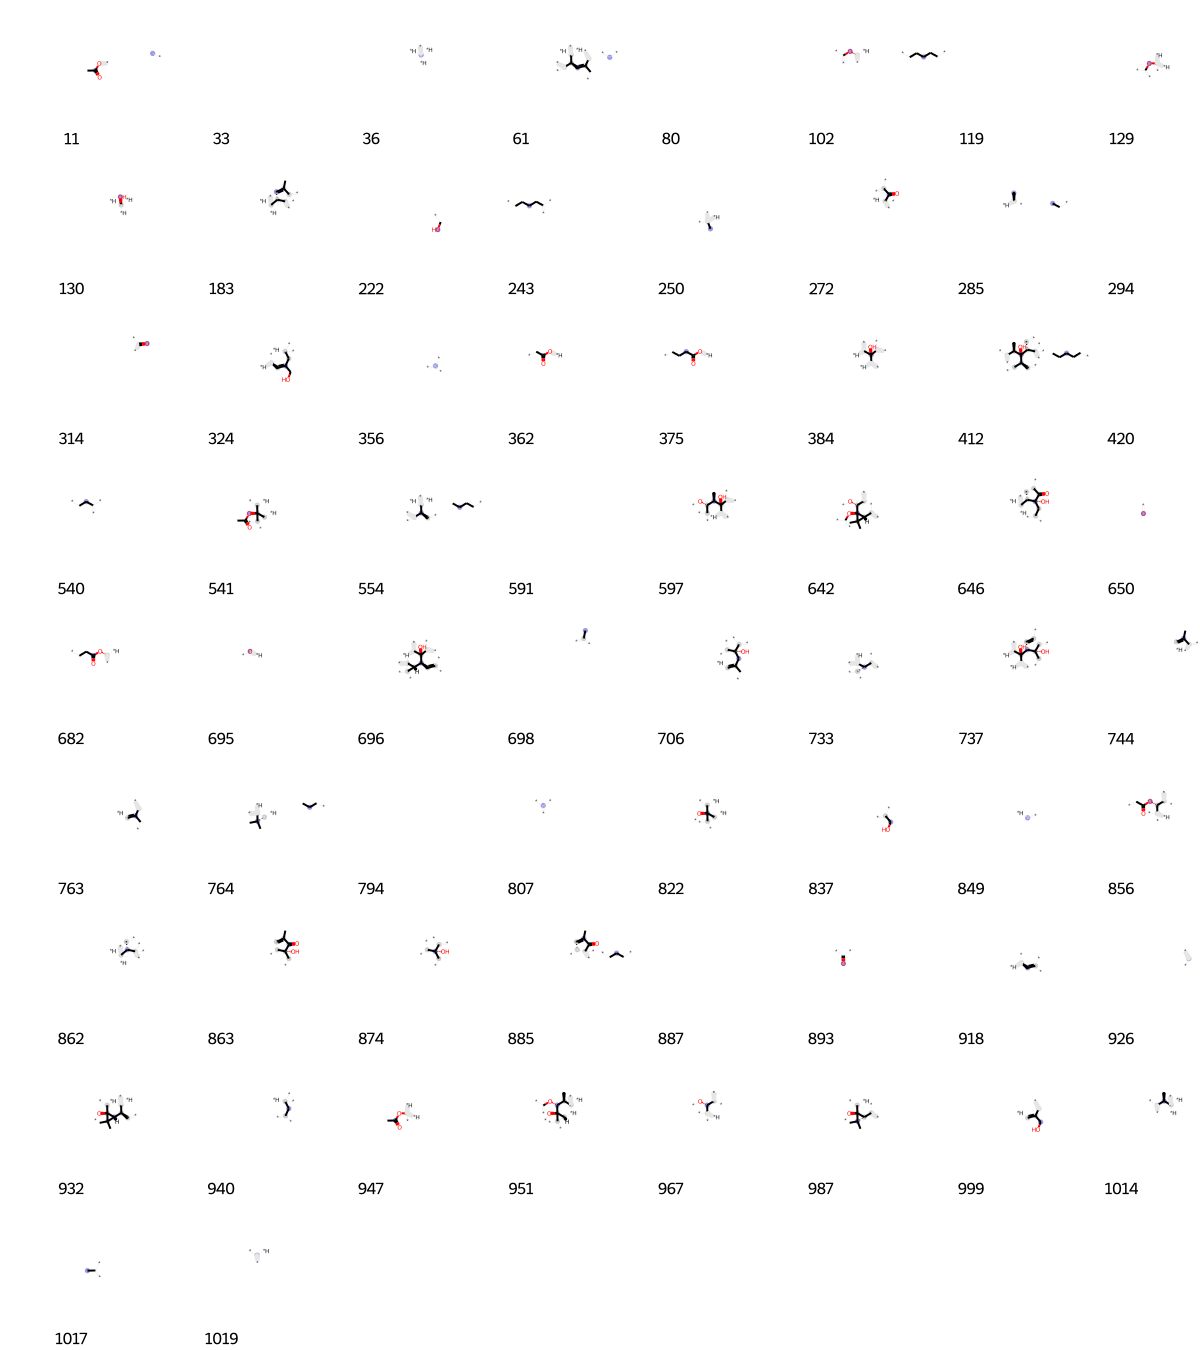

In [4017]:
prints = [(M32, x, bi) for x in fp32.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp32.GetOnBits ()])

In [4018]:
bi = {}

fp33= AllChem.GetMorganFingerprintAsBitVect(M33, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp33, fp_arr)
np.nonzero(fp_arr)
list(fp33.GetOnBits())

[1,
 14,
 33,
 43,
 45,
 80,
 90,
 121,
 123,
 128,
 136,
 151,
 157,
 197,
 207,
 212,
 217,
 219,
 231,
 242,
 244,
 255,
 259,
 267,
 283,
 285,
 293,
 294,
 314,
 315,
 325,
 333,
 346,
 356,
 378,
 379,
 407,
 428,
 456,
 463,
 484,
 486,
 511,
 527,
 593,
 634,
 635,
 650,
 672,
 698,
 702,
 721,
 726,
 750,
 794,
 799,
 804,
 807,
 813,
 831,
 834,
 845,
 849,
 875,
 893,
 896,
 916,
 926,
 935,
 967,
 980,
 1005,
 1010,
 1023]

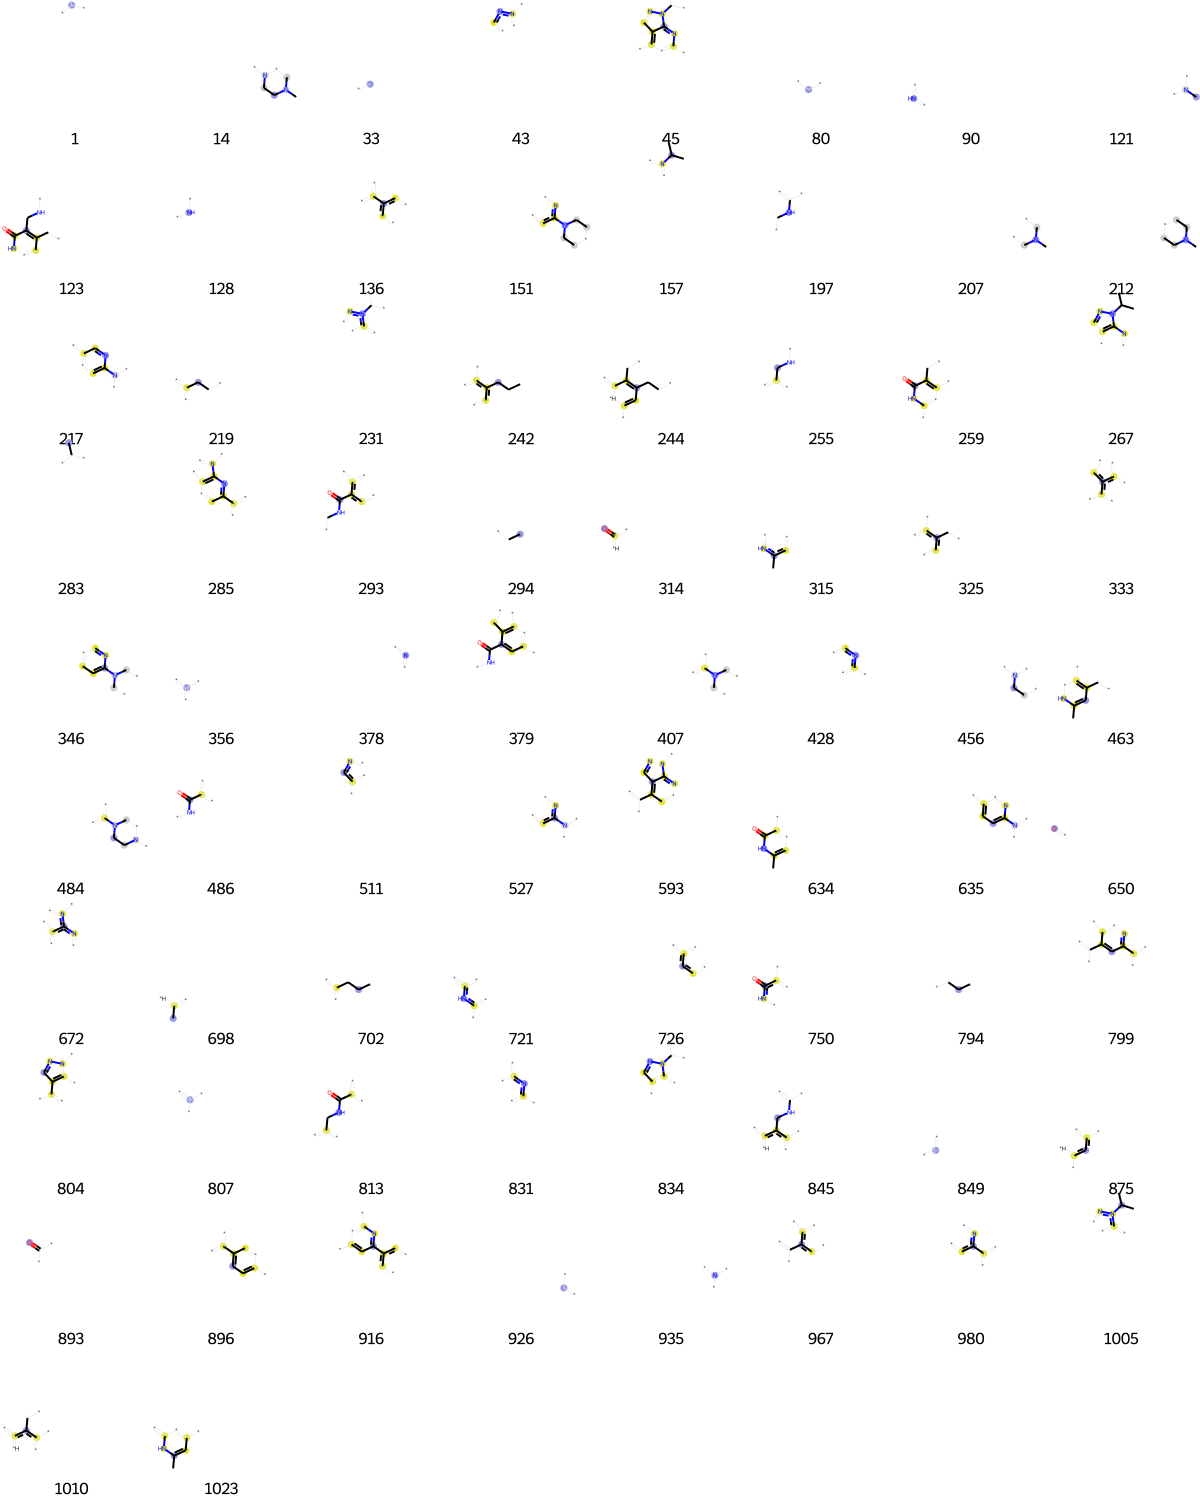

In [4019]:
prints = [(M33, x, bi) for x in fp33.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp33.GetOnBits ()])

In [4020]:
bi = {}

fp34= AllChem.GetMorganFingerprintAsBitVect(M34, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp34, fp_arr)
np.nonzero(fp_arr)
list(fp34.GetOnBits())

[15,
 33,
 53,
 56,
 64,
 72,
 111,
 114,
 125,
 128,
 139,
 144,
 145,
 147,
 173,
 191,
 317,
 319,
 322,
 329,
 350,
 356,
 378,
 385,
 400,
 428,
 429,
 452,
 458,
 491,
 548,
 558,
 562,
 575,
 576,
 583,
 650,
 680,
 695,
 703,
 718,
 726,
 787,
 792,
 795,
 807,
 831,
 833,
 842,
 843,
 849,
 875,
 881,
 893,
 894,
 904,
 933,
 960,
 965,
 966]

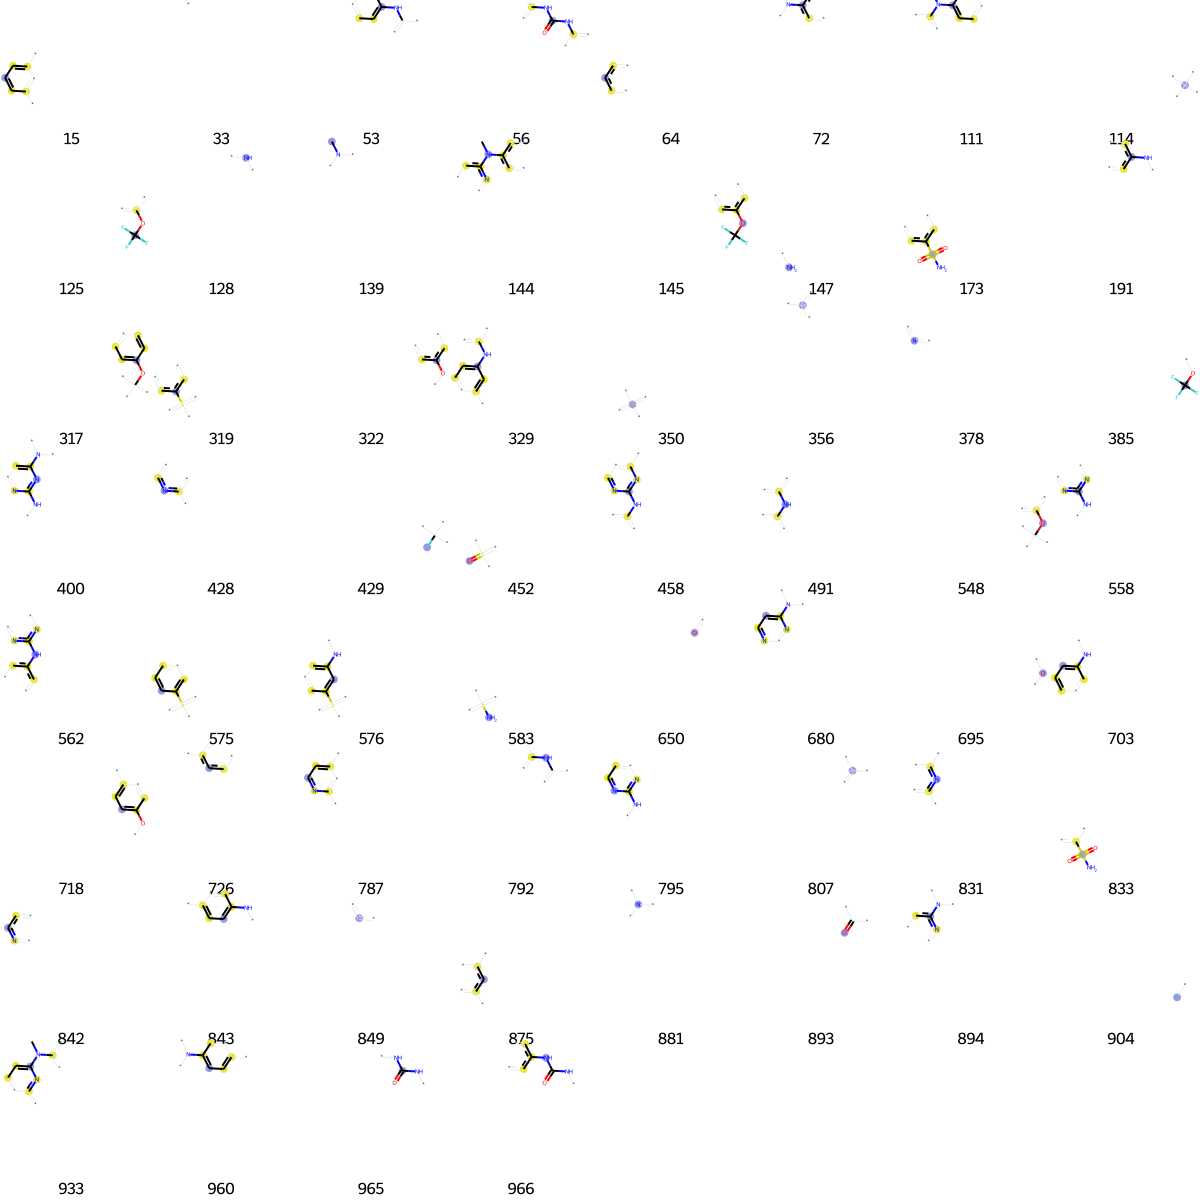

In [4021]:
prints = [(M34, x, bi) for x in fp34.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp34.GetOnBits ()])

In [4022]:
bi = {}

fp35= AllChem.GetMorganFingerprintAsBitVect(M35, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp35, fp_arr)
np.nonzero(fp_arr)
list(fp35.GetOnBits())

[0,
 4,
 29,
 33,
 42,
 64,
 73,
 80,
 92,
 121,
 147,
 151,
 158,
 175,
 182,
 190,
 197,
 289,
 298,
 301,
 314,
 333,
 341,
 351,
 356,
 378,
 389,
 407,
 416,
 419,
 446,
 456,
 484,
 487,
 501,
 504,
 517,
 549,
 564,
 611,
 612,
 618,
 650,
 657,
 672,
 674,
 680,
 698,
 726,
 739,
 740,
 741,
 771,
 802,
 808,
 831,
 838,
 849,
 855,
 862,
 883,
 888,
 926,
 935,
 976,
 1019]

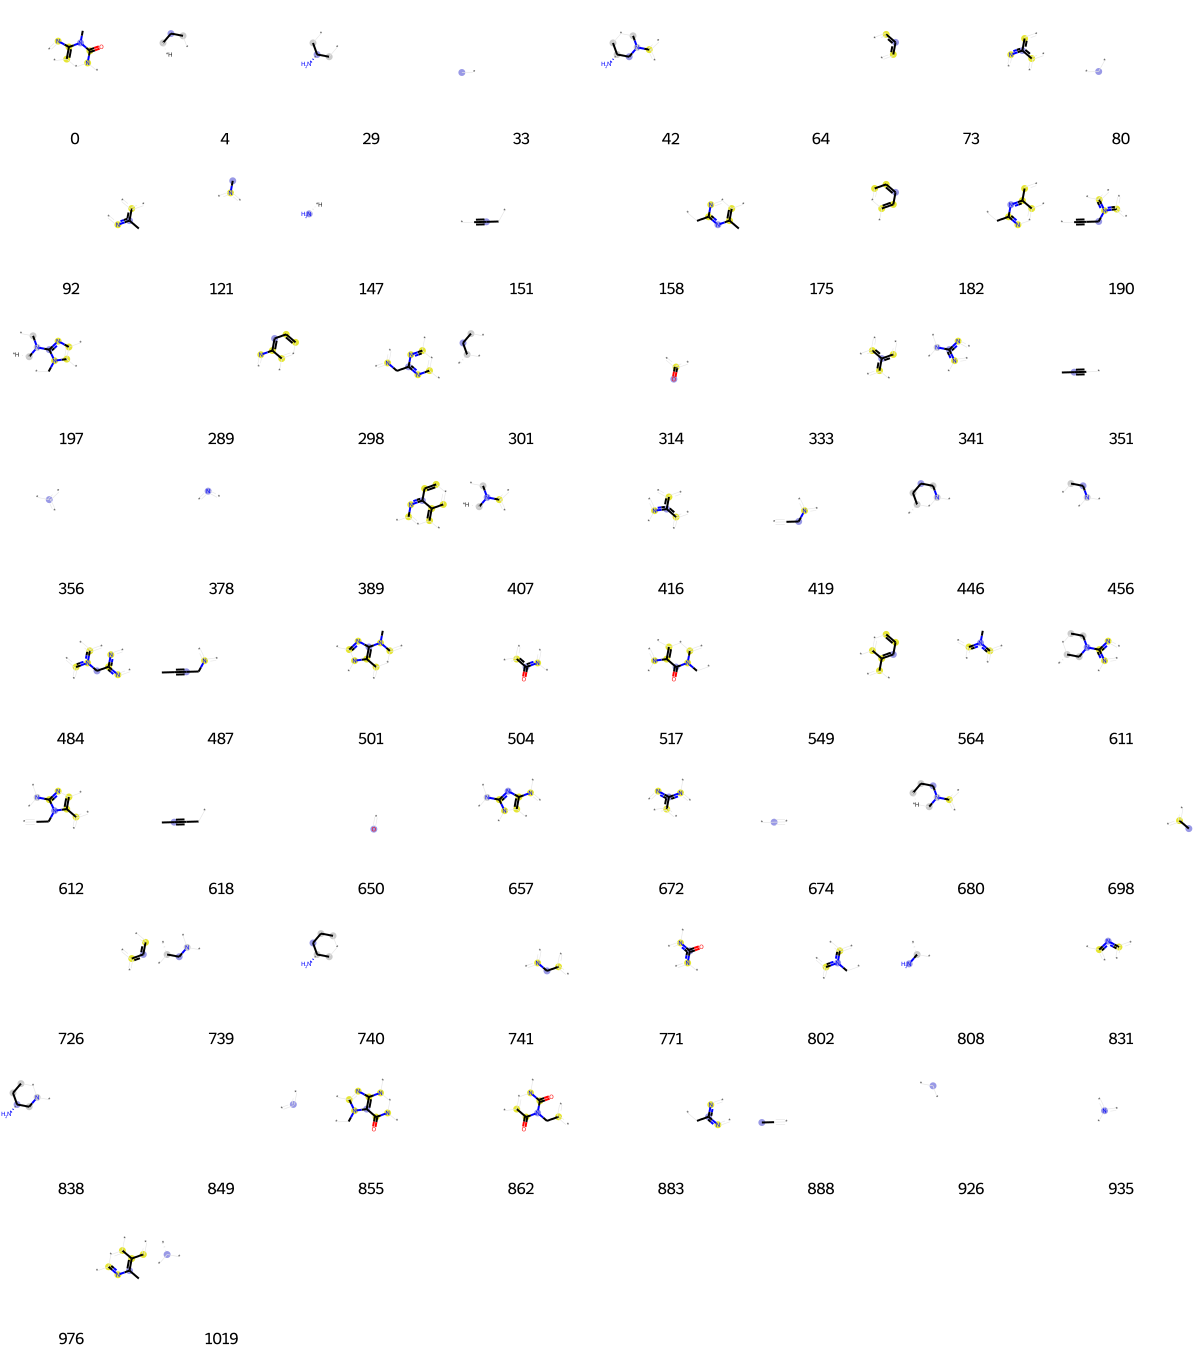

In [4023]:
prints = [(M35, x, bi) for x in fp35.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp35.GetOnBits ()])

In [4024]:
bi = {}

fp36= AllChem.GetMorganFingerprintAsBitVect(M36, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp36, fp_arr)
np.nonzero(fp_arr)
list(fp36.GetOnBits())

[14,
 15,
 42,
 62,
 64,
 80,
 90,
 112,
 116,
 206,
 209,
 213,
 241,
 255,
 286,
 314,
 318,
 323,
 325,
 341,
 356,
 358,
 360,
 378,
 383,
 389,
 445,
 463,
 543,
 554,
 590,
 613,
 650,
 674,
 675,
 713,
 721,
 726,
 730,
 738,
 750,
 762,
 790,
 792,
 798,
 807,
 831,
 849,
 875,
 893,
 914,
 938,
 946,
 954]

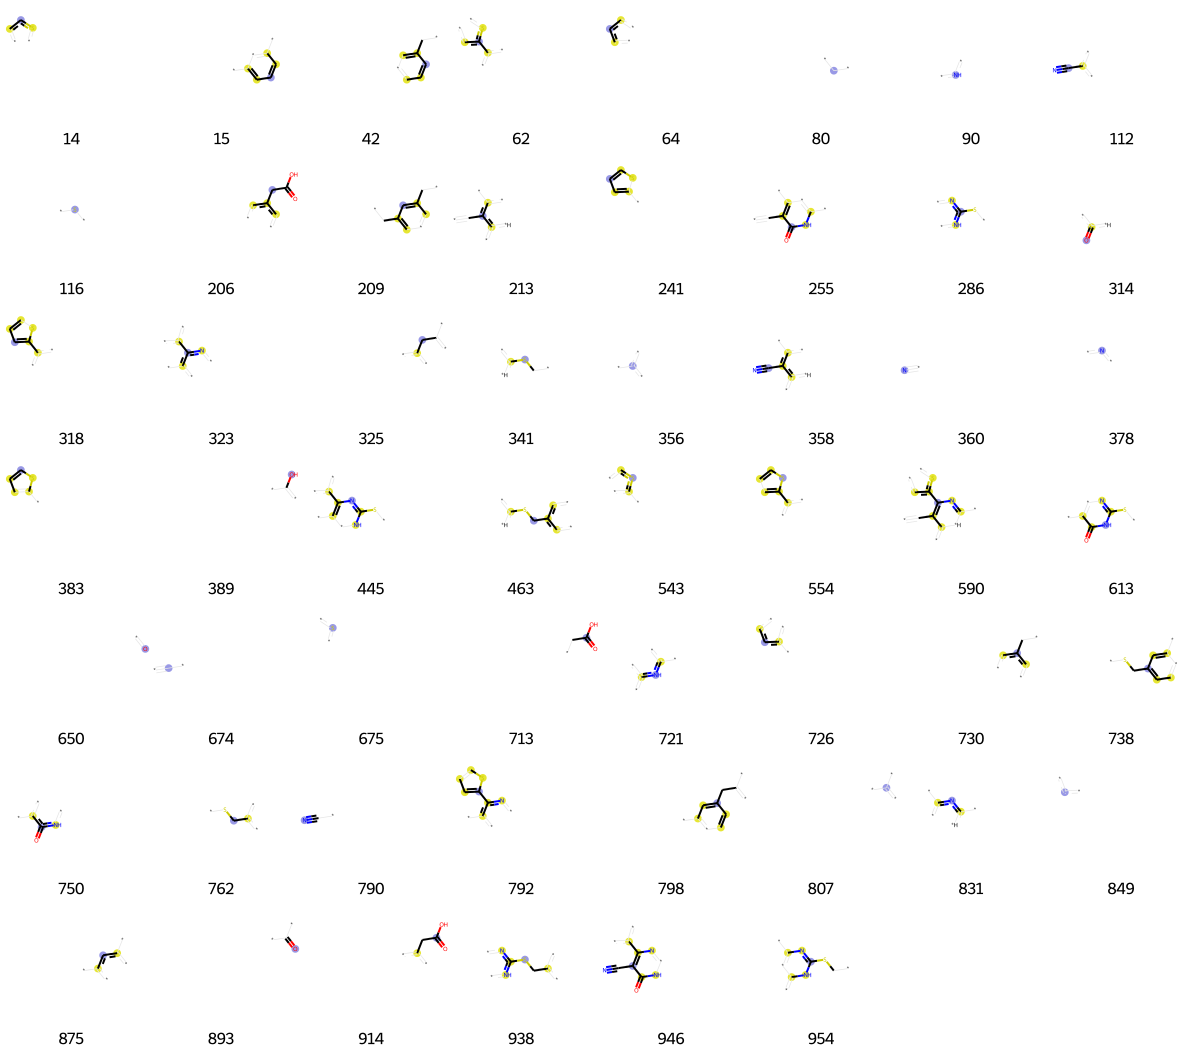

In [4025]:
prints = [(M36, x, bi) for x in fp36.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp36.GetOnBits ()])

In [4026]:
bi = {}

fp37= AllChem.GetMorganFingerprintAsBitVect(M37, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp37, fp_arr)
np.nonzero(fp_arr)
list(fp37.GetOnBits())

[4,
 7,
 10,
 13,
 24,
 33,
 45,
 76,
 80,
 94,
 121,
 128,
 139,
 140,
 198,
 200,
 221,
 225,
 240,
 246,
 249,
 294,
 314,
 319,
 322,
 350,
 356,
 360,
 400,
 428,
 452,
 502,
 512,
 564,
 593,
 628,
 630,
 641,
 645,
 650,
 652,
 693,
 695,
 715,
 726,
 766,
 771,
 794,
 804,
 841,
 848,
 849,
 870,
 875,
 881,
 887,
 927,
 935,
 946,
 951]

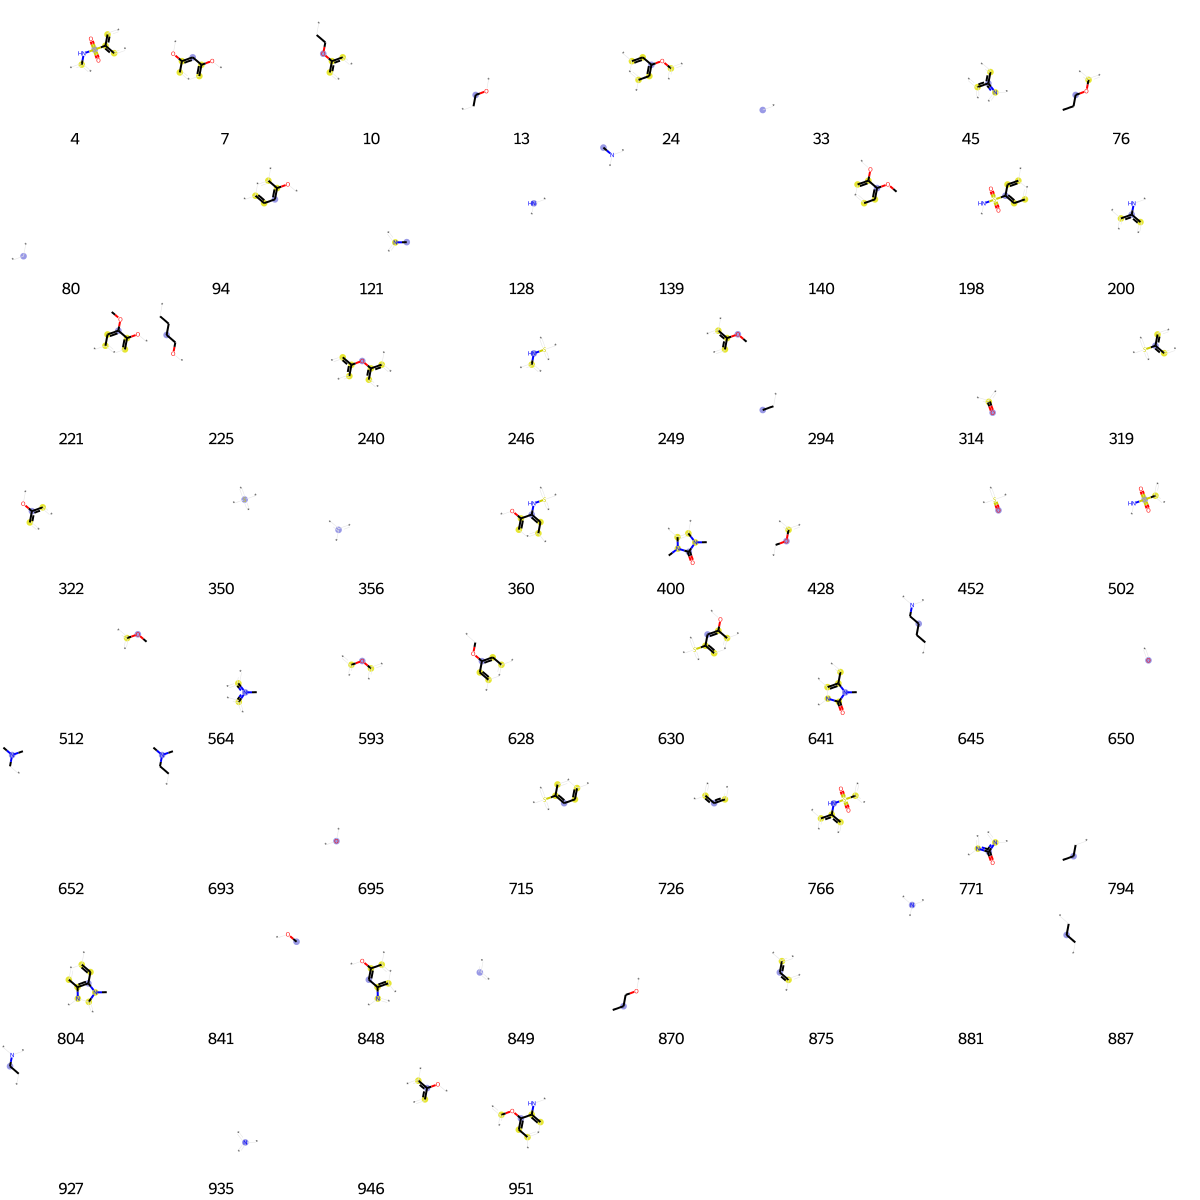

In [4027]:
prints = [(M37, x, bi) for x in fp37.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp37.GetOnBits ()])

In [4028]:
bi = {}

fp38= AllChem.GetMorganFingerprintAsBitVect(M38, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp38, fp_arr)
np.nonzero(fp_arr)
list(fp38.GetOnBits())

[33,
 114,
 202,
 208,
 277,
 315,
 322,
 356,
 360,
 391,
 392,
 419,
 431,
 468,
 529,
 563,
 578,
 607,
 674,
 694,
 722,
 728,
 744,
 790,
 803,
 807,
 833,
 849,
 875,
 985,
 1000,
 1009]

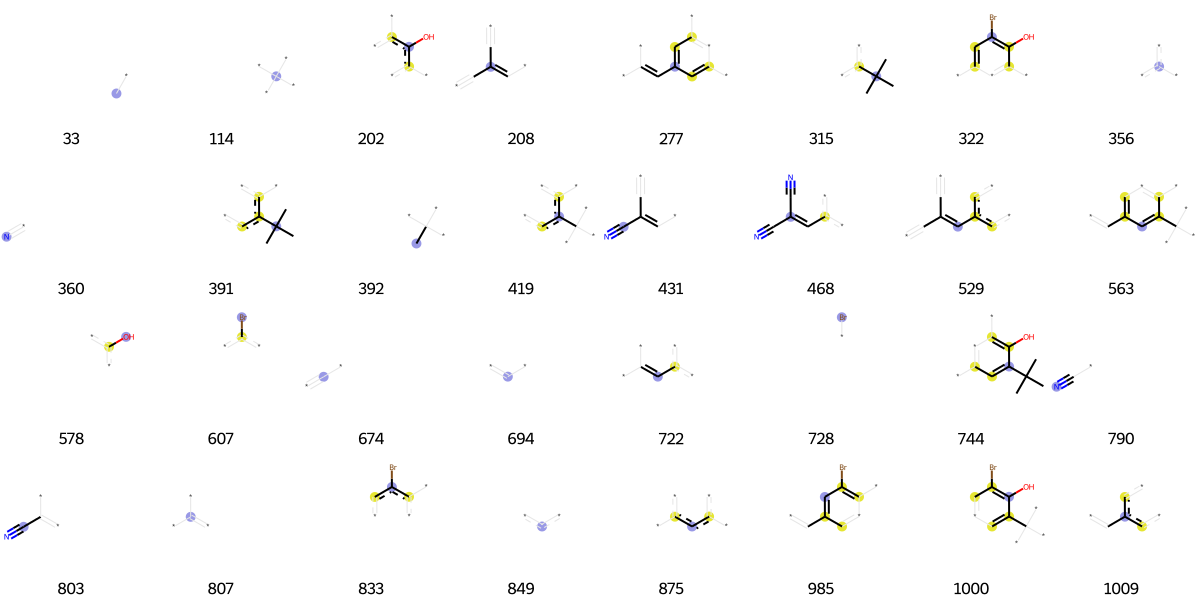

In [4029]:
prints = [(M38, x, bi) for x in fp38.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp38.GetOnBits ()])

In [4030]:
bi = {}

fp39= AllChem.GetMorganFingerprintAsBitVect(M39, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp39, fp_arr)
np.nonzero(fp_arr)
list(fp3.GetOnBits())

[64,
 80,
 91,
 112,
 128,
 147,
 164,
 171,
 175,
 200,
 354,
 356,
 392,
 493,
 650,
 667,
 672,
 715,
 716,
 726,
 753,
 777,
 816,
 838,
 849,
 887,
 899,
 939,
 948,
 981]

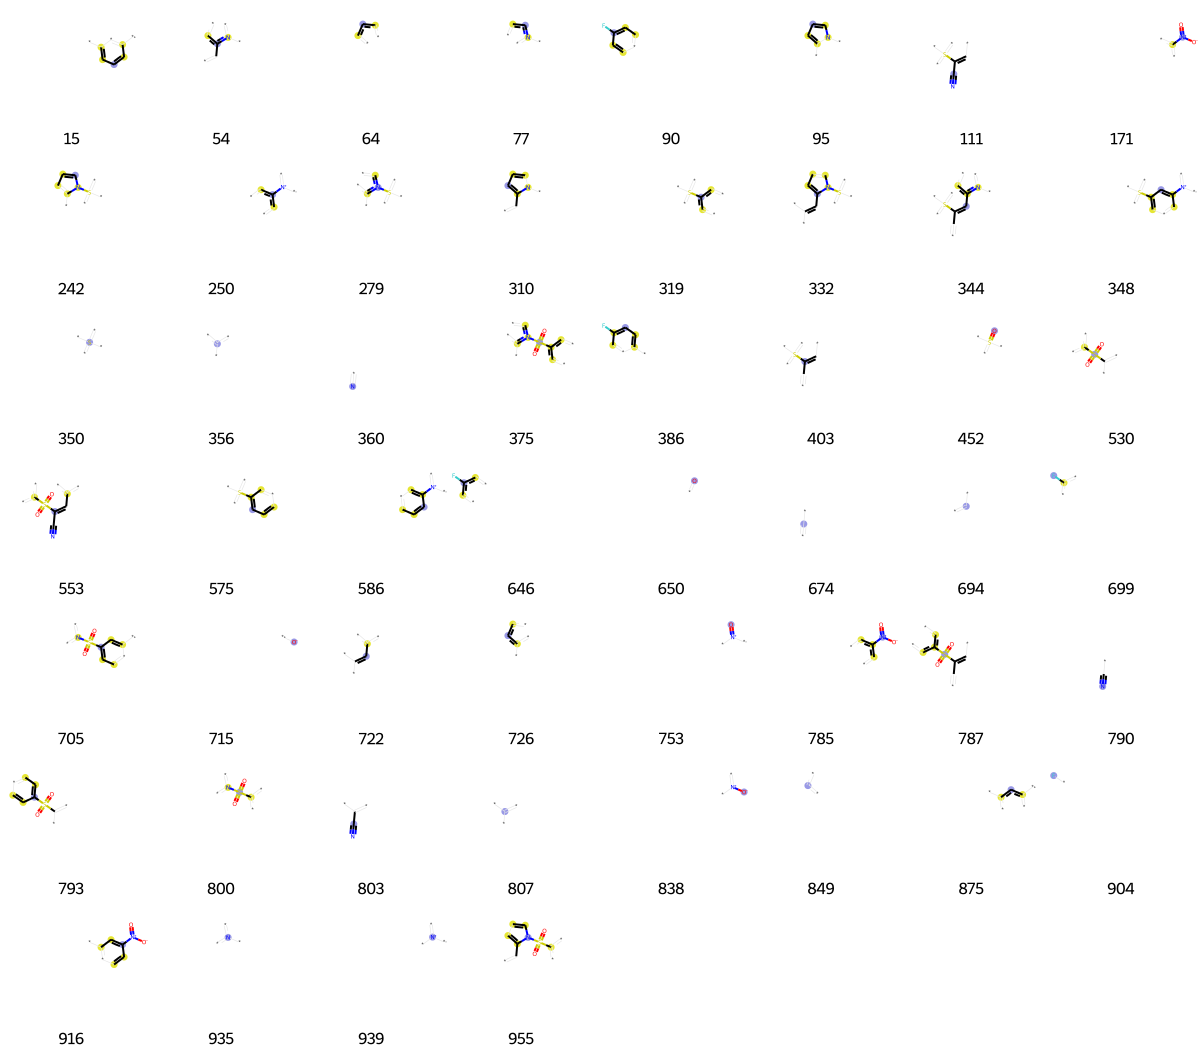

In [4031]:
prints = [(M39, x, bi) for x in fp39.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp39.GetOnBits ()])

In [4032]:
bi = {}

fp40= AllChem.GetMorganFingerprintAsBitVect(M40, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp40, fp_arr)
np.nonzero(fp_arr)
list(fp40.GetOnBits())

[14,
 25,
 31,
 36,
 49,
 102,
 130,
 135,
 173,
 176,
 184,
 233,
 284,
 308,
 315,
 356,
 389,
 451,
 463,
 578,
 583,
 589,
 604,
 650,
 679,
 694,
 695,
 711,
 726,
 770,
 781,
 798,
 807,
 835,
 849,
 873,
 875,
 893,
 926,
 1009,
 1017,
 1019]

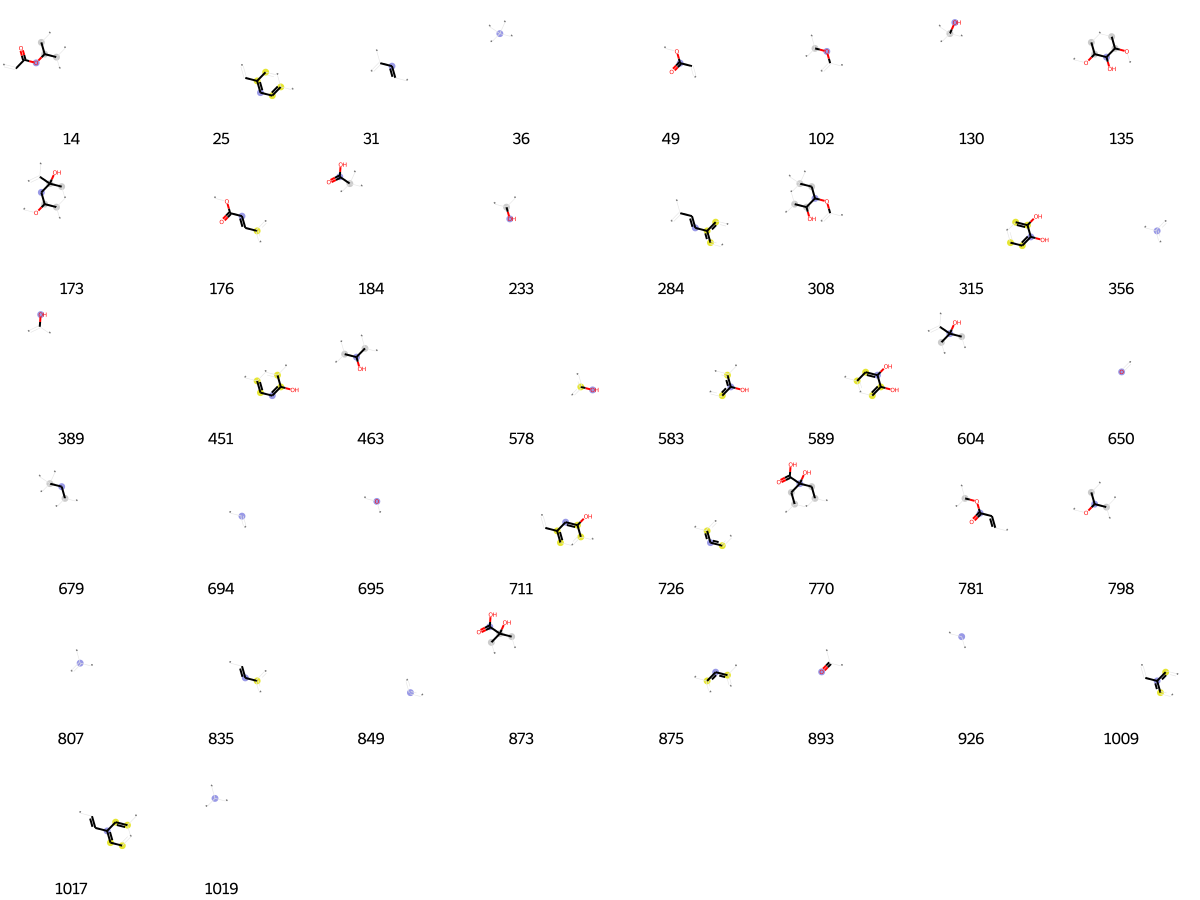

In [4033]:
prints = [(M40, x, bi) for x in fp40.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp40.GetOnBits ()])

In [4034]:
bi = {}

fp41= AllChem.GetMorganFingerprintAsBitVect(M41, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp41, fp_arr)
np.nonzero(fp_arr)
list(fp41.GetOnBits())

[4,
 23,
 33,
 64,
 80,
 94,
 146,
 175,
 193,
 202,
 240,
 249,
 322,
 325,
 356,
 386,
 389,
 434,
 463,
 507,
 512,
 562,
 564,
 593,
 637,
 646,
 647,
 650,
 695,
 699,
 718,
 726,
 739,
 781,
 783,
 807,
 841,
 849,
 875,
 881,
 893,
 904,
 946,
 948,
 994,
 1017]

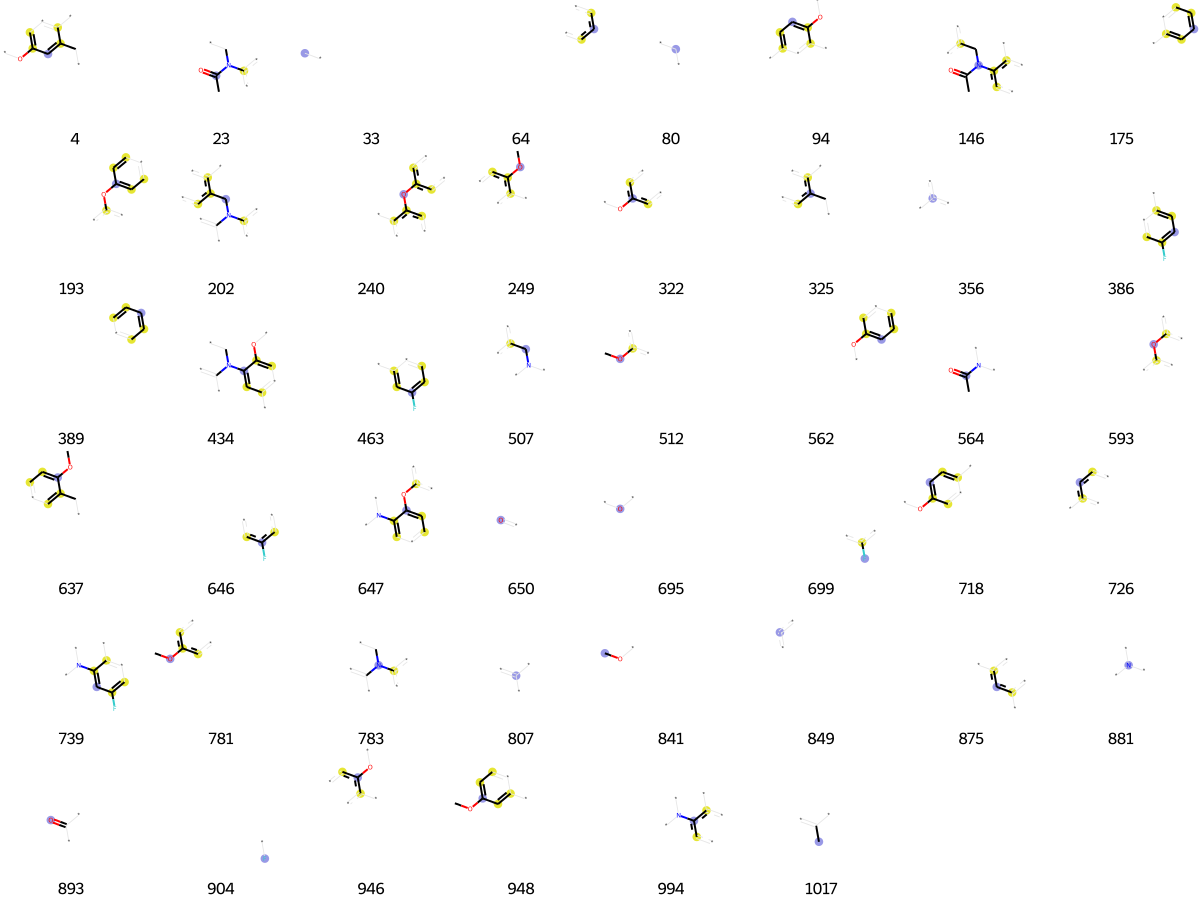

In [4035]:
prints = [(M41, x, bi) for x in fp41.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp41.GetOnBits ()])

In [4036]:
bi = {}

fp42= AllChem.GetMorganFingerprintAsBitVect(M42, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp42, fp_arr)
np.nonzero(fp_arr)
list(fp42.GetOnBits())

[33,
 42,
 64,
 80,
 87,
 114,
 115,
 123,
 167,
 175,
 294,
 295,
 356,
 373,
 389,
 392,
 397,
 507,
 650,
 726,
 730,
 795,
 807,
 849,
 861,
 881,
 892,
 893,
 1022]

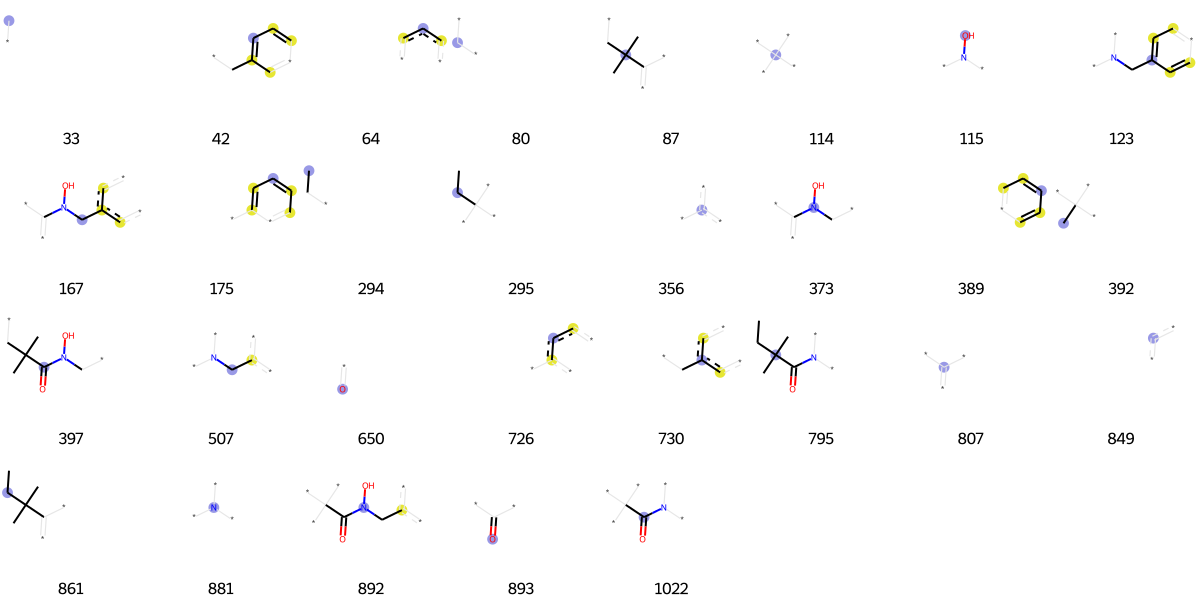

In [4037]:
prints = [(M42, x, bi) for x in fp42.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp42.GetOnBits ()])

In [4038]:
bi = {}

fp43= AllChem.GetMorganFingerprintAsBitVect(M43, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp43, fp_arr)
np.nonzero(fp_arr)
list(fp43.GetOnBits())

[1,
 4,
 11,
 33,
 41,
 80,
 117,
 119,
 128,
 220,
 227,
 243,
 294,
 341,
 356,
 375,
 398,
 420,
 441,
 456,
 465,
 505,
 540,
 591,
 623,
 631,
 650,
 656,
 694,
 726,
 738,
 749,
 752,
 767,
 794,
 807,
 824,
 829,
 836,
 849,
 875,
 881,
 887,
 893,
 895,
 898,
 926,
 935,
 950,
 966,
 974,
 1005]

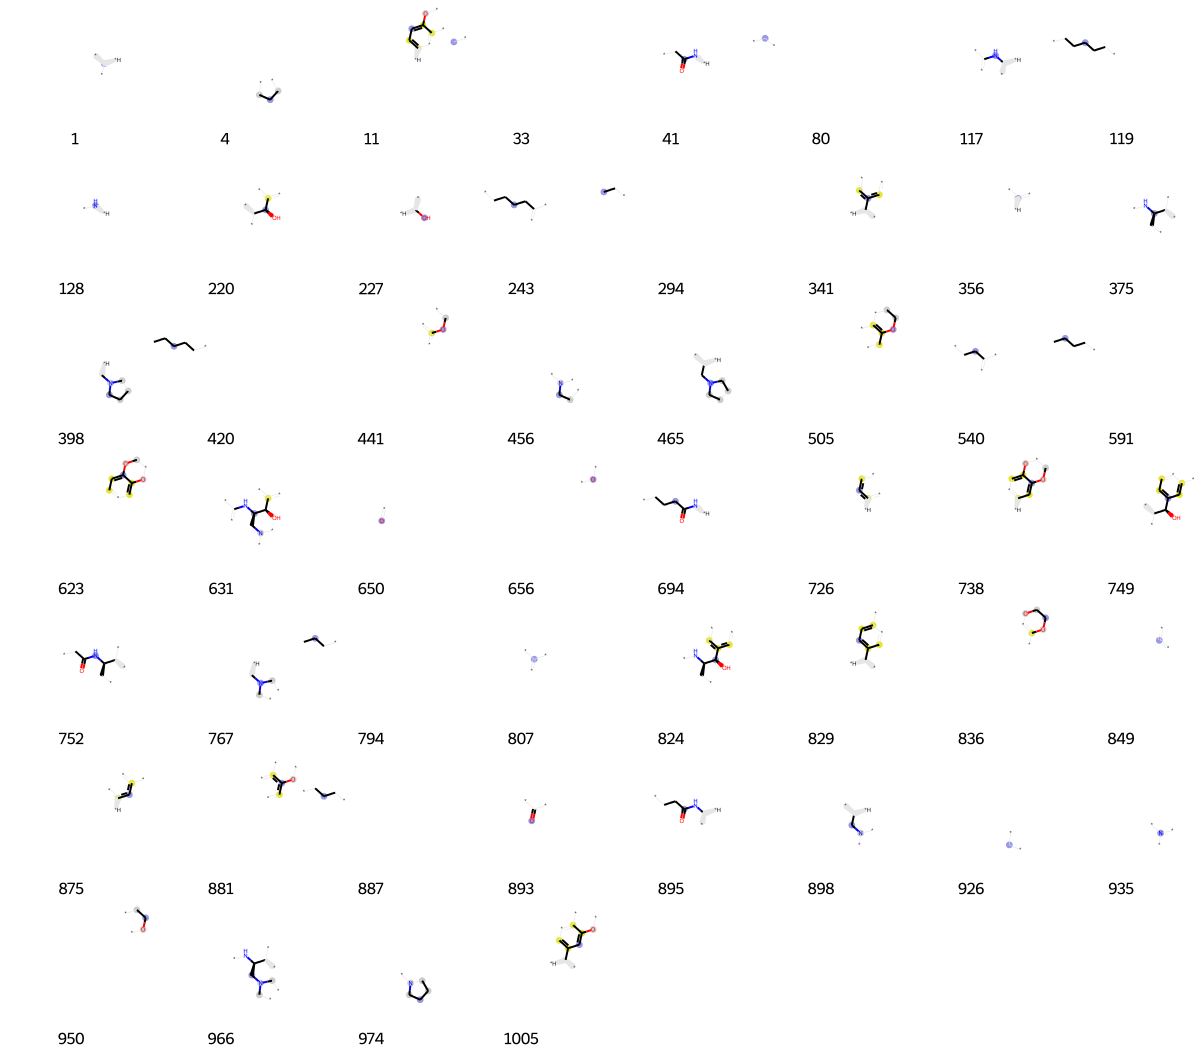

In [4039]:
prints = [(M43, x, bi) for x in fp43.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp43.GetOnBits ()])

In [4040]:
bi = {}

fp44= AllChem.GetMorganFingerprintAsBitVect(M44, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp44, fp_arr)
np.nonzero(fp_arr)
list(fp44.GetOnBits())

[36,
 128,
 145,
 172,
 195,
 200,
 216,
 243,
 268,
 313,
 344,
 356,
 396,
 421,
 422,
 573,
 650,
 675,
 679,
 699,
 704,
 726,
 792,
 807,
 816,
 820,
 832,
 849,
 877,
 893,
 904,
 926,
 952,
 965,
 1019]

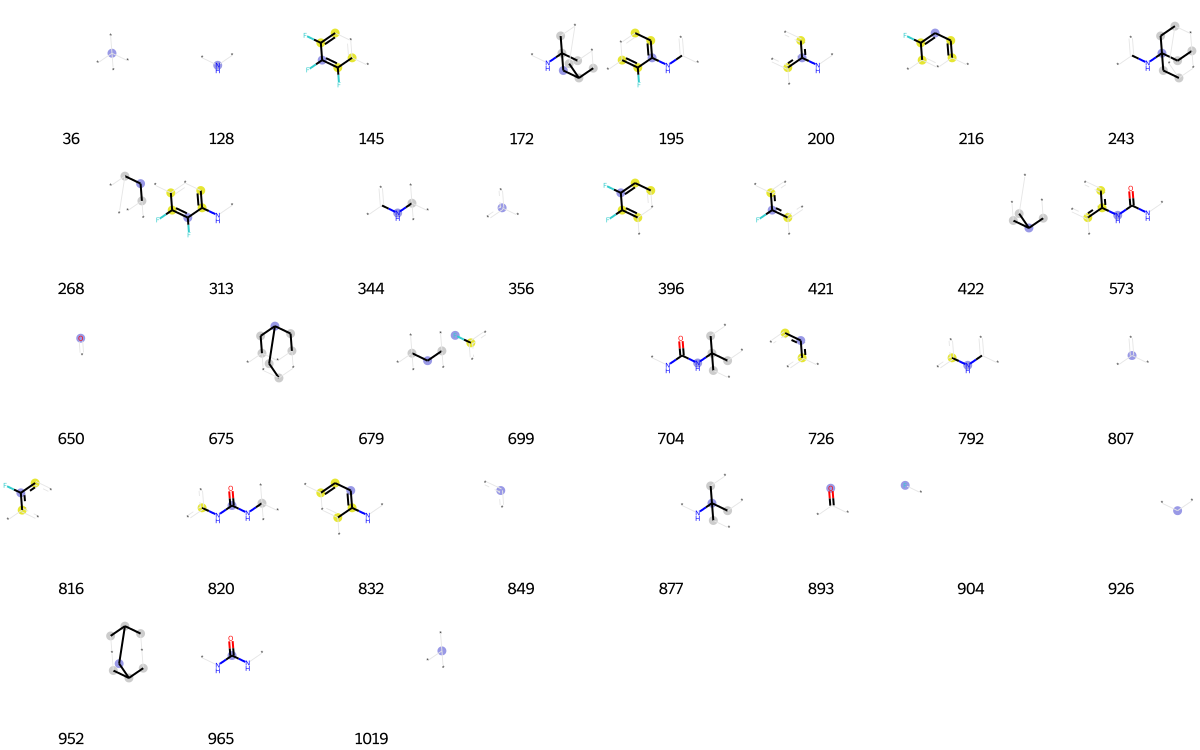

In [4041]:
prints = [(M44, x, bi) for x in fp44.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp44.GetOnBits ()])

In [4042]:
bi = {}

fp45= AllChem.GetMorganFingerprintAsBitVect(M45, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp45, fp_arr)
np.nonzero(fp_arr)
list(fp45.GetOnBits())

[144,
 147,
 173,
 319,
 350,
 356,
 433,
 452,
 465,
 583,
 650,
 715,
 726,
 780,
 833,
 849,
 888]

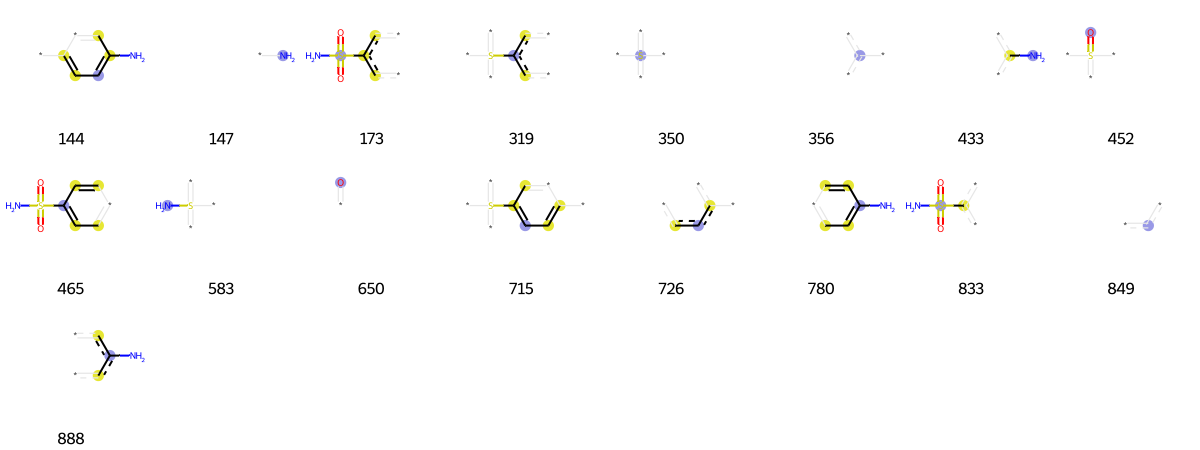

In [4043]:
prints = [(M45, x, bi) for x in fp45.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp45.GetOnBits ()])

In [4044]:
bi = {}

fp46= AllChem.GetMorganFingerprintAsBitVect(M46, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp46, fp_arr)
np.nonzero(fp_arr)
list(fp46.GetOnBits())

[3,
 33,
 44,
 80,
 84,
 94,
 107,
 147,
 202,
 221,
 249,
 284,
 310,
 322,
 325,
 356,
 378,
 406,
 409,
 411,
 428,
 433,
 435,
 511,
 512,
 554,
 633,
 695,
 718,
 726,
 730,
 745,
 781,
 831,
 841,
 849,
 875,
 944,
 946,
 975,
 1008,
 1018]

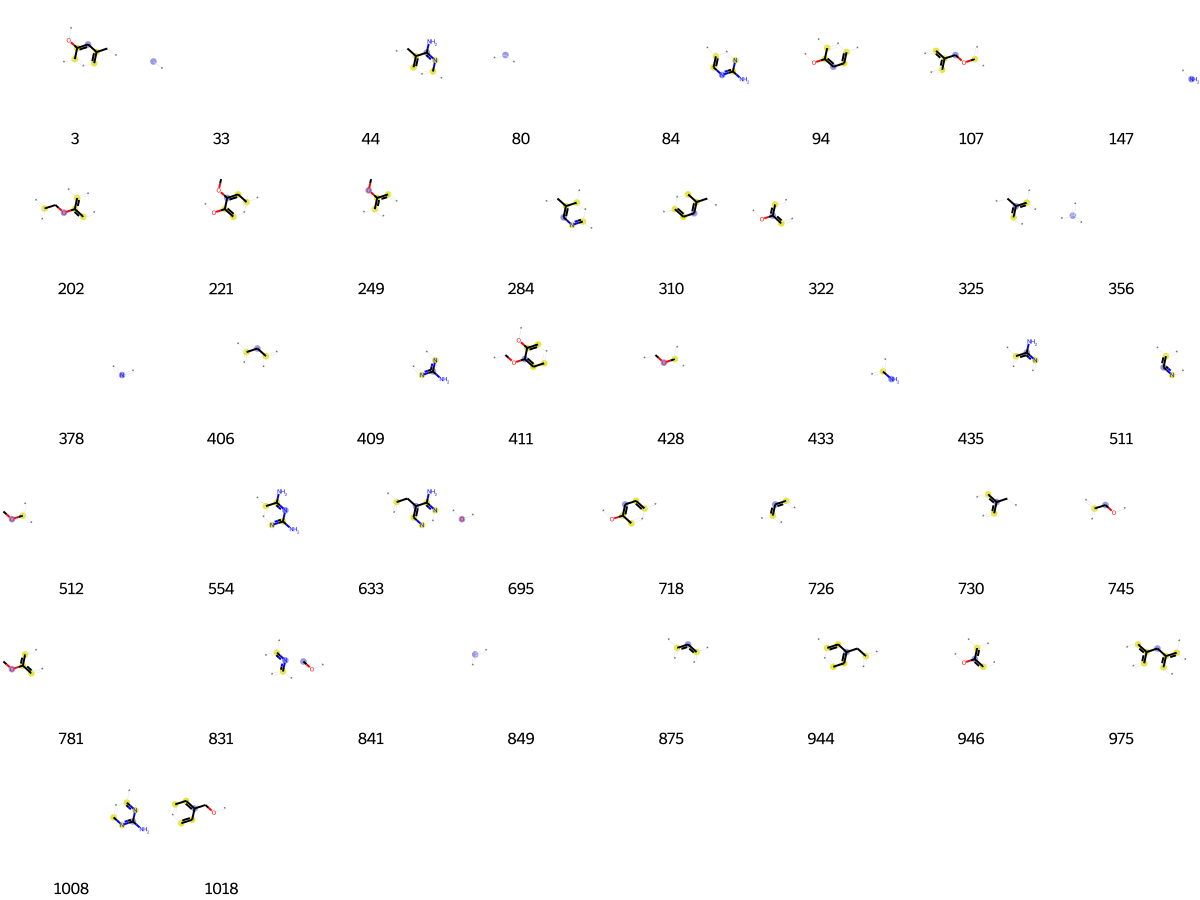

In [4045]:
prints = [(M46, x, bi) for x in fp46.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp46.GetOnBits ()])

In [4046]:
bi = {}

fp47= AllChem.GetMorganFingerprintAsBitVect(M47, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp47, fp_arr)
np.nonzero(fp_arr)
list(fp47.GetOnBits())

[13,
 80,
 210,
 222,
 233,
 299,
 357,
 463,
 489,
 492,
 610,
 656,
 695,
 740,
 807,
 820,
 869,
 893,
 897,
 953,
 1019]

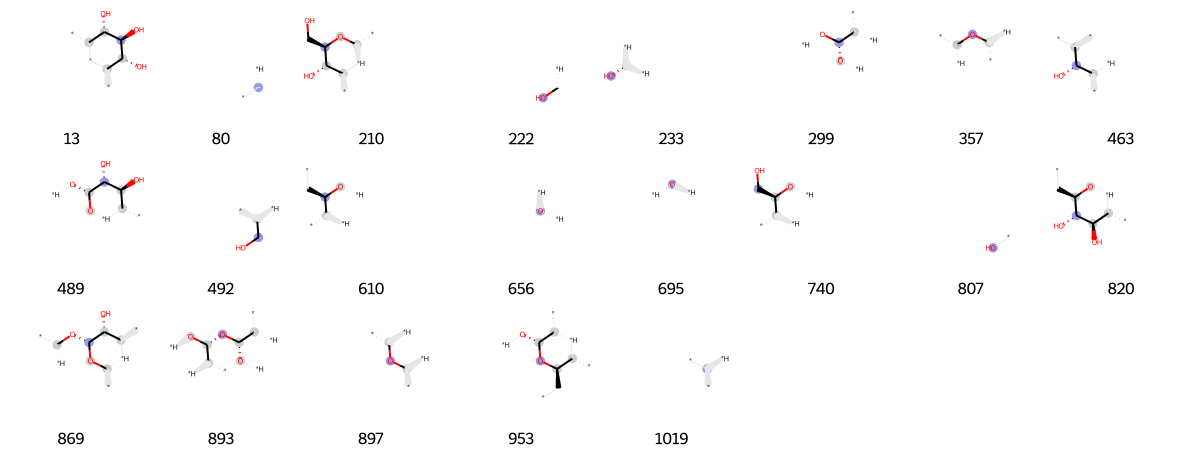

In [4047]:
prints = [(M47, x, bi) for x in fp47.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp47.GetOnBits ()])

In [4048]:
bi = {}

fp48= AllChem.GetMorganFingerprintAsBitVect(M48, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp48, fp_arr)
np.nonzero(fp_arr)
list(fp48.GetOnBits())

[110,
 140,
 147,
 171,
 231,
 271,
 309,
 354,
 356,
 407,
 414,
 456,
 484,
 595,
 650,
 686,
 708,
 715,
 716,
 753,
 795,
 807,
 838,
 849,
 875,
 893,
 926,
 935,
 939,
 967,
 980]

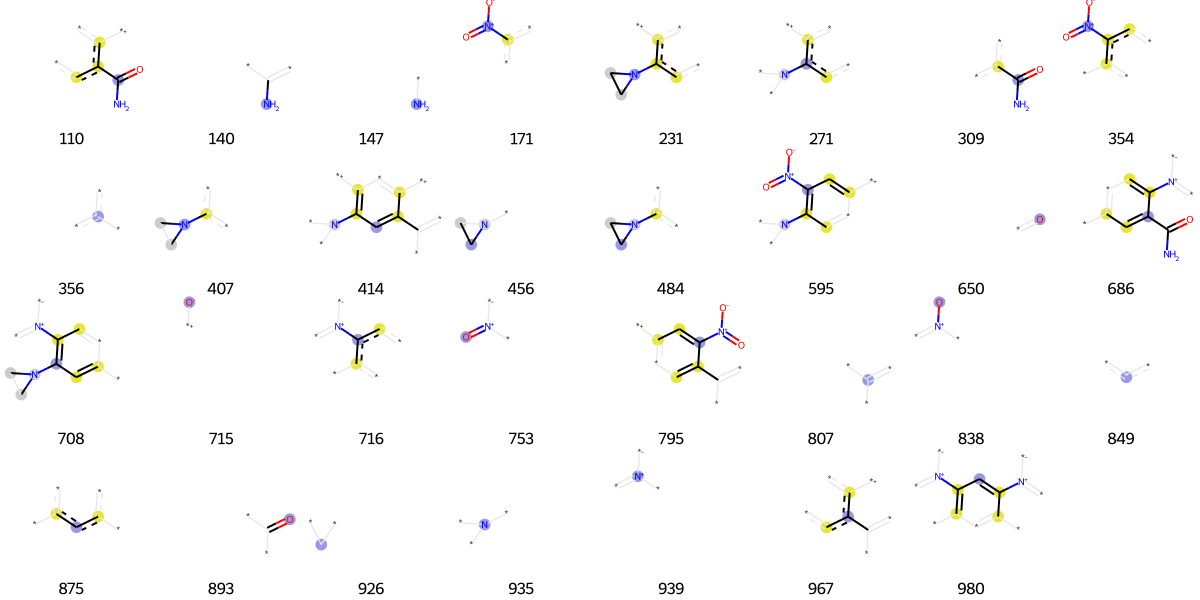

In [4049]:
prints = [(M48, x, bi) for x in fp48.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp48.GetOnBits ()])

In [4050]:
bi = {}

fp49= AllChem.GetMorganFingerprintAsBitVect(M49, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp49, fp_arr)
np.nonzero(fp_arr)
list(fp49.GetOnBits())

[136,
 209,
 222,
 237,
 289,
 304,
 314,
 333,
 352,
 356,
 381,
 384,
 465,
 472,
 525,
 578,
 650,
 656,
 690,
 709,
 726,
 745,
 754,
 784,
 807,
 849,
 875,
 896,
 941,
 1017]

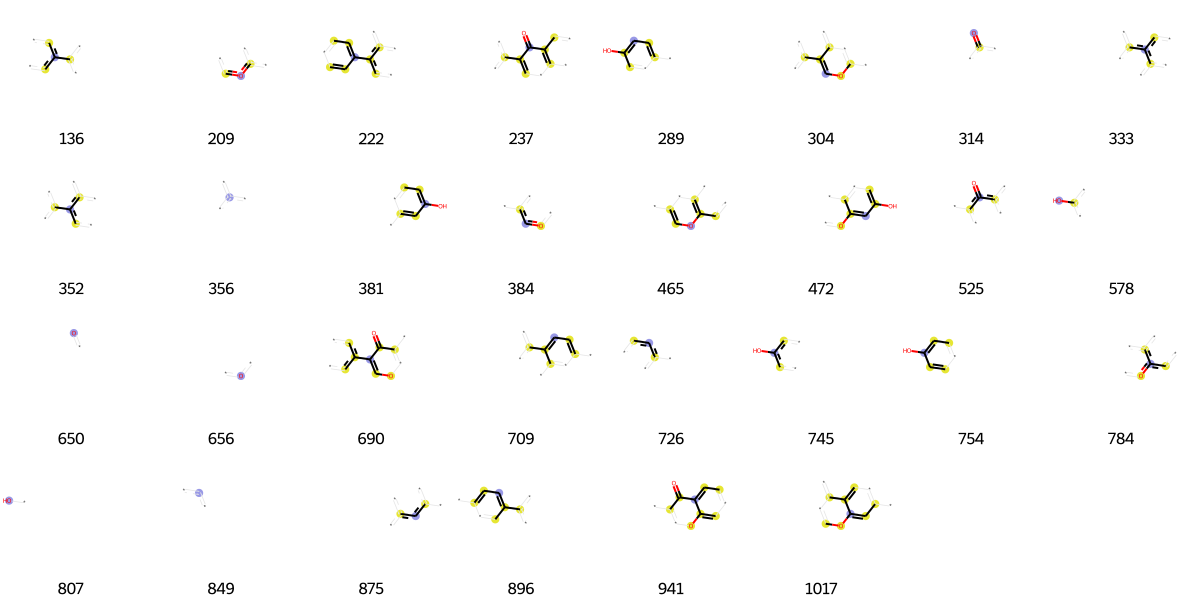

In [4051]:
prints = [(M49, x, bi) for x in fp49.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp49.GetOnBits ()])

In [4052]:
bi = {}

fp50= AllChem.GetMorganFingerprintAsBitVect(M50, 2, nBits= 1024, bitInfo=bi)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp50, fp_arr)
np.nonzero(fp_arr)
list(fp50.GetOnBits())

[7,
 11,
 33,
 36,
 84,
 88,
 129,
 138,
 155,
 242,
 250,
 255,
 268,
 285,
 301,
 308,
 314,
 356,
 412,
 424,
 426,
 460,
 479,
 507,
 519,
 529,
 555,
 563,
 565,
 622,
 650,
 695,
 697,
 714,
 718,
 769,
 781,
 798,
 807,
 835,
 841,
 849,
 860,
 893,
 926,
 947,
 962,
 1017,
 1019]

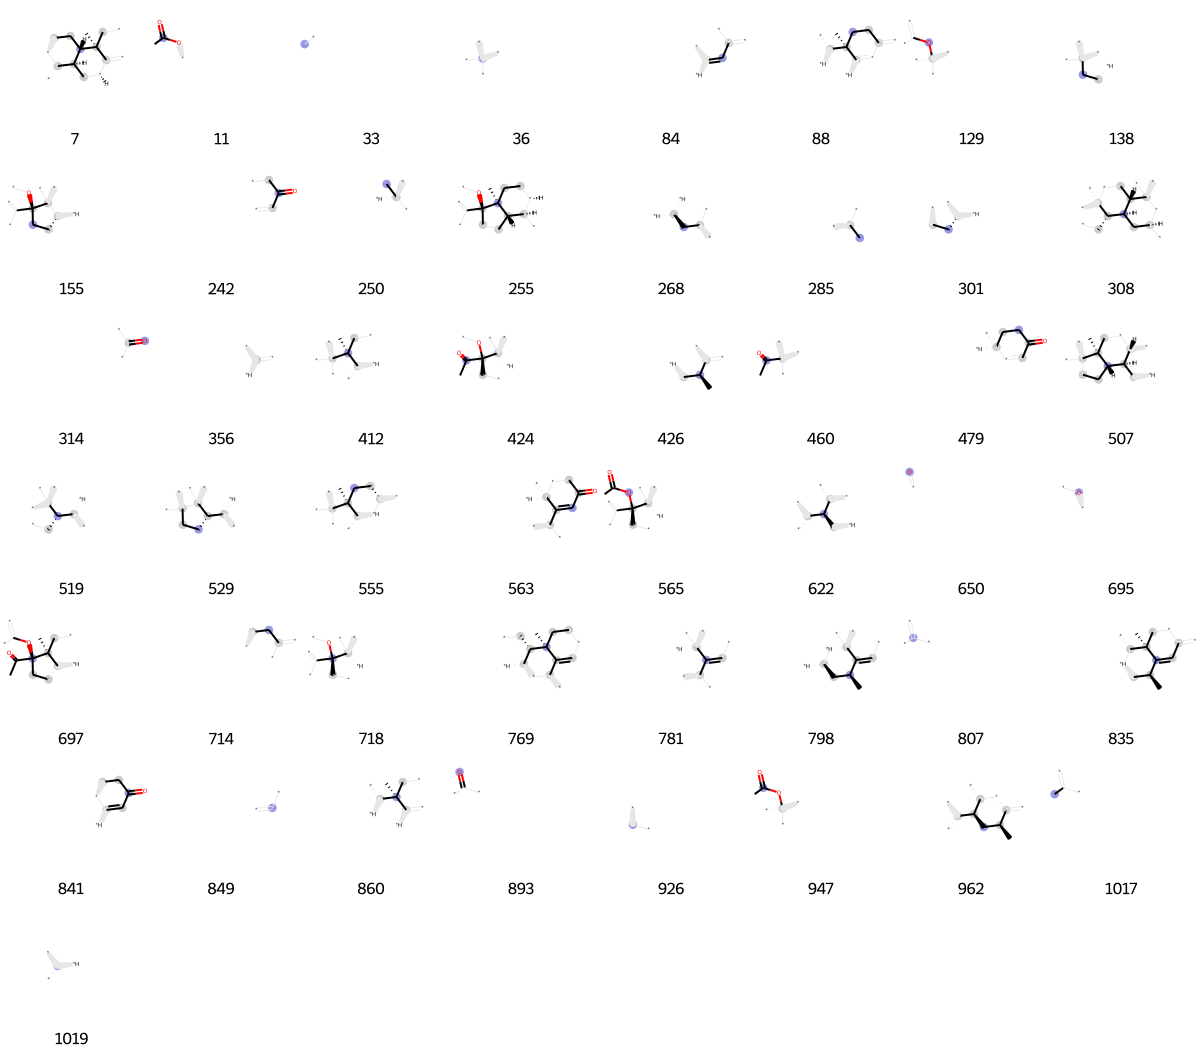

In [4053]:
prints = [(M50, x, bi) for x in fp50.GetOnBits()]
Draw.DrawMorganBits(prints, molsPerRow =8, legends=[str(x) for x in fp50.GetOnBits ()])